In [1]:
import pandas as pd
import json
import timeit
import seaborn as sns
from collections import Counter

In [2]:
%store -r dict_10k

## Dataframe con todos los resultados

In [3]:
def res_to_pandas(total_res):
    """
    Transform nested dictionary from multiple 
    sequence search into a dataframe
    :param dict total_res: nested dictionary from multiple sequence search
    :return res_pd: Pandas dataframe with all the results
    """
    
    #Getting a DataFrame containing all values from the nested dict
    from itertools import chain
    values=list(total_res.values())
    list_values=list(chain.from_iterable(values))
    values_df=pd.DataFrame(list_values)
    values_df=values_df.drop(columns=['chain_id','entity_id','entry_entity','result_sequence'])
    
    #Now create a dataframe with all query sequences respecting indexes
    key_list = [[k,v] for k, values in total_res.items() for v in values]
    df_list=pd.DataFrame(key_list)
    df_list.drop(1, axis=1,inplace=True) #Dropping values (list of dicts)
    df_list.rename(columns={0:'query_sequences'},inplace=True)
    
    #Concatenating both DataFrames
    res_df=pd.concat([df_list,values_df],axis=1)
    
    return res_df

In [9]:
df_10k=res_to_pandas(dict_10k)

## PDB sequence

In [5]:
import re
import requests

base_url = "https://www.ebi.ac.uk/pdbe/"

api_base = base_url + "api/"

molecules_url = api_base + '/pdb/entry/molecules/'

In [6]:
def make_request(url, mode, pdb_id):
    """
    This function can make GET and POST requests to
    the PDBe API
    
    :param url: String,
    :param mode: String,
    :param pdb_id: String
    :return: JSON or None
    """
    if mode == "get":
        response = requests.get(url=url+pdb_id)
    elif mode == "post":
        response = requests.post(url, data=pdb_id)

    if response.status_code == 200:
        return response.json()
    else:
        print("[No data retrieved - %s] %s" % (response.status_code, response.text))
    
    return None

In [7]:
def get_pdb_sequence(pdb_id_list):
    """
    Get sequences associated with pdb ids
    """
    start = timeit.default_timer()
    res=[]
    i=0
    while i < len(pdb_id_list):
            data=make_request(molecules_url,'get',pdb_id_list[i])
            sequence=data.get(pdb_id_list[i])[0].get('sequence')
            res.append(sequence)
            i=i+1
            print(str(i)+" sequences of "+str(len(pdb_id_list)))
    
    else:
            stop = timeit.default_timer()
            temp = stop-start
            print("Done!")
            hours = temp//3600
            temp = temp - 3600*hours
            minutes = temp//60
            seconds = temp - 60*minutes
            print("Run time: " + '%d:%d:%d' %(hours,minutes,seconds)) 
            
            
    return res

In [10]:
df_10k

,query_sequences,molecule_name,pdb_id,e_value,percentage_identity
0,GLPRKILCAIAKKKGKCKGPLKLVCKC,[Lasiocepsin],2mbd,1.100000e-13,100.0
1,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,[Fungal defensin eurocin],2lt8,7.800000e-22,100.0
2,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,[Defensin MGD-1],1fjn,4.500000e-06,52.5
3,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,[micasin],2lr5,7.400000e-05,50.0
4,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,[INVERT_DEFENSINS domain-containing protein],2ru0,1.800000e-04,47.5
...,...,...,...,...,...
66800,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,[Melittin],2mlt,1.000000e-03,100.0
66801,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,[Melittin],6o4m,1.000000e-03,100.0
66802,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,[Melittin],1bh1,1.000000e-03,100.0
66803,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,[MSI-594],2k98,4.800000e-02,76.2


In [11]:
pdbid_list=pd.Series.tolist(df_10k['pdb_id'])

In [18]:
list1=pdbid_list[0:3000]

In [19]:
run1=get_pdb_sequence(list1)

1 sequences of 3000
2 sequences of 3000
3 sequences of 3000
4 sequences of 3000
5 sequences of 3000
6 sequences of 3000
7 sequences of 3000
8 sequences of 3000
9 sequences of 3000
10 sequences of 3000
11 sequences of 3000
12 sequences of 3000
13 sequences of 3000
14 sequences of 3000
15 sequences of 3000
16 sequences of 3000
17 sequences of 3000
18 sequences of 3000
19 sequences of 3000
20 sequences of 3000
21 sequences of 3000
22 sequences of 3000
23 sequences of 3000
24 sequences of 3000
25 sequences of 3000
26 sequences of 3000
27 sequences of 3000
28 sequences of 3000
29 sequences of 3000
30 sequences of 3000
31 sequences of 3000
32 sequences of 3000
33 sequences of 3000
34 sequences of 3000
35 sequences of 3000
36 sequences of 3000
37 sequences of 3000
38 sequences of 3000
39 sequences of 3000
40 sequences of 3000
41 sequences of 3000
42 sequences of 3000
43 sequences of 3000
44 sequences of 3000
45 sequences of 3000
46 sequences of 3000
47 sequences of 3000
48 sequences of 3000
4

379 sequences of 3000
380 sequences of 3000
381 sequences of 3000
382 sequences of 3000
383 sequences of 3000
384 sequences of 3000
385 sequences of 3000
386 sequences of 3000
387 sequences of 3000
388 sequences of 3000
389 sequences of 3000
390 sequences of 3000
391 sequences of 3000
392 sequences of 3000
393 sequences of 3000
394 sequences of 3000
395 sequences of 3000
396 sequences of 3000
397 sequences of 3000
398 sequences of 3000
399 sequences of 3000
400 sequences of 3000
401 sequences of 3000
402 sequences of 3000
403 sequences of 3000
404 sequences of 3000
405 sequences of 3000
406 sequences of 3000
407 sequences of 3000
408 sequences of 3000
409 sequences of 3000
410 sequences of 3000
411 sequences of 3000
412 sequences of 3000
413 sequences of 3000
414 sequences of 3000
415 sequences of 3000
416 sequences of 3000
417 sequences of 3000
418 sequences of 3000
419 sequences of 3000
420 sequences of 3000
421 sequences of 3000
422 sequences of 3000
423 sequences of 3000
424 sequen

752 sequences of 3000
753 sequences of 3000
754 sequences of 3000
755 sequences of 3000
756 sequences of 3000
757 sequences of 3000
758 sequences of 3000
759 sequences of 3000
760 sequences of 3000
761 sequences of 3000
762 sequences of 3000
763 sequences of 3000
764 sequences of 3000
765 sequences of 3000
766 sequences of 3000
767 sequences of 3000
768 sequences of 3000
769 sequences of 3000
770 sequences of 3000
771 sequences of 3000
772 sequences of 3000
773 sequences of 3000
774 sequences of 3000
775 sequences of 3000
776 sequences of 3000
777 sequences of 3000
778 sequences of 3000
779 sequences of 3000
780 sequences of 3000
781 sequences of 3000
782 sequences of 3000
783 sequences of 3000
784 sequences of 3000
785 sequences of 3000
786 sequences of 3000
787 sequences of 3000
788 sequences of 3000
789 sequences of 3000
790 sequences of 3000
791 sequences of 3000
792 sequences of 3000
793 sequences of 3000
794 sequences of 3000
795 sequences of 3000
796 sequences of 3000
797 sequen

1119 sequences of 3000
1120 sequences of 3000
1121 sequences of 3000
1122 sequences of 3000
1123 sequences of 3000
1124 sequences of 3000
1125 sequences of 3000
1126 sequences of 3000
1127 sequences of 3000
1128 sequences of 3000
1129 sequences of 3000
1130 sequences of 3000
1131 sequences of 3000
1132 sequences of 3000
1133 sequences of 3000
1134 sequences of 3000
1135 sequences of 3000
1136 sequences of 3000
1137 sequences of 3000
1138 sequences of 3000
1139 sequences of 3000
1140 sequences of 3000
1141 sequences of 3000
1142 sequences of 3000
1143 sequences of 3000
1144 sequences of 3000
1145 sequences of 3000
1146 sequences of 3000
1147 sequences of 3000
1148 sequences of 3000
1149 sequences of 3000
1150 sequences of 3000
1151 sequences of 3000
1152 sequences of 3000
1153 sequences of 3000
1154 sequences of 3000
1155 sequences of 3000
1156 sequences of 3000
1157 sequences of 3000
1158 sequences of 3000
1159 sequences of 3000
1160 sequences of 3000
1161 sequences of 3000
1162 sequen

1476 sequences of 3000
1477 sequences of 3000
1478 sequences of 3000
1479 sequences of 3000
1480 sequences of 3000
1481 sequences of 3000
1482 sequences of 3000
1483 sequences of 3000
1484 sequences of 3000
1485 sequences of 3000
1486 sequences of 3000
1487 sequences of 3000
1488 sequences of 3000
1489 sequences of 3000
1490 sequences of 3000
1491 sequences of 3000
1492 sequences of 3000
1493 sequences of 3000
1494 sequences of 3000
1495 sequences of 3000
1496 sequences of 3000
1497 sequences of 3000
1498 sequences of 3000
1499 sequences of 3000
1500 sequences of 3000
1501 sequences of 3000
1502 sequences of 3000
1503 sequences of 3000
1504 sequences of 3000
1505 sequences of 3000
1506 sequences of 3000
1507 sequences of 3000
1508 sequences of 3000
1509 sequences of 3000
1510 sequences of 3000
1511 sequences of 3000
1512 sequences of 3000
1513 sequences of 3000
1514 sequences of 3000
1515 sequences of 3000
1516 sequences of 3000
1517 sequences of 3000
1518 sequences of 3000
1519 sequen

1833 sequences of 3000
1834 sequences of 3000
1835 sequences of 3000
1836 sequences of 3000
1837 sequences of 3000
1838 sequences of 3000
1839 sequences of 3000
1840 sequences of 3000
1841 sequences of 3000
1842 sequences of 3000
1843 sequences of 3000
1844 sequences of 3000
1845 sequences of 3000
1846 sequences of 3000
1847 sequences of 3000
1848 sequences of 3000
1849 sequences of 3000
1850 sequences of 3000
1851 sequences of 3000
1852 sequences of 3000
1853 sequences of 3000
1854 sequences of 3000
1855 sequences of 3000
1856 sequences of 3000
1857 sequences of 3000
1858 sequences of 3000
1859 sequences of 3000
1860 sequences of 3000
1861 sequences of 3000
1862 sequences of 3000
1863 sequences of 3000
1864 sequences of 3000
1865 sequences of 3000
1866 sequences of 3000
1867 sequences of 3000
1868 sequences of 3000
1869 sequences of 3000
1870 sequences of 3000
1871 sequences of 3000
1872 sequences of 3000
1873 sequences of 3000
1874 sequences of 3000
1875 sequences of 3000
1876 sequen

2190 sequences of 3000
2191 sequences of 3000
2192 sequences of 3000
2193 sequences of 3000
2194 sequences of 3000
2195 sequences of 3000
2196 sequences of 3000
2197 sequences of 3000
2198 sequences of 3000
2199 sequences of 3000
2200 sequences of 3000
2201 sequences of 3000
2202 sequences of 3000
2203 sequences of 3000
2204 sequences of 3000
2205 sequences of 3000
2206 sequences of 3000
2207 sequences of 3000
2208 sequences of 3000
2209 sequences of 3000
2210 sequences of 3000
2211 sequences of 3000
2212 sequences of 3000
2213 sequences of 3000
2214 sequences of 3000
2215 sequences of 3000
2216 sequences of 3000
2217 sequences of 3000
2218 sequences of 3000
2219 sequences of 3000
2220 sequences of 3000
2221 sequences of 3000
2222 sequences of 3000
2223 sequences of 3000
2224 sequences of 3000
2225 sequences of 3000
2226 sequences of 3000
2227 sequences of 3000
2228 sequences of 3000
2229 sequences of 3000
2230 sequences of 3000
2231 sequences of 3000
2232 sequences of 3000
2233 sequen

2547 sequences of 3000
2548 sequences of 3000
2549 sequences of 3000
2550 sequences of 3000
2551 sequences of 3000
2552 sequences of 3000
2553 sequences of 3000
2554 sequences of 3000
2555 sequences of 3000
2556 sequences of 3000
2557 sequences of 3000
2558 sequences of 3000
2559 sequences of 3000
2560 sequences of 3000
2561 sequences of 3000
2562 sequences of 3000
2563 sequences of 3000
2564 sequences of 3000
2565 sequences of 3000
2566 sequences of 3000
2567 sequences of 3000
2568 sequences of 3000
2569 sequences of 3000
2570 sequences of 3000
2571 sequences of 3000
2572 sequences of 3000
2573 sequences of 3000
2574 sequences of 3000
2575 sequences of 3000
2576 sequences of 3000
2577 sequences of 3000
2578 sequences of 3000
2579 sequences of 3000
2580 sequences of 3000
2581 sequences of 3000
2582 sequences of 3000
2583 sequences of 3000
2584 sequences of 3000
2585 sequences of 3000
2586 sequences of 3000
2587 sequences of 3000
2588 sequences of 3000
2589 sequences of 3000
2590 sequen

2904 sequences of 3000
2905 sequences of 3000
2906 sequences of 3000
2907 sequences of 3000
2908 sequences of 3000
2909 sequences of 3000
2910 sequences of 3000
2911 sequences of 3000
2912 sequences of 3000
2913 sequences of 3000
2914 sequences of 3000
2915 sequences of 3000
2916 sequences of 3000
2917 sequences of 3000
2918 sequences of 3000
2919 sequences of 3000
2920 sequences of 3000
2921 sequences of 3000
2922 sequences of 3000
2923 sequences of 3000
2924 sequences of 3000
2925 sequences of 3000
2926 sequences of 3000
2927 sequences of 3000
2928 sequences of 3000
2929 sequences of 3000
2930 sequences of 3000
2931 sequences of 3000
2932 sequences of 3000
2933 sequences of 3000
2934 sequences of 3000
2935 sequences of 3000
2936 sequences of 3000
2937 sequences of 3000
2938 sequences of 3000
2939 sequences of 3000
2940 sequences of 3000
2941 sequences of 3000
2942 sequences of 3000
2943 sequences of 3000
2944 sequences of 3000
2945 sequences of 3000
2946 sequences of 3000
2947 sequen

In [20]:
%store run1 

Stored 'run1' (list)


In [24]:
list2=pdbid_list[3000:10000]

In [25]:
run2=get_pdb_sequence(list2)

1 sequences of 7000
2 sequences of 7000
3 sequences of 7000
4 sequences of 7000
5 sequences of 7000
6 sequences of 7000
7 sequences of 7000
8 sequences of 7000
9 sequences of 7000
10 sequences of 7000
11 sequences of 7000
12 sequences of 7000
13 sequences of 7000
14 sequences of 7000
15 sequences of 7000
16 sequences of 7000
17 sequences of 7000
18 sequences of 7000
19 sequences of 7000
20 sequences of 7000
21 sequences of 7000
22 sequences of 7000
23 sequences of 7000
24 sequences of 7000
25 sequences of 7000
26 sequences of 7000
27 sequences of 7000
28 sequences of 7000
29 sequences of 7000
30 sequences of 7000
31 sequences of 7000
32 sequences of 7000
33 sequences of 7000
34 sequences of 7000
35 sequences of 7000
36 sequences of 7000
37 sequences of 7000
38 sequences of 7000
39 sequences of 7000
40 sequences of 7000
41 sequences of 7000
42 sequences of 7000
43 sequences of 7000
44 sequences of 7000
45 sequences of 7000
46 sequences of 7000
47 sequences of 7000
48 sequences of 7000
4

379 sequences of 7000
380 sequences of 7000
381 sequences of 7000
382 sequences of 7000
383 sequences of 7000
384 sequences of 7000
385 sequences of 7000
386 sequences of 7000
387 sequences of 7000
388 sequences of 7000
389 sequences of 7000
390 sequences of 7000
391 sequences of 7000
392 sequences of 7000
393 sequences of 7000
394 sequences of 7000
395 sequences of 7000
396 sequences of 7000
397 sequences of 7000
398 sequences of 7000
399 sequences of 7000
400 sequences of 7000
401 sequences of 7000
402 sequences of 7000
403 sequences of 7000
404 sequences of 7000
405 sequences of 7000
406 sequences of 7000
407 sequences of 7000
408 sequences of 7000
409 sequences of 7000
410 sequences of 7000
411 sequences of 7000
412 sequences of 7000
413 sequences of 7000
414 sequences of 7000
415 sequences of 7000
416 sequences of 7000
417 sequences of 7000
418 sequences of 7000
419 sequences of 7000
420 sequences of 7000
421 sequences of 7000
422 sequences of 7000
423 sequences of 7000
424 sequen

752 sequences of 7000
753 sequences of 7000
754 sequences of 7000
755 sequences of 7000
756 sequences of 7000
757 sequences of 7000
758 sequences of 7000
759 sequences of 7000
760 sequences of 7000
761 sequences of 7000
762 sequences of 7000
763 sequences of 7000
764 sequences of 7000
765 sequences of 7000
766 sequences of 7000
767 sequences of 7000
768 sequences of 7000
769 sequences of 7000
770 sequences of 7000
771 sequences of 7000
772 sequences of 7000
773 sequences of 7000
774 sequences of 7000
775 sequences of 7000
776 sequences of 7000
777 sequences of 7000
778 sequences of 7000
779 sequences of 7000
780 sequences of 7000
781 sequences of 7000
782 sequences of 7000
783 sequences of 7000
784 sequences of 7000
785 sequences of 7000
786 sequences of 7000
787 sequences of 7000
788 sequences of 7000
789 sequences of 7000
790 sequences of 7000
791 sequences of 7000
792 sequences of 7000
793 sequences of 7000
794 sequences of 7000
795 sequences of 7000
796 sequences of 7000
797 sequen

1119 sequences of 7000
1120 sequences of 7000
1121 sequences of 7000
1122 sequences of 7000
1123 sequences of 7000
1124 sequences of 7000
1125 sequences of 7000
1126 sequences of 7000
1127 sequences of 7000
1128 sequences of 7000
1129 sequences of 7000
1130 sequences of 7000
1131 sequences of 7000
1132 sequences of 7000
1133 sequences of 7000
1134 sequences of 7000
1135 sequences of 7000
1136 sequences of 7000
1137 sequences of 7000
1138 sequences of 7000
1139 sequences of 7000
1140 sequences of 7000
1141 sequences of 7000
1142 sequences of 7000
1143 sequences of 7000
1144 sequences of 7000
1145 sequences of 7000
1146 sequences of 7000
1147 sequences of 7000
1148 sequences of 7000
1149 sequences of 7000
1150 sequences of 7000
1151 sequences of 7000
1152 sequences of 7000
1153 sequences of 7000
1154 sequences of 7000
1155 sequences of 7000
1156 sequences of 7000
1157 sequences of 7000
1158 sequences of 7000
1159 sequences of 7000
1160 sequences of 7000
1161 sequences of 7000
1162 sequen

1476 sequences of 7000
1477 sequences of 7000
1478 sequences of 7000
1479 sequences of 7000
1480 sequences of 7000
1481 sequences of 7000
1482 sequences of 7000
1483 sequences of 7000
1484 sequences of 7000
1485 sequences of 7000
1486 sequences of 7000
1487 sequences of 7000
1488 sequences of 7000
1489 sequences of 7000
1490 sequences of 7000
1491 sequences of 7000
1492 sequences of 7000
1493 sequences of 7000
1494 sequences of 7000
1495 sequences of 7000
1496 sequences of 7000
1497 sequences of 7000
1498 sequences of 7000
1499 sequences of 7000
1500 sequences of 7000
1501 sequences of 7000
1502 sequences of 7000
1503 sequences of 7000
1504 sequences of 7000
1505 sequences of 7000
1506 sequences of 7000
1507 sequences of 7000
1508 sequences of 7000
1509 sequences of 7000
1510 sequences of 7000
1511 sequences of 7000
1512 sequences of 7000
1513 sequences of 7000
1514 sequences of 7000
1515 sequences of 7000
1516 sequences of 7000
1517 sequences of 7000
1518 sequences of 7000
1519 sequen

1833 sequences of 7000
1834 sequences of 7000
1835 sequences of 7000
1836 sequences of 7000
1837 sequences of 7000
1838 sequences of 7000
1839 sequences of 7000
1840 sequences of 7000
1841 sequences of 7000
1842 sequences of 7000
1843 sequences of 7000
1844 sequences of 7000
1845 sequences of 7000
1846 sequences of 7000
1847 sequences of 7000
1848 sequences of 7000
1849 sequences of 7000
1850 sequences of 7000
1851 sequences of 7000
1852 sequences of 7000
1853 sequences of 7000
1854 sequences of 7000
1855 sequences of 7000
1856 sequences of 7000
1857 sequences of 7000
1858 sequences of 7000
1859 sequences of 7000
1860 sequences of 7000
1861 sequences of 7000
1862 sequences of 7000
1863 sequences of 7000
1864 sequences of 7000
1865 sequences of 7000
1866 sequences of 7000
1867 sequences of 7000
1868 sequences of 7000
1869 sequences of 7000
1870 sequences of 7000
1871 sequences of 7000
1872 sequences of 7000
1873 sequences of 7000
1874 sequences of 7000
1875 sequences of 7000
1876 sequen

2190 sequences of 7000
2191 sequences of 7000
2192 sequences of 7000
2193 sequences of 7000
2194 sequences of 7000
2195 sequences of 7000
2196 sequences of 7000
2197 sequences of 7000
2198 sequences of 7000
2199 sequences of 7000
2200 sequences of 7000
2201 sequences of 7000
2202 sequences of 7000
2203 sequences of 7000
2204 sequences of 7000
2205 sequences of 7000
2206 sequences of 7000
2207 sequences of 7000
2208 sequences of 7000
2209 sequences of 7000
2210 sequences of 7000
2211 sequences of 7000
2212 sequences of 7000
2213 sequences of 7000
2214 sequences of 7000
2215 sequences of 7000
2216 sequences of 7000
2217 sequences of 7000
2218 sequences of 7000
2219 sequences of 7000
2220 sequences of 7000
2221 sequences of 7000
2222 sequences of 7000
2223 sequences of 7000
2224 sequences of 7000
2225 sequences of 7000
2226 sequences of 7000
2227 sequences of 7000
2228 sequences of 7000
2229 sequences of 7000
2230 sequences of 7000
2231 sequences of 7000
2232 sequences of 7000
2233 sequen

2547 sequences of 7000
2548 sequences of 7000
2549 sequences of 7000
2550 sequences of 7000
2551 sequences of 7000
2552 sequences of 7000
2553 sequences of 7000
2554 sequences of 7000
2555 sequences of 7000
2556 sequences of 7000
2557 sequences of 7000
2558 sequences of 7000
2559 sequences of 7000
2560 sequences of 7000
2561 sequences of 7000
2562 sequences of 7000
2563 sequences of 7000
2564 sequences of 7000
2565 sequences of 7000
2566 sequences of 7000
2567 sequences of 7000
2568 sequences of 7000
2569 sequences of 7000
2570 sequences of 7000
2571 sequences of 7000
2572 sequences of 7000
2573 sequences of 7000
2574 sequences of 7000
2575 sequences of 7000
2576 sequences of 7000
2577 sequences of 7000
2578 sequences of 7000
2579 sequences of 7000
2580 sequences of 7000
2581 sequences of 7000
2582 sequences of 7000
2583 sequences of 7000
2584 sequences of 7000
2585 sequences of 7000
2586 sequences of 7000
2587 sequences of 7000
2588 sequences of 7000
2589 sequences of 7000
2590 sequen

2904 sequences of 7000
2905 sequences of 7000
2906 sequences of 7000
2907 sequences of 7000
2908 sequences of 7000
2909 sequences of 7000
2910 sequences of 7000
2911 sequences of 7000
2912 sequences of 7000
2913 sequences of 7000
2914 sequences of 7000
2915 sequences of 7000
2916 sequences of 7000
2917 sequences of 7000
2918 sequences of 7000
2919 sequences of 7000
2920 sequences of 7000
2921 sequences of 7000
2922 sequences of 7000
2923 sequences of 7000
2924 sequences of 7000
2925 sequences of 7000
2926 sequences of 7000
2927 sequences of 7000
2928 sequences of 7000
2929 sequences of 7000
2930 sequences of 7000
2931 sequences of 7000
2932 sequences of 7000
2933 sequences of 7000
2934 sequences of 7000
2935 sequences of 7000
2936 sequences of 7000
2937 sequences of 7000
2938 sequences of 7000
2939 sequences of 7000
2940 sequences of 7000
2941 sequences of 7000
2942 sequences of 7000
2943 sequences of 7000
2944 sequences of 7000
2945 sequences of 7000
2946 sequences of 7000
2947 sequen

3261 sequences of 7000
3262 sequences of 7000
3263 sequences of 7000
3264 sequences of 7000
3265 sequences of 7000
3266 sequences of 7000
3267 sequences of 7000
3268 sequences of 7000
3269 sequences of 7000
3270 sequences of 7000
3271 sequences of 7000
3272 sequences of 7000
3273 sequences of 7000
3274 sequences of 7000
3275 sequences of 7000
3276 sequences of 7000
3277 sequences of 7000
3278 sequences of 7000
3279 sequences of 7000
3280 sequences of 7000
3281 sequences of 7000
3282 sequences of 7000
3283 sequences of 7000
3284 sequences of 7000
3285 sequences of 7000
3286 sequences of 7000
3287 sequences of 7000
3288 sequences of 7000
3289 sequences of 7000
3290 sequences of 7000
3291 sequences of 7000
3292 sequences of 7000
3293 sequences of 7000
3294 sequences of 7000
3295 sequences of 7000
3296 sequences of 7000
3297 sequences of 7000
3298 sequences of 7000
3299 sequences of 7000
3300 sequences of 7000
3301 sequences of 7000
3302 sequences of 7000
3303 sequences of 7000
3304 sequen

3618 sequences of 7000
3619 sequences of 7000
3620 sequences of 7000
3621 sequences of 7000
3622 sequences of 7000
3623 sequences of 7000
3624 sequences of 7000
3625 sequences of 7000
3626 sequences of 7000
3627 sequences of 7000
3628 sequences of 7000
3629 sequences of 7000
3630 sequences of 7000
3631 sequences of 7000
3632 sequences of 7000
3633 sequences of 7000
3634 sequences of 7000
3635 sequences of 7000
3636 sequences of 7000
3637 sequences of 7000
3638 sequences of 7000
3639 sequences of 7000
3640 sequences of 7000
3641 sequences of 7000
3642 sequences of 7000
3643 sequences of 7000
3644 sequences of 7000
3645 sequences of 7000
3646 sequences of 7000
3647 sequences of 7000
3648 sequences of 7000
3649 sequences of 7000
3650 sequences of 7000
3651 sequences of 7000
3652 sequences of 7000
3653 sequences of 7000
3654 sequences of 7000
3655 sequences of 7000
3656 sequences of 7000
3657 sequences of 7000
3658 sequences of 7000
3659 sequences of 7000
3660 sequences of 7000
3661 sequen

3975 sequences of 7000
3976 sequences of 7000
3977 sequences of 7000
3978 sequences of 7000
3979 sequences of 7000
3980 sequences of 7000
3981 sequences of 7000
3982 sequences of 7000
3983 sequences of 7000
3984 sequences of 7000
3985 sequences of 7000
3986 sequences of 7000
3987 sequences of 7000
3988 sequences of 7000
3989 sequences of 7000
3990 sequences of 7000
3991 sequences of 7000
3992 sequences of 7000
3993 sequences of 7000
3994 sequences of 7000
3995 sequences of 7000
3996 sequences of 7000
3997 sequences of 7000
3998 sequences of 7000
3999 sequences of 7000
4000 sequences of 7000
4001 sequences of 7000
4002 sequences of 7000
4003 sequences of 7000
4004 sequences of 7000
4005 sequences of 7000
4006 sequences of 7000
4007 sequences of 7000
4008 sequences of 7000
4009 sequences of 7000
4010 sequences of 7000
4011 sequences of 7000
4012 sequences of 7000
4013 sequences of 7000
4014 sequences of 7000
4015 sequences of 7000
4016 sequences of 7000
4017 sequences of 7000
4018 sequen

4332 sequences of 7000
4333 sequences of 7000
4334 sequences of 7000
4335 sequences of 7000
4336 sequences of 7000
4337 sequences of 7000
4338 sequences of 7000
4339 sequences of 7000
4340 sequences of 7000
4341 sequences of 7000
4342 sequences of 7000
4343 sequences of 7000
4344 sequences of 7000
4345 sequences of 7000
4346 sequences of 7000
4347 sequences of 7000
4348 sequences of 7000
4349 sequences of 7000
4350 sequences of 7000
4351 sequences of 7000
4352 sequences of 7000
4353 sequences of 7000
4354 sequences of 7000
4355 sequences of 7000
4356 sequences of 7000
4357 sequences of 7000
4358 sequences of 7000
4359 sequences of 7000
4360 sequences of 7000
4361 sequences of 7000
4362 sequences of 7000
4363 sequences of 7000
4364 sequences of 7000
4365 sequences of 7000
4366 sequences of 7000
4367 sequences of 7000
4368 sequences of 7000
4369 sequences of 7000
4370 sequences of 7000
4371 sequences of 7000
4372 sequences of 7000
4373 sequences of 7000
4374 sequences of 7000
4375 sequen

4689 sequences of 7000
4690 sequences of 7000
4691 sequences of 7000
4692 sequences of 7000
4693 sequences of 7000
4694 sequences of 7000
4695 sequences of 7000
4696 sequences of 7000
4697 sequences of 7000
4698 sequences of 7000
4699 sequences of 7000
4700 sequences of 7000
4701 sequences of 7000
4702 sequences of 7000
4703 sequences of 7000
4704 sequences of 7000
4705 sequences of 7000
4706 sequences of 7000
4707 sequences of 7000
4708 sequences of 7000
4709 sequences of 7000
4710 sequences of 7000
4711 sequences of 7000
4712 sequences of 7000
4713 sequences of 7000
4714 sequences of 7000
4715 sequences of 7000
4716 sequences of 7000
4717 sequences of 7000
4718 sequences of 7000
4719 sequences of 7000
4720 sequences of 7000
4721 sequences of 7000
4722 sequences of 7000
4723 sequences of 7000
4724 sequences of 7000
4725 sequences of 7000
4726 sequences of 7000
4727 sequences of 7000
4728 sequences of 7000
4729 sequences of 7000
4730 sequences of 7000
4731 sequences of 7000
4732 sequen

5046 sequences of 7000
5047 sequences of 7000
5048 sequences of 7000
5049 sequences of 7000
5050 sequences of 7000
5051 sequences of 7000
5052 sequences of 7000
5053 sequences of 7000
5054 sequences of 7000
5055 sequences of 7000
5056 sequences of 7000
5057 sequences of 7000
5058 sequences of 7000
5059 sequences of 7000
5060 sequences of 7000
5061 sequences of 7000
5062 sequences of 7000
5063 sequences of 7000
5064 sequences of 7000
5065 sequences of 7000
5066 sequences of 7000
5067 sequences of 7000
5068 sequences of 7000
5069 sequences of 7000
5070 sequences of 7000
5071 sequences of 7000
5072 sequences of 7000
5073 sequences of 7000
5074 sequences of 7000
5075 sequences of 7000
5076 sequences of 7000
5077 sequences of 7000
5078 sequences of 7000
5079 sequences of 7000
5080 sequences of 7000
5081 sequences of 7000
5082 sequences of 7000
5083 sequences of 7000
5084 sequences of 7000
5085 sequences of 7000
5086 sequences of 7000
5087 sequences of 7000
5088 sequences of 7000
5089 sequen

5403 sequences of 7000
5404 sequences of 7000
5405 sequences of 7000
5406 sequences of 7000
5407 sequences of 7000
5408 sequences of 7000
5409 sequences of 7000
5410 sequences of 7000
5411 sequences of 7000
5412 sequences of 7000
5413 sequences of 7000
5414 sequences of 7000
5415 sequences of 7000
5416 sequences of 7000
5417 sequences of 7000
5418 sequences of 7000
5419 sequences of 7000
5420 sequences of 7000
5421 sequences of 7000
5422 sequences of 7000
5423 sequences of 7000
5424 sequences of 7000
5425 sequences of 7000
5426 sequences of 7000
5427 sequences of 7000
5428 sequences of 7000
5429 sequences of 7000
5430 sequences of 7000
5431 sequences of 7000
5432 sequences of 7000
5433 sequences of 7000
5434 sequences of 7000
5435 sequences of 7000
5436 sequences of 7000
5437 sequences of 7000
5438 sequences of 7000
5439 sequences of 7000
5440 sequences of 7000
5441 sequences of 7000
5442 sequences of 7000
5443 sequences of 7000
5444 sequences of 7000
5445 sequences of 7000
5446 sequen

5760 sequences of 7000
5761 sequences of 7000
5762 sequences of 7000
5763 sequences of 7000
5764 sequences of 7000
5765 sequences of 7000
5766 sequences of 7000
5767 sequences of 7000
5768 sequences of 7000
5769 sequences of 7000
5770 sequences of 7000
5771 sequences of 7000
5772 sequences of 7000
5773 sequences of 7000
5774 sequences of 7000
5775 sequences of 7000
5776 sequences of 7000
5777 sequences of 7000
5778 sequences of 7000
5779 sequences of 7000
5780 sequences of 7000
5781 sequences of 7000
5782 sequences of 7000
5783 sequences of 7000
5784 sequences of 7000
5785 sequences of 7000
5786 sequences of 7000
5787 sequences of 7000
5788 sequences of 7000
5789 sequences of 7000
5790 sequences of 7000
5791 sequences of 7000
5792 sequences of 7000
5793 sequences of 7000
5794 sequences of 7000
5795 sequences of 7000
5796 sequences of 7000
5797 sequences of 7000
5798 sequences of 7000
5799 sequences of 7000
5800 sequences of 7000
5801 sequences of 7000
5802 sequences of 7000
5803 sequen

6117 sequences of 7000
6118 sequences of 7000
6119 sequences of 7000
6120 sequences of 7000
6121 sequences of 7000
6122 sequences of 7000
6123 sequences of 7000
6124 sequences of 7000
6125 sequences of 7000
6126 sequences of 7000
6127 sequences of 7000
6128 sequences of 7000
6129 sequences of 7000
6130 sequences of 7000
6131 sequences of 7000
6132 sequences of 7000
6133 sequences of 7000
6134 sequences of 7000
6135 sequences of 7000
6136 sequences of 7000
6137 sequences of 7000
6138 sequences of 7000
6139 sequences of 7000
6140 sequences of 7000
6141 sequences of 7000
6142 sequences of 7000
6143 sequences of 7000
6144 sequences of 7000
6145 sequences of 7000
6146 sequences of 7000
6147 sequences of 7000
6148 sequences of 7000
6149 sequences of 7000
6150 sequences of 7000
6151 sequences of 7000
6152 sequences of 7000
6153 sequences of 7000
6154 sequences of 7000
6155 sequences of 7000
6156 sequences of 7000
6157 sequences of 7000
6158 sequences of 7000
6159 sequences of 7000
6160 sequen

6474 sequences of 7000
6475 sequences of 7000
6476 sequences of 7000
6477 sequences of 7000
6478 sequences of 7000
6479 sequences of 7000
6480 sequences of 7000
6481 sequences of 7000
6482 sequences of 7000
6483 sequences of 7000
6484 sequences of 7000
6485 sequences of 7000
6486 sequences of 7000
6487 sequences of 7000
6488 sequences of 7000
6489 sequences of 7000
6490 sequences of 7000
6491 sequences of 7000
6492 sequences of 7000
6493 sequences of 7000
6494 sequences of 7000
6495 sequences of 7000
6496 sequences of 7000
6497 sequences of 7000
6498 sequences of 7000
6499 sequences of 7000
6500 sequences of 7000
6501 sequences of 7000
6502 sequences of 7000
6503 sequences of 7000
6504 sequences of 7000
6505 sequences of 7000
6506 sequences of 7000
6507 sequences of 7000
6508 sequences of 7000
6509 sequences of 7000
6510 sequences of 7000
6511 sequences of 7000
6512 sequences of 7000
6513 sequences of 7000
6514 sequences of 7000
6515 sequences of 7000
6516 sequences of 7000
6517 sequen

6831 sequences of 7000
6832 sequences of 7000
6833 sequences of 7000
6834 sequences of 7000
6835 sequences of 7000
6836 sequences of 7000
6837 sequences of 7000
6838 sequences of 7000
6839 sequences of 7000
6840 sequences of 7000
6841 sequences of 7000
6842 sequences of 7000
6843 sequences of 7000
6844 sequences of 7000
6845 sequences of 7000
6846 sequences of 7000
6847 sequences of 7000
6848 sequences of 7000
6849 sequences of 7000
6850 sequences of 7000
6851 sequences of 7000
6852 sequences of 7000
6853 sequences of 7000
6854 sequences of 7000
6855 sequences of 7000
6856 sequences of 7000
6857 sequences of 7000
6858 sequences of 7000
6859 sequences of 7000
6860 sequences of 7000
6861 sequences of 7000
6862 sequences of 7000
6863 sequences of 7000
6864 sequences of 7000
6865 sequences of 7000
6866 sequences of 7000
6867 sequences of 7000
6868 sequences of 7000
6869 sequences of 7000
6870 sequences of 7000
6871 sequences of 7000
6872 sequences of 7000
6873 sequences of 7000
6874 sequen

In [26]:
%store run2

Stored 'run2' (list)


In [27]:
list3=pdbid_list[10000:20000]

In [28]:
run3=get_pdb_sequence(list3)

1 sequences of 10000
2 sequences of 10000
3 sequences of 10000
4 sequences of 10000
5 sequences of 10000
6 sequences of 10000
7 sequences of 10000
8 sequences of 10000
9 sequences of 10000
10 sequences of 10000
11 sequences of 10000
12 sequences of 10000
13 sequences of 10000
14 sequences of 10000
15 sequences of 10000
16 sequences of 10000
17 sequences of 10000
18 sequences of 10000
19 sequences of 10000
20 sequences of 10000
21 sequences of 10000
22 sequences of 10000
23 sequences of 10000
24 sequences of 10000
25 sequences of 10000
26 sequences of 10000
27 sequences of 10000
28 sequences of 10000
29 sequences of 10000
30 sequences of 10000
31 sequences of 10000
32 sequences of 10000
33 sequences of 10000
34 sequences of 10000
35 sequences of 10000
36 sequences of 10000
37 sequences of 10000
38 sequences of 10000
39 sequences of 10000
40 sequences of 10000
41 sequences of 10000
42 sequences of 10000
43 sequences of 10000
44 sequences of 10000
45 sequences of 10000
46 sequences of 100

362 sequences of 10000
363 sequences of 10000
364 sequences of 10000
365 sequences of 10000
366 sequences of 10000
367 sequences of 10000
368 sequences of 10000
369 sequences of 10000
370 sequences of 10000
371 sequences of 10000
372 sequences of 10000
373 sequences of 10000
374 sequences of 10000
375 sequences of 10000
376 sequences of 10000
377 sequences of 10000
378 sequences of 10000
379 sequences of 10000
380 sequences of 10000
381 sequences of 10000
382 sequences of 10000
383 sequences of 10000
384 sequences of 10000
385 sequences of 10000
386 sequences of 10000
387 sequences of 10000
388 sequences of 10000
389 sequences of 10000
390 sequences of 10000
391 sequences of 10000
392 sequences of 10000
393 sequences of 10000
394 sequences of 10000
395 sequences of 10000
396 sequences of 10000
397 sequences of 10000
398 sequences of 10000
399 sequences of 10000
400 sequences of 10000
401 sequences of 10000
402 sequences of 10000
403 sequences of 10000
404 sequences of 10000
405 sequenc

719 sequences of 10000
720 sequences of 10000
721 sequences of 10000
722 sequences of 10000
723 sequences of 10000
724 sequences of 10000
725 sequences of 10000
726 sequences of 10000
727 sequences of 10000
728 sequences of 10000
729 sequences of 10000
730 sequences of 10000
731 sequences of 10000
732 sequences of 10000
733 sequences of 10000
734 sequences of 10000
735 sequences of 10000
736 sequences of 10000
737 sequences of 10000
738 sequences of 10000
739 sequences of 10000
740 sequences of 10000
741 sequences of 10000
742 sequences of 10000
743 sequences of 10000
744 sequences of 10000
745 sequences of 10000
746 sequences of 10000
747 sequences of 10000
748 sequences of 10000
749 sequences of 10000
750 sequences of 10000
751 sequences of 10000
752 sequences of 10000
753 sequences of 10000
754 sequences of 10000
755 sequences of 10000
756 sequences of 10000
757 sequences of 10000
758 sequences of 10000
759 sequences of 10000
760 sequences of 10000
761 sequences of 10000
762 sequenc

1073 sequences of 10000
1074 sequences of 10000
1075 sequences of 10000
1076 sequences of 10000
1077 sequences of 10000
1078 sequences of 10000
1079 sequences of 10000
1080 sequences of 10000
1081 sequences of 10000
1082 sequences of 10000
1083 sequences of 10000
1084 sequences of 10000
1085 sequences of 10000
1086 sequences of 10000
1087 sequences of 10000
1088 sequences of 10000
1089 sequences of 10000
1090 sequences of 10000
1091 sequences of 10000
1092 sequences of 10000
1093 sequences of 10000
1094 sequences of 10000
1095 sequences of 10000
1096 sequences of 10000
1097 sequences of 10000
1098 sequences of 10000
1099 sequences of 10000
1100 sequences of 10000
1101 sequences of 10000
1102 sequences of 10000
1103 sequences of 10000
1104 sequences of 10000
1105 sequences of 10000
1106 sequences of 10000
1107 sequences of 10000
1108 sequences of 10000
1109 sequences of 10000
1110 sequences of 10000
1111 sequences of 10000
1112 sequences of 10000
1113 sequences of 10000
1114 sequences o

1415 sequences of 10000
1416 sequences of 10000
1417 sequences of 10000
1418 sequences of 10000
1419 sequences of 10000
1420 sequences of 10000
1421 sequences of 10000
1422 sequences of 10000
1423 sequences of 10000
1424 sequences of 10000
1425 sequences of 10000
1426 sequences of 10000
1427 sequences of 10000
1428 sequences of 10000
1429 sequences of 10000
1430 sequences of 10000
1431 sequences of 10000
1432 sequences of 10000
1433 sequences of 10000
1434 sequences of 10000
1435 sequences of 10000
1436 sequences of 10000
1437 sequences of 10000
1438 sequences of 10000
1439 sequences of 10000
1440 sequences of 10000
1441 sequences of 10000
1442 sequences of 10000
1443 sequences of 10000
1444 sequences of 10000
1445 sequences of 10000
1446 sequences of 10000
1447 sequences of 10000
1448 sequences of 10000
1449 sequences of 10000
1450 sequences of 10000
1451 sequences of 10000
1452 sequences of 10000
1453 sequences of 10000
1454 sequences of 10000
1455 sequences of 10000
1456 sequences o

1757 sequences of 10000
1758 sequences of 10000
1759 sequences of 10000
1760 sequences of 10000
1761 sequences of 10000
1762 sequences of 10000
1763 sequences of 10000
1764 sequences of 10000
1765 sequences of 10000
1766 sequences of 10000
1767 sequences of 10000
1768 sequences of 10000
1769 sequences of 10000
1770 sequences of 10000
1771 sequences of 10000
1772 sequences of 10000
1773 sequences of 10000
1774 sequences of 10000
1775 sequences of 10000
1776 sequences of 10000
1777 sequences of 10000
1778 sequences of 10000
1779 sequences of 10000
1780 sequences of 10000
1781 sequences of 10000
1782 sequences of 10000
1783 sequences of 10000
1784 sequences of 10000
1785 sequences of 10000
1786 sequences of 10000
1787 sequences of 10000
1788 sequences of 10000
1789 sequences of 10000
1790 sequences of 10000
1791 sequences of 10000
1792 sequences of 10000
1793 sequences of 10000
1794 sequences of 10000
1795 sequences of 10000
1796 sequences of 10000
1797 sequences of 10000
1798 sequences o

2099 sequences of 10000
2100 sequences of 10000
2101 sequences of 10000
2102 sequences of 10000
2103 sequences of 10000
2104 sequences of 10000
2105 sequences of 10000
2106 sequences of 10000
2107 sequences of 10000
2108 sequences of 10000
2109 sequences of 10000
2110 sequences of 10000
2111 sequences of 10000
2112 sequences of 10000
2113 sequences of 10000
2114 sequences of 10000
2115 sequences of 10000
2116 sequences of 10000
2117 sequences of 10000
2118 sequences of 10000
2119 sequences of 10000
2120 sequences of 10000
2121 sequences of 10000
2122 sequences of 10000
2123 sequences of 10000
2124 sequences of 10000
2125 sequences of 10000
2126 sequences of 10000
2127 sequences of 10000
2128 sequences of 10000
2129 sequences of 10000
2130 sequences of 10000
2131 sequences of 10000
2132 sequences of 10000
2133 sequences of 10000
2134 sequences of 10000
2135 sequences of 10000
2136 sequences of 10000
2137 sequences of 10000
2138 sequences of 10000
2139 sequences of 10000
2140 sequences o

2441 sequences of 10000
2442 sequences of 10000
2443 sequences of 10000
2444 sequences of 10000
2445 sequences of 10000
2446 sequences of 10000
2447 sequences of 10000
2448 sequences of 10000
2449 sequences of 10000
2450 sequences of 10000
2451 sequences of 10000
2452 sequences of 10000
2453 sequences of 10000
2454 sequences of 10000
2455 sequences of 10000
2456 sequences of 10000
2457 sequences of 10000
2458 sequences of 10000
2459 sequences of 10000
2460 sequences of 10000
2461 sequences of 10000
2462 sequences of 10000
2463 sequences of 10000
2464 sequences of 10000
2465 sequences of 10000
2466 sequences of 10000
2467 sequences of 10000
2468 sequences of 10000
2469 sequences of 10000
2470 sequences of 10000
2471 sequences of 10000
2472 sequences of 10000
2473 sequences of 10000
2474 sequences of 10000
2475 sequences of 10000
2476 sequences of 10000
2477 sequences of 10000
2478 sequences of 10000
2479 sequences of 10000
2480 sequences of 10000
2481 sequences of 10000
2482 sequences o

2783 sequences of 10000
2784 sequences of 10000
2785 sequences of 10000
2786 sequences of 10000
2787 sequences of 10000
2788 sequences of 10000
2789 sequences of 10000
2790 sequences of 10000
2791 sequences of 10000
2792 sequences of 10000
2793 sequences of 10000
2794 sequences of 10000
2795 sequences of 10000
2796 sequences of 10000
2797 sequences of 10000
2798 sequences of 10000
2799 sequences of 10000
2800 sequences of 10000
2801 sequences of 10000
2802 sequences of 10000
2803 sequences of 10000
2804 sequences of 10000
2805 sequences of 10000
2806 sequences of 10000
2807 sequences of 10000
2808 sequences of 10000
2809 sequences of 10000
2810 sequences of 10000
2811 sequences of 10000
2812 sequences of 10000
2813 sequences of 10000
2814 sequences of 10000
2815 sequences of 10000
2816 sequences of 10000
2817 sequences of 10000
2818 sequences of 10000
2819 sequences of 10000
2820 sequences of 10000
2821 sequences of 10000
2822 sequences of 10000
2823 sequences of 10000
2824 sequences o

3125 sequences of 10000
3126 sequences of 10000
3127 sequences of 10000
3128 sequences of 10000
3129 sequences of 10000
3130 sequences of 10000
3131 sequences of 10000
3132 sequences of 10000
3133 sequences of 10000
3134 sequences of 10000
3135 sequences of 10000
3136 sequences of 10000
3137 sequences of 10000
3138 sequences of 10000
3139 sequences of 10000
3140 sequences of 10000
3141 sequences of 10000
3142 sequences of 10000
3143 sequences of 10000
3144 sequences of 10000
3145 sequences of 10000
3146 sequences of 10000
3147 sequences of 10000
3148 sequences of 10000
3149 sequences of 10000
3150 sequences of 10000
3151 sequences of 10000
3152 sequences of 10000
3153 sequences of 10000
3154 sequences of 10000
3155 sequences of 10000
3156 sequences of 10000
3157 sequences of 10000
3158 sequences of 10000
3159 sequences of 10000
3160 sequences of 10000
3161 sequences of 10000
3162 sequences of 10000
3163 sequences of 10000
3164 sequences of 10000
3165 sequences of 10000
3166 sequences o

3467 sequences of 10000
3468 sequences of 10000
3469 sequences of 10000
3470 sequences of 10000
3471 sequences of 10000
3472 sequences of 10000
3473 sequences of 10000
3474 sequences of 10000
3475 sequences of 10000
3476 sequences of 10000
3477 sequences of 10000
3478 sequences of 10000
3479 sequences of 10000
3480 sequences of 10000
3481 sequences of 10000
3482 sequences of 10000
3483 sequences of 10000
3484 sequences of 10000
3485 sequences of 10000
3486 sequences of 10000
3487 sequences of 10000
3488 sequences of 10000
3489 sequences of 10000
3490 sequences of 10000
3491 sequences of 10000
3492 sequences of 10000
3493 sequences of 10000
3494 sequences of 10000
3495 sequences of 10000
3496 sequences of 10000
3497 sequences of 10000
3498 sequences of 10000
3499 sequences of 10000
3500 sequences of 10000
3501 sequences of 10000
3502 sequences of 10000
3503 sequences of 10000
3504 sequences of 10000
3505 sequences of 10000
3506 sequences of 10000
3507 sequences of 10000
3508 sequences o

3809 sequences of 10000
3810 sequences of 10000
3811 sequences of 10000
3812 sequences of 10000
3813 sequences of 10000
3814 sequences of 10000
3815 sequences of 10000
3816 sequences of 10000
3817 sequences of 10000
3818 sequences of 10000
3819 sequences of 10000
3820 sequences of 10000
3821 sequences of 10000
3822 sequences of 10000
3823 sequences of 10000
3824 sequences of 10000
3825 sequences of 10000
3826 sequences of 10000
3827 sequences of 10000
3828 sequences of 10000
3829 sequences of 10000
3830 sequences of 10000
3831 sequences of 10000
3832 sequences of 10000
3833 sequences of 10000
3834 sequences of 10000
3835 sequences of 10000
3836 sequences of 10000
3837 sequences of 10000
3838 sequences of 10000
3839 sequences of 10000
3840 sequences of 10000
3841 sequences of 10000
3842 sequences of 10000
3843 sequences of 10000
3844 sequences of 10000
3845 sequences of 10000
3846 sequences of 10000
3847 sequences of 10000
3848 sequences of 10000
3849 sequences of 10000
3850 sequences o

4151 sequences of 10000
4152 sequences of 10000
4153 sequences of 10000
4154 sequences of 10000
4155 sequences of 10000
4156 sequences of 10000
4157 sequences of 10000
4158 sequences of 10000
4159 sequences of 10000
4160 sequences of 10000
4161 sequences of 10000
4162 sequences of 10000
4163 sequences of 10000
4164 sequences of 10000
4165 sequences of 10000
4166 sequences of 10000
4167 sequences of 10000
4168 sequences of 10000
4169 sequences of 10000
4170 sequences of 10000
4171 sequences of 10000
4172 sequences of 10000
4173 sequences of 10000
4174 sequences of 10000
4175 sequences of 10000
4176 sequences of 10000
4177 sequences of 10000
4178 sequences of 10000
4179 sequences of 10000
4180 sequences of 10000
4181 sequences of 10000
4182 sequences of 10000
4183 sequences of 10000
4184 sequences of 10000
4185 sequences of 10000
4186 sequences of 10000
4187 sequences of 10000
4188 sequences of 10000
4189 sequences of 10000
4190 sequences of 10000
4191 sequences of 10000
4192 sequences o

4493 sequences of 10000
4494 sequences of 10000
4495 sequences of 10000
4496 sequences of 10000
4497 sequences of 10000
4498 sequences of 10000
4499 sequences of 10000
4500 sequences of 10000
4501 sequences of 10000
4502 sequences of 10000
4503 sequences of 10000
4504 sequences of 10000
4505 sequences of 10000
4506 sequences of 10000
4507 sequences of 10000
4508 sequences of 10000
4509 sequences of 10000
4510 sequences of 10000
4511 sequences of 10000
4512 sequences of 10000
4513 sequences of 10000
4514 sequences of 10000
4515 sequences of 10000
4516 sequences of 10000
4517 sequences of 10000
4518 sequences of 10000
4519 sequences of 10000
4520 sequences of 10000
4521 sequences of 10000
4522 sequences of 10000
4523 sequences of 10000
4524 sequences of 10000
4525 sequences of 10000
4526 sequences of 10000
4527 sequences of 10000
4528 sequences of 10000
4529 sequences of 10000
4530 sequences of 10000
4531 sequences of 10000
4532 sequences of 10000
4533 sequences of 10000
4534 sequences o

4835 sequences of 10000
4836 sequences of 10000
4837 sequences of 10000
4838 sequences of 10000
4839 sequences of 10000
4840 sequences of 10000
4841 sequences of 10000
4842 sequences of 10000
4843 sequences of 10000
4844 sequences of 10000
4845 sequences of 10000
4846 sequences of 10000
4847 sequences of 10000
4848 sequences of 10000
4849 sequences of 10000
4850 sequences of 10000
4851 sequences of 10000
4852 sequences of 10000
4853 sequences of 10000
4854 sequences of 10000
4855 sequences of 10000
4856 sequences of 10000
4857 sequences of 10000
4858 sequences of 10000
4859 sequences of 10000
4860 sequences of 10000
4861 sequences of 10000
4862 sequences of 10000
4863 sequences of 10000
4864 sequences of 10000
4865 sequences of 10000
4866 sequences of 10000
4867 sequences of 10000
4868 sequences of 10000
4869 sequences of 10000
4870 sequences of 10000
4871 sequences of 10000
4872 sequences of 10000
4873 sequences of 10000
4874 sequences of 10000
4875 sequences of 10000
4876 sequences o

5177 sequences of 10000
5178 sequences of 10000
5179 sequences of 10000
5180 sequences of 10000
5181 sequences of 10000
5182 sequences of 10000
5183 sequences of 10000
5184 sequences of 10000
5185 sequences of 10000
5186 sequences of 10000
5187 sequences of 10000
5188 sequences of 10000
5189 sequences of 10000
5190 sequences of 10000
5191 sequences of 10000
5192 sequences of 10000
5193 sequences of 10000
5194 sequences of 10000
5195 sequences of 10000
5196 sequences of 10000
5197 sequences of 10000
5198 sequences of 10000
5199 sequences of 10000
5200 sequences of 10000
5201 sequences of 10000
5202 sequences of 10000
5203 sequences of 10000
5204 sequences of 10000
5205 sequences of 10000
5206 sequences of 10000
5207 sequences of 10000
5208 sequences of 10000
5209 sequences of 10000
5210 sequences of 10000
5211 sequences of 10000
5212 sequences of 10000
5213 sequences of 10000
5214 sequences of 10000
5215 sequences of 10000
5216 sequences of 10000
5217 sequences of 10000
5218 sequences o

5519 sequences of 10000
5520 sequences of 10000
5521 sequences of 10000
5522 sequences of 10000
5523 sequences of 10000
5524 sequences of 10000
5525 sequences of 10000
5526 sequences of 10000
5527 sequences of 10000
5528 sequences of 10000
5529 sequences of 10000
5530 sequences of 10000
5531 sequences of 10000
5532 sequences of 10000
5533 sequences of 10000
5534 sequences of 10000
5535 sequences of 10000
5536 sequences of 10000
5537 sequences of 10000
5538 sequences of 10000
5539 sequences of 10000
5540 sequences of 10000
5541 sequences of 10000
5542 sequences of 10000
5543 sequences of 10000
5544 sequences of 10000
5545 sequences of 10000
5546 sequences of 10000
5547 sequences of 10000
5548 sequences of 10000
5549 sequences of 10000
5550 sequences of 10000
5551 sequences of 10000
5552 sequences of 10000
5553 sequences of 10000
5554 sequences of 10000
5555 sequences of 10000
5556 sequences of 10000
5557 sequences of 10000
5558 sequences of 10000
5559 sequences of 10000
5560 sequences o

5861 sequences of 10000
5862 sequences of 10000
5863 sequences of 10000
5864 sequences of 10000
5865 sequences of 10000
5866 sequences of 10000
5867 sequences of 10000
5868 sequences of 10000
5869 sequences of 10000
5870 sequences of 10000
5871 sequences of 10000
5872 sequences of 10000
5873 sequences of 10000
5874 sequences of 10000
5875 sequences of 10000
5876 sequences of 10000
5877 sequences of 10000
5878 sequences of 10000
5879 sequences of 10000
5880 sequences of 10000
5881 sequences of 10000
5882 sequences of 10000
5883 sequences of 10000
5884 sequences of 10000
5885 sequences of 10000
5886 sequences of 10000
5887 sequences of 10000
5888 sequences of 10000
5889 sequences of 10000
5890 sequences of 10000
5891 sequences of 10000
5892 sequences of 10000
5893 sequences of 10000
5894 sequences of 10000
5895 sequences of 10000
5896 sequences of 10000
5897 sequences of 10000
5898 sequences of 10000
5899 sequences of 10000
5900 sequences of 10000
5901 sequences of 10000
5902 sequences o

6203 sequences of 10000
6204 sequences of 10000
6205 sequences of 10000
6206 sequences of 10000
6207 sequences of 10000
6208 sequences of 10000
6209 sequences of 10000
6210 sequences of 10000
6211 sequences of 10000
6212 sequences of 10000
6213 sequences of 10000
6214 sequences of 10000
6215 sequences of 10000
6216 sequences of 10000
6217 sequences of 10000
6218 sequences of 10000
6219 sequences of 10000
6220 sequences of 10000
6221 sequences of 10000
6222 sequences of 10000
6223 sequences of 10000
6224 sequences of 10000
6225 sequences of 10000
6226 sequences of 10000
6227 sequences of 10000
6228 sequences of 10000
6229 sequences of 10000
6230 sequences of 10000
6231 sequences of 10000
6232 sequences of 10000
6233 sequences of 10000
6234 sequences of 10000
6235 sequences of 10000
6236 sequences of 10000
6237 sequences of 10000
6238 sequences of 10000
6239 sequences of 10000
6240 sequences of 10000
6241 sequences of 10000
6242 sequences of 10000
6243 sequences of 10000
6244 sequences o

6545 sequences of 10000
6546 sequences of 10000
6547 sequences of 10000
6548 sequences of 10000
6549 sequences of 10000
6550 sequences of 10000
6551 sequences of 10000
6552 sequences of 10000
6553 sequences of 10000
6554 sequences of 10000
6555 sequences of 10000
6556 sequences of 10000
6557 sequences of 10000
6558 sequences of 10000
6559 sequences of 10000
6560 sequences of 10000
6561 sequences of 10000
6562 sequences of 10000
6563 sequences of 10000
6564 sequences of 10000
6565 sequences of 10000
6566 sequences of 10000
6567 sequences of 10000
6568 sequences of 10000
6569 sequences of 10000
6570 sequences of 10000
6571 sequences of 10000
6572 sequences of 10000
6573 sequences of 10000
6574 sequences of 10000
6575 sequences of 10000
6576 sequences of 10000
6577 sequences of 10000
6578 sequences of 10000
6579 sequences of 10000
6580 sequences of 10000
6581 sequences of 10000
6582 sequences of 10000
6583 sequences of 10000
6584 sequences of 10000
6585 sequences of 10000
6586 sequences o

6887 sequences of 10000
6888 sequences of 10000
6889 sequences of 10000
6890 sequences of 10000
6891 sequences of 10000
6892 sequences of 10000
6893 sequences of 10000
6894 sequences of 10000
6895 sequences of 10000
6896 sequences of 10000
6897 sequences of 10000
6898 sequences of 10000
6899 sequences of 10000
6900 sequences of 10000
6901 sequences of 10000
6902 sequences of 10000
6903 sequences of 10000
6904 sequences of 10000
6905 sequences of 10000
6906 sequences of 10000
6907 sequences of 10000
6908 sequences of 10000
6909 sequences of 10000
6910 sequences of 10000
6911 sequences of 10000
6912 sequences of 10000
6913 sequences of 10000
6914 sequences of 10000
6915 sequences of 10000
6916 sequences of 10000
6917 sequences of 10000
6918 sequences of 10000
6919 sequences of 10000
6920 sequences of 10000
6921 sequences of 10000
6922 sequences of 10000
6923 sequences of 10000
6924 sequences of 10000
6925 sequences of 10000
6926 sequences of 10000
6927 sequences of 10000
6928 sequences o

7229 sequences of 10000
7230 sequences of 10000
7231 sequences of 10000
7232 sequences of 10000
7233 sequences of 10000
7234 sequences of 10000
7235 sequences of 10000
7236 sequences of 10000
7237 sequences of 10000
7238 sequences of 10000
7239 sequences of 10000
7240 sequences of 10000
7241 sequences of 10000
7242 sequences of 10000
7243 sequences of 10000
7244 sequences of 10000
7245 sequences of 10000
7246 sequences of 10000
7247 sequences of 10000
7248 sequences of 10000
7249 sequences of 10000
7250 sequences of 10000
7251 sequences of 10000
7252 sequences of 10000
7253 sequences of 10000
7254 sequences of 10000
7255 sequences of 10000
7256 sequences of 10000
7257 sequences of 10000
7258 sequences of 10000
7259 sequences of 10000
7260 sequences of 10000
7261 sequences of 10000
7262 sequences of 10000
7263 sequences of 10000
7264 sequences of 10000
7265 sequences of 10000
7266 sequences of 10000
7267 sequences of 10000
7268 sequences of 10000
7269 sequences of 10000
7270 sequences o

7571 sequences of 10000
7572 sequences of 10000
7573 sequences of 10000
7574 sequences of 10000
7575 sequences of 10000
7576 sequences of 10000
7577 sequences of 10000
7578 sequences of 10000
7579 sequences of 10000
7580 sequences of 10000
7581 sequences of 10000
7582 sequences of 10000
7583 sequences of 10000
7584 sequences of 10000
7585 sequences of 10000
7586 sequences of 10000
7587 sequences of 10000
7588 sequences of 10000
7589 sequences of 10000
7590 sequences of 10000
7591 sequences of 10000
7592 sequences of 10000
7593 sequences of 10000
7594 sequences of 10000
7595 sequences of 10000
7596 sequences of 10000
7597 sequences of 10000
7598 sequences of 10000
7599 sequences of 10000
7600 sequences of 10000
7601 sequences of 10000
7602 sequences of 10000
7603 sequences of 10000
7604 sequences of 10000
7605 sequences of 10000
7606 sequences of 10000
7607 sequences of 10000
7608 sequences of 10000
7609 sequences of 10000
7610 sequences of 10000
7611 sequences of 10000
7612 sequences o

7913 sequences of 10000
7914 sequences of 10000
7915 sequences of 10000
7916 sequences of 10000
7917 sequences of 10000
7918 sequences of 10000
7919 sequences of 10000
7920 sequences of 10000
7921 sequences of 10000
7922 sequences of 10000
7923 sequences of 10000
7924 sequences of 10000
7925 sequences of 10000
7926 sequences of 10000
7927 sequences of 10000
7928 sequences of 10000
7929 sequences of 10000
7930 sequences of 10000
7931 sequences of 10000
7932 sequences of 10000
7933 sequences of 10000
7934 sequences of 10000
7935 sequences of 10000
7936 sequences of 10000
7937 sequences of 10000
7938 sequences of 10000
7939 sequences of 10000
7940 sequences of 10000
7941 sequences of 10000
7942 sequences of 10000
7943 sequences of 10000
7944 sequences of 10000
7945 sequences of 10000
7946 sequences of 10000
7947 sequences of 10000
7948 sequences of 10000
7949 sequences of 10000
7950 sequences of 10000
7951 sequences of 10000
7952 sequences of 10000
7953 sequences of 10000
7954 sequences o

8255 sequences of 10000
8256 sequences of 10000
8257 sequences of 10000
8258 sequences of 10000
8259 sequences of 10000
8260 sequences of 10000
8261 sequences of 10000
8262 sequences of 10000
8263 sequences of 10000
8264 sequences of 10000
8265 sequences of 10000
8266 sequences of 10000
8267 sequences of 10000
8268 sequences of 10000
8269 sequences of 10000
8270 sequences of 10000
8271 sequences of 10000
8272 sequences of 10000
8273 sequences of 10000
8274 sequences of 10000
8275 sequences of 10000
8276 sequences of 10000
8277 sequences of 10000
8278 sequences of 10000
8279 sequences of 10000
8280 sequences of 10000
8281 sequences of 10000
8282 sequences of 10000
8283 sequences of 10000
8284 sequences of 10000
8285 sequences of 10000
8286 sequences of 10000
8287 sequences of 10000
8288 sequences of 10000
8289 sequences of 10000
8290 sequences of 10000
8291 sequences of 10000
8292 sequences of 10000
8293 sequences of 10000
8294 sequences of 10000
8295 sequences of 10000
8296 sequences o

8597 sequences of 10000
8598 sequences of 10000
8599 sequences of 10000
8600 sequences of 10000
8601 sequences of 10000
8602 sequences of 10000
8603 sequences of 10000
8604 sequences of 10000
8605 sequences of 10000
8606 sequences of 10000
8607 sequences of 10000
8608 sequences of 10000
8609 sequences of 10000
8610 sequences of 10000
8611 sequences of 10000
8612 sequences of 10000
8613 sequences of 10000
8614 sequences of 10000
8615 sequences of 10000
8616 sequences of 10000
8617 sequences of 10000
8618 sequences of 10000
8619 sequences of 10000
8620 sequences of 10000
8621 sequences of 10000
8622 sequences of 10000
8623 sequences of 10000
8624 sequences of 10000
8625 sequences of 10000
8626 sequences of 10000
8627 sequences of 10000
8628 sequences of 10000
8629 sequences of 10000
8630 sequences of 10000
8631 sequences of 10000
8632 sequences of 10000
8633 sequences of 10000
8634 sequences of 10000
8635 sequences of 10000
8636 sequences of 10000
8637 sequences of 10000
8638 sequences o

8939 sequences of 10000
8940 sequences of 10000
8941 sequences of 10000
8942 sequences of 10000
8943 sequences of 10000
8944 sequences of 10000
8945 sequences of 10000
8946 sequences of 10000
8947 sequences of 10000
8948 sequences of 10000
8949 sequences of 10000
8950 sequences of 10000
8951 sequences of 10000
8952 sequences of 10000
8953 sequences of 10000
8954 sequences of 10000
8955 sequences of 10000
8956 sequences of 10000
8957 sequences of 10000
8958 sequences of 10000
8959 sequences of 10000
8960 sequences of 10000
8961 sequences of 10000
8962 sequences of 10000
8963 sequences of 10000
8964 sequences of 10000
8965 sequences of 10000
8966 sequences of 10000
8967 sequences of 10000
8968 sequences of 10000
8969 sequences of 10000
8970 sequences of 10000
8971 sequences of 10000
8972 sequences of 10000
8973 sequences of 10000
8974 sequences of 10000
8975 sequences of 10000
8976 sequences of 10000
8977 sequences of 10000
8978 sequences of 10000
8979 sequences of 10000
8980 sequences o

9281 sequences of 10000
9282 sequences of 10000
9283 sequences of 10000
9284 sequences of 10000
9285 sequences of 10000
9286 sequences of 10000
9287 sequences of 10000
9288 sequences of 10000
9289 sequences of 10000
9290 sequences of 10000
9291 sequences of 10000
9292 sequences of 10000
9293 sequences of 10000
9294 sequences of 10000
9295 sequences of 10000
9296 sequences of 10000
9297 sequences of 10000
9298 sequences of 10000
9299 sequences of 10000
9300 sequences of 10000
9301 sequences of 10000
9302 sequences of 10000
9303 sequences of 10000
9304 sequences of 10000
9305 sequences of 10000
9306 sequences of 10000
9307 sequences of 10000
9308 sequences of 10000
9309 sequences of 10000
9310 sequences of 10000
9311 sequences of 10000
9312 sequences of 10000
9313 sequences of 10000
9314 sequences of 10000
9315 sequences of 10000
9316 sequences of 10000
9317 sequences of 10000
9318 sequences of 10000
9319 sequences of 10000
9320 sequences of 10000
9321 sequences of 10000
9322 sequences o

9623 sequences of 10000
9624 sequences of 10000
9625 sequences of 10000
9626 sequences of 10000
9627 sequences of 10000
9628 sequences of 10000
9629 sequences of 10000
9630 sequences of 10000
9631 sequences of 10000
9632 sequences of 10000
9633 sequences of 10000
9634 sequences of 10000
9635 sequences of 10000
9636 sequences of 10000
9637 sequences of 10000
9638 sequences of 10000
9639 sequences of 10000
9640 sequences of 10000
9641 sequences of 10000
9642 sequences of 10000
9643 sequences of 10000
9644 sequences of 10000
9645 sequences of 10000
9646 sequences of 10000
9647 sequences of 10000
9648 sequences of 10000
9649 sequences of 10000
9650 sequences of 10000
9651 sequences of 10000
9652 sequences of 10000
9653 sequences of 10000
9654 sequences of 10000
9655 sequences of 10000
9656 sequences of 10000
9657 sequences of 10000
9658 sequences of 10000
9659 sequences of 10000
9660 sequences of 10000
9661 sequences of 10000
9662 sequences of 10000
9663 sequences of 10000
9664 sequences o

9965 sequences of 10000
9966 sequences of 10000
9967 sequences of 10000
9968 sequences of 10000
9969 sequences of 10000
9970 sequences of 10000
9971 sequences of 10000
9972 sequences of 10000
9973 sequences of 10000
9974 sequences of 10000
9975 sequences of 10000
9976 sequences of 10000
9977 sequences of 10000
9978 sequences of 10000
9979 sequences of 10000
9980 sequences of 10000
9981 sequences of 10000
9982 sequences of 10000
9983 sequences of 10000
9984 sequences of 10000
9985 sequences of 10000
9986 sequences of 10000
9987 sequences of 10000
9988 sequences of 10000
9989 sequences of 10000
9990 sequences of 10000
9991 sequences of 10000
9992 sequences of 10000
9993 sequences of 10000
9994 sequences of 10000
9995 sequences of 10000
9996 sequences of 10000
9997 sequences of 10000
9998 sequences of 10000
9999 sequences of 10000
10000 sequences of 10000
Done!
Run time: 2:4:46


In [29]:
%store run3

Stored 'run3' (list)


In [10]:
list4=pdbid_list[20000:30000]

In [11]:
run4=get_pdb_sequence(list4)

1 sequences of 10000
2 sequences of 10000
3 sequences of 10000
4 sequences of 10000
5 sequences of 10000
6 sequences of 10000
7 sequences of 10000
8 sequences of 10000
9 sequences of 10000
10 sequences of 10000
11 sequences of 10000
12 sequences of 10000
13 sequences of 10000
14 sequences of 10000
15 sequences of 10000
16 sequences of 10000
17 sequences of 10000
18 sequences of 10000
19 sequences of 10000
20 sequences of 10000
21 sequences of 10000
22 sequences of 10000
23 sequences of 10000
24 sequences of 10000
25 sequences of 10000
26 sequences of 10000
27 sequences of 10000
28 sequences of 10000
29 sequences of 10000
30 sequences of 10000
31 sequences of 10000
32 sequences of 10000
33 sequences of 10000
34 sequences of 10000
35 sequences of 10000
36 sequences of 10000
37 sequences of 10000
38 sequences of 10000
39 sequences of 10000
40 sequences of 10000
41 sequences of 10000
42 sequences of 10000
43 sequences of 10000
44 sequences of 10000
45 sequences of 10000
46 sequences of 100

362 sequences of 10000
363 sequences of 10000
364 sequences of 10000
365 sequences of 10000
366 sequences of 10000
367 sequences of 10000
368 sequences of 10000
369 sequences of 10000
370 sequences of 10000
371 sequences of 10000
372 sequences of 10000
373 sequences of 10000
374 sequences of 10000
375 sequences of 10000
376 sequences of 10000
377 sequences of 10000
378 sequences of 10000
379 sequences of 10000
380 sequences of 10000
381 sequences of 10000
382 sequences of 10000
383 sequences of 10000
384 sequences of 10000
385 sequences of 10000
386 sequences of 10000
387 sequences of 10000
388 sequences of 10000
389 sequences of 10000
390 sequences of 10000
391 sequences of 10000
392 sequences of 10000
393 sequences of 10000
394 sequences of 10000
395 sequences of 10000
396 sequences of 10000
397 sequences of 10000
398 sequences of 10000
399 sequences of 10000
400 sequences of 10000
401 sequences of 10000
402 sequences of 10000
403 sequences of 10000
404 sequences of 10000
405 sequenc

719 sequences of 10000
720 sequences of 10000
721 sequences of 10000
722 sequences of 10000
723 sequences of 10000
724 sequences of 10000
725 sequences of 10000
726 sequences of 10000
727 sequences of 10000
728 sequences of 10000
729 sequences of 10000
730 sequences of 10000
731 sequences of 10000
732 sequences of 10000
733 sequences of 10000
734 sequences of 10000
735 sequences of 10000
736 sequences of 10000
737 sequences of 10000
738 sequences of 10000
739 sequences of 10000
740 sequences of 10000
741 sequences of 10000
742 sequences of 10000
743 sequences of 10000
744 sequences of 10000
745 sequences of 10000
746 sequences of 10000
747 sequences of 10000
748 sequences of 10000
749 sequences of 10000
750 sequences of 10000
751 sequences of 10000
752 sequences of 10000
753 sequences of 10000
754 sequences of 10000
755 sequences of 10000
756 sequences of 10000
757 sequences of 10000
758 sequences of 10000
759 sequences of 10000
760 sequences of 10000
761 sequences of 10000
762 sequenc

1073 sequences of 10000
1074 sequences of 10000
1075 sequences of 10000
1076 sequences of 10000
1077 sequences of 10000
1078 sequences of 10000
1079 sequences of 10000
1080 sequences of 10000
1081 sequences of 10000
1082 sequences of 10000
1083 sequences of 10000
1084 sequences of 10000
1085 sequences of 10000
1086 sequences of 10000
1087 sequences of 10000
1088 sequences of 10000
1089 sequences of 10000
1090 sequences of 10000
1091 sequences of 10000
1092 sequences of 10000
1093 sequences of 10000
1094 sequences of 10000
1095 sequences of 10000
1096 sequences of 10000
1097 sequences of 10000
1098 sequences of 10000
1099 sequences of 10000
1100 sequences of 10000
1101 sequences of 10000
1102 sequences of 10000
1103 sequences of 10000
1104 sequences of 10000
1105 sequences of 10000
1106 sequences of 10000
1107 sequences of 10000
1108 sequences of 10000
1109 sequences of 10000
1110 sequences of 10000
1111 sequences of 10000
1112 sequences of 10000
1113 sequences of 10000
1114 sequences o

1415 sequences of 10000
1416 sequences of 10000
1417 sequences of 10000
1418 sequences of 10000
1419 sequences of 10000
1420 sequences of 10000
1421 sequences of 10000
1422 sequences of 10000
1423 sequences of 10000
1424 sequences of 10000
1425 sequences of 10000
1426 sequences of 10000
1427 sequences of 10000
1428 sequences of 10000
1429 sequences of 10000
1430 sequences of 10000
1431 sequences of 10000
1432 sequences of 10000
1433 sequences of 10000
1434 sequences of 10000
1435 sequences of 10000
1436 sequences of 10000
1437 sequences of 10000
1438 sequences of 10000
1439 sequences of 10000
1440 sequences of 10000
1441 sequences of 10000
1442 sequences of 10000
1443 sequences of 10000
1444 sequences of 10000
1445 sequences of 10000
1446 sequences of 10000
1447 sequences of 10000
1448 sequences of 10000
1449 sequences of 10000
1450 sequences of 10000
1451 sequences of 10000
1452 sequences of 10000
1453 sequences of 10000
1454 sequences of 10000
1455 sequences of 10000
1456 sequences o

1757 sequences of 10000
1758 sequences of 10000
1759 sequences of 10000
1760 sequences of 10000
1761 sequences of 10000
1762 sequences of 10000
1763 sequences of 10000
1764 sequences of 10000
1765 sequences of 10000
1766 sequences of 10000
1767 sequences of 10000
1768 sequences of 10000
1769 sequences of 10000
1770 sequences of 10000
1771 sequences of 10000
1772 sequences of 10000
1773 sequences of 10000
1774 sequences of 10000
1775 sequences of 10000
1776 sequences of 10000
1777 sequences of 10000
1778 sequences of 10000
1779 sequences of 10000
1780 sequences of 10000
1781 sequences of 10000
1782 sequences of 10000
1783 sequences of 10000
1784 sequences of 10000
1785 sequences of 10000
1786 sequences of 10000
1787 sequences of 10000
1788 sequences of 10000
1789 sequences of 10000
1790 sequences of 10000
1791 sequences of 10000
1792 sequences of 10000
1793 sequences of 10000
1794 sequences of 10000
1795 sequences of 10000
1796 sequences of 10000
1797 sequences of 10000
1798 sequences o

2099 sequences of 10000
2100 sequences of 10000
2101 sequences of 10000
2102 sequences of 10000
2103 sequences of 10000
2104 sequences of 10000
2105 sequences of 10000
2106 sequences of 10000
2107 sequences of 10000
2108 sequences of 10000
2109 sequences of 10000
2110 sequences of 10000
2111 sequences of 10000
2112 sequences of 10000
2113 sequences of 10000
2114 sequences of 10000
2115 sequences of 10000
2116 sequences of 10000
2117 sequences of 10000
2118 sequences of 10000
2119 sequences of 10000
2120 sequences of 10000
2121 sequences of 10000
2122 sequences of 10000
2123 sequences of 10000
2124 sequences of 10000
2125 sequences of 10000
2126 sequences of 10000
2127 sequences of 10000
2128 sequences of 10000
2129 sequences of 10000
2130 sequences of 10000
2131 sequences of 10000
2132 sequences of 10000
2133 sequences of 10000
2134 sequences of 10000
2135 sequences of 10000
2136 sequences of 10000
2137 sequences of 10000
2138 sequences of 10000
2139 sequences of 10000
2140 sequences o

2441 sequences of 10000
2442 sequences of 10000
2443 sequences of 10000
2444 sequences of 10000
2445 sequences of 10000
2446 sequences of 10000
2447 sequences of 10000
2448 sequences of 10000
2449 sequences of 10000
2450 sequences of 10000
2451 sequences of 10000
2452 sequences of 10000
2453 sequences of 10000
2454 sequences of 10000
2455 sequences of 10000
2456 sequences of 10000
2457 sequences of 10000
2458 sequences of 10000
2459 sequences of 10000
2460 sequences of 10000
2461 sequences of 10000
2462 sequences of 10000
2463 sequences of 10000
2464 sequences of 10000
2465 sequences of 10000
2466 sequences of 10000
2467 sequences of 10000
2468 sequences of 10000
2469 sequences of 10000
2470 sequences of 10000
2471 sequences of 10000
2472 sequences of 10000
2473 sequences of 10000
2474 sequences of 10000
2475 sequences of 10000
2476 sequences of 10000
2477 sequences of 10000
2478 sequences of 10000
2479 sequences of 10000
2480 sequences of 10000
2481 sequences of 10000
2482 sequences o

2783 sequences of 10000
2784 sequences of 10000
2785 sequences of 10000
2786 sequences of 10000
2787 sequences of 10000
2788 sequences of 10000
2789 sequences of 10000
2790 sequences of 10000
2791 sequences of 10000
2792 sequences of 10000
2793 sequences of 10000
2794 sequences of 10000
2795 sequences of 10000
2796 sequences of 10000
2797 sequences of 10000
2798 sequences of 10000
2799 sequences of 10000
2800 sequences of 10000
2801 sequences of 10000
2802 sequences of 10000
2803 sequences of 10000
2804 sequences of 10000
2805 sequences of 10000
2806 sequences of 10000
2807 sequences of 10000
2808 sequences of 10000
2809 sequences of 10000
2810 sequences of 10000
2811 sequences of 10000
2812 sequences of 10000
2813 sequences of 10000
2814 sequences of 10000
2815 sequences of 10000
2816 sequences of 10000
2817 sequences of 10000
2818 sequences of 10000
2819 sequences of 10000
2820 sequences of 10000
2821 sequences of 10000
2822 sequences of 10000
2823 sequences of 10000
2824 sequences o

3125 sequences of 10000
3126 sequences of 10000
3127 sequences of 10000
3128 sequences of 10000
3129 sequences of 10000
3130 sequences of 10000
3131 sequences of 10000
3132 sequences of 10000
3133 sequences of 10000
3134 sequences of 10000
3135 sequences of 10000
3136 sequences of 10000
3137 sequences of 10000
3138 sequences of 10000
3139 sequences of 10000
3140 sequences of 10000
3141 sequences of 10000
3142 sequences of 10000
3143 sequences of 10000
3144 sequences of 10000
3145 sequences of 10000
3146 sequences of 10000
3147 sequences of 10000
3148 sequences of 10000
3149 sequences of 10000
3150 sequences of 10000
3151 sequences of 10000
3152 sequences of 10000
3153 sequences of 10000
3154 sequences of 10000
3155 sequences of 10000
3156 sequences of 10000
3157 sequences of 10000
3158 sequences of 10000
3159 sequences of 10000
3160 sequences of 10000
3161 sequences of 10000
3162 sequences of 10000
3163 sequences of 10000
3164 sequences of 10000
3165 sequences of 10000
3166 sequences o

3467 sequences of 10000
3468 sequences of 10000
3469 sequences of 10000
3470 sequences of 10000
3471 sequences of 10000
3472 sequences of 10000
3473 sequences of 10000
3474 sequences of 10000
3475 sequences of 10000
3476 sequences of 10000
3477 sequences of 10000
3478 sequences of 10000
3479 sequences of 10000
3480 sequences of 10000
3481 sequences of 10000
3482 sequences of 10000
3483 sequences of 10000
3484 sequences of 10000
3485 sequences of 10000
3486 sequences of 10000
3487 sequences of 10000
3488 sequences of 10000
3489 sequences of 10000
3490 sequences of 10000
3491 sequences of 10000
3492 sequences of 10000
3493 sequences of 10000
3494 sequences of 10000
3495 sequences of 10000
3496 sequences of 10000
3497 sequences of 10000
3498 sequences of 10000
3499 sequences of 10000
3500 sequences of 10000
3501 sequences of 10000
3502 sequences of 10000
3503 sequences of 10000
3504 sequences of 10000
3505 sequences of 10000
3506 sequences of 10000
3507 sequences of 10000
3508 sequences o

3809 sequences of 10000
3810 sequences of 10000
3811 sequences of 10000
3812 sequences of 10000
3813 sequences of 10000
3814 sequences of 10000
3815 sequences of 10000
3816 sequences of 10000
3817 sequences of 10000
3818 sequences of 10000
3819 sequences of 10000
3820 sequences of 10000
3821 sequences of 10000
3822 sequences of 10000
3823 sequences of 10000
3824 sequences of 10000
3825 sequences of 10000
3826 sequences of 10000
3827 sequences of 10000
3828 sequences of 10000
3829 sequences of 10000
3830 sequences of 10000
3831 sequences of 10000
3832 sequences of 10000
3833 sequences of 10000
3834 sequences of 10000
3835 sequences of 10000
3836 sequences of 10000
3837 sequences of 10000
3838 sequences of 10000
3839 sequences of 10000
3840 sequences of 10000
3841 sequences of 10000
3842 sequences of 10000
3843 sequences of 10000
3844 sequences of 10000
3845 sequences of 10000
3846 sequences of 10000
3847 sequences of 10000
3848 sequences of 10000
3849 sequences of 10000
3850 sequences o

4151 sequences of 10000
4152 sequences of 10000
4153 sequences of 10000
4154 sequences of 10000
4155 sequences of 10000
4156 sequences of 10000
4157 sequences of 10000
4158 sequences of 10000
4159 sequences of 10000
4160 sequences of 10000
4161 sequences of 10000
4162 sequences of 10000
4163 sequences of 10000
4164 sequences of 10000
4165 sequences of 10000
4166 sequences of 10000
4167 sequences of 10000
4168 sequences of 10000
4169 sequences of 10000
4170 sequences of 10000
4171 sequences of 10000
4172 sequences of 10000
4173 sequences of 10000
4174 sequences of 10000
4175 sequences of 10000
4176 sequences of 10000
4177 sequences of 10000
4178 sequences of 10000
4179 sequences of 10000
4180 sequences of 10000
4181 sequences of 10000
4182 sequences of 10000
4183 sequences of 10000
4184 sequences of 10000
4185 sequences of 10000
4186 sequences of 10000
4187 sequences of 10000
4188 sequences of 10000
4189 sequences of 10000
4190 sequences of 10000
4191 sequences of 10000
4192 sequences o

4493 sequences of 10000
4494 sequences of 10000
4495 sequences of 10000
4496 sequences of 10000
4497 sequences of 10000
4498 sequences of 10000
4499 sequences of 10000
4500 sequences of 10000
4501 sequences of 10000
4502 sequences of 10000
4503 sequences of 10000
4504 sequences of 10000
4505 sequences of 10000
4506 sequences of 10000
4507 sequences of 10000
4508 sequences of 10000
4509 sequences of 10000
4510 sequences of 10000
4511 sequences of 10000
4512 sequences of 10000
4513 sequences of 10000
4514 sequences of 10000
4515 sequences of 10000
4516 sequences of 10000
4517 sequences of 10000
4518 sequences of 10000
4519 sequences of 10000
4520 sequences of 10000
4521 sequences of 10000
4522 sequences of 10000
4523 sequences of 10000
4524 sequences of 10000
4525 sequences of 10000
4526 sequences of 10000
4527 sequences of 10000
4528 sequences of 10000
4529 sequences of 10000
4530 sequences of 10000
4531 sequences of 10000
4532 sequences of 10000
4533 sequences of 10000
4534 sequences o

4835 sequences of 10000
4836 sequences of 10000
4837 sequences of 10000
4838 sequences of 10000
4839 sequences of 10000
4840 sequences of 10000
4841 sequences of 10000
4842 sequences of 10000
4843 sequences of 10000
4844 sequences of 10000
4845 sequences of 10000
4846 sequences of 10000
4847 sequences of 10000
4848 sequences of 10000
4849 sequences of 10000
4850 sequences of 10000
4851 sequences of 10000
4852 sequences of 10000
4853 sequences of 10000
4854 sequences of 10000
4855 sequences of 10000
4856 sequences of 10000
4857 sequences of 10000
4858 sequences of 10000
4859 sequences of 10000
4860 sequences of 10000
4861 sequences of 10000
4862 sequences of 10000
4863 sequences of 10000
4864 sequences of 10000
4865 sequences of 10000
4866 sequences of 10000
4867 sequences of 10000
4868 sequences of 10000
4869 sequences of 10000
4870 sequences of 10000
4871 sequences of 10000
4872 sequences of 10000
4873 sequences of 10000
4874 sequences of 10000
4875 sequences of 10000
4876 sequences o

5177 sequences of 10000
5178 sequences of 10000
5179 sequences of 10000
5180 sequences of 10000
5181 sequences of 10000
5182 sequences of 10000
5183 sequences of 10000
5184 sequences of 10000
5185 sequences of 10000
5186 sequences of 10000
5187 sequences of 10000
5188 sequences of 10000
5189 sequences of 10000
5190 sequences of 10000
5191 sequences of 10000
5192 sequences of 10000
5193 sequences of 10000
5194 sequences of 10000
5195 sequences of 10000
5196 sequences of 10000
5197 sequences of 10000
5198 sequences of 10000
5199 sequences of 10000
5200 sequences of 10000
5201 sequences of 10000
5202 sequences of 10000
5203 sequences of 10000
5204 sequences of 10000
5205 sequences of 10000
5206 sequences of 10000
5207 sequences of 10000
5208 sequences of 10000
5209 sequences of 10000
5210 sequences of 10000
5211 sequences of 10000
5212 sequences of 10000
5213 sequences of 10000
5214 sequences of 10000
5215 sequences of 10000
5216 sequences of 10000
5217 sequences of 10000
5218 sequences o

5519 sequences of 10000
5520 sequences of 10000
5521 sequences of 10000
5522 sequences of 10000
5523 sequences of 10000
5524 sequences of 10000
5525 sequences of 10000
5526 sequences of 10000
5527 sequences of 10000
5528 sequences of 10000
5529 sequences of 10000
5530 sequences of 10000
5531 sequences of 10000
5532 sequences of 10000
5533 sequences of 10000
5534 sequences of 10000
5535 sequences of 10000
5536 sequences of 10000
5537 sequences of 10000
5538 sequences of 10000
5539 sequences of 10000
5540 sequences of 10000
5541 sequences of 10000
5542 sequences of 10000
5543 sequences of 10000
5544 sequences of 10000
5545 sequences of 10000
5546 sequences of 10000
5547 sequences of 10000
5548 sequences of 10000
5549 sequences of 10000
5550 sequences of 10000
5551 sequences of 10000
5552 sequences of 10000
5553 sequences of 10000
5554 sequences of 10000
5555 sequences of 10000
5556 sequences of 10000
5557 sequences of 10000
5558 sequences of 10000
5559 sequences of 10000
5560 sequences o

5861 sequences of 10000
5862 sequences of 10000
5863 sequences of 10000
5864 sequences of 10000
5865 sequences of 10000
5866 sequences of 10000
5867 sequences of 10000
5868 sequences of 10000
5869 sequences of 10000
5870 sequences of 10000
5871 sequences of 10000
5872 sequences of 10000
5873 sequences of 10000
5874 sequences of 10000
5875 sequences of 10000
5876 sequences of 10000
5877 sequences of 10000
5878 sequences of 10000
5879 sequences of 10000
5880 sequences of 10000
5881 sequences of 10000
5882 sequences of 10000
5883 sequences of 10000
5884 sequences of 10000
5885 sequences of 10000
5886 sequences of 10000
5887 sequences of 10000
5888 sequences of 10000
5889 sequences of 10000
5890 sequences of 10000
5891 sequences of 10000
5892 sequences of 10000
5893 sequences of 10000
5894 sequences of 10000
5895 sequences of 10000
5896 sequences of 10000
5897 sequences of 10000
5898 sequences of 10000
5899 sequences of 10000
5900 sequences of 10000
5901 sequences of 10000
5902 sequences o

6203 sequences of 10000
6204 sequences of 10000
6205 sequences of 10000
6206 sequences of 10000
6207 sequences of 10000
6208 sequences of 10000
6209 sequences of 10000
6210 sequences of 10000
6211 sequences of 10000
6212 sequences of 10000
6213 sequences of 10000
6214 sequences of 10000
6215 sequences of 10000
6216 sequences of 10000
6217 sequences of 10000
6218 sequences of 10000
6219 sequences of 10000
6220 sequences of 10000
6221 sequences of 10000
6222 sequences of 10000
6223 sequences of 10000
6224 sequences of 10000
6225 sequences of 10000
6226 sequences of 10000
6227 sequences of 10000
6228 sequences of 10000
6229 sequences of 10000
6230 sequences of 10000
6231 sequences of 10000
6232 sequences of 10000
6233 sequences of 10000
6234 sequences of 10000
6235 sequences of 10000
6236 sequences of 10000
6237 sequences of 10000
6238 sequences of 10000
6239 sequences of 10000
6240 sequences of 10000
6241 sequences of 10000
6242 sequences of 10000
6243 sequences of 10000
6244 sequences o

6545 sequences of 10000
6546 sequences of 10000
6547 sequences of 10000
6548 sequences of 10000
6549 sequences of 10000
6550 sequences of 10000
6551 sequences of 10000
6552 sequences of 10000
6553 sequences of 10000
6554 sequences of 10000
6555 sequences of 10000
6556 sequences of 10000
6557 sequences of 10000
6558 sequences of 10000
6559 sequences of 10000
6560 sequences of 10000
6561 sequences of 10000
6562 sequences of 10000
6563 sequences of 10000
6564 sequences of 10000
6565 sequences of 10000
6566 sequences of 10000
6567 sequences of 10000
6568 sequences of 10000
6569 sequences of 10000
6570 sequences of 10000
6571 sequences of 10000
6572 sequences of 10000
6573 sequences of 10000
6574 sequences of 10000
6575 sequences of 10000
6576 sequences of 10000
6577 sequences of 10000
6578 sequences of 10000
6579 sequences of 10000
6580 sequences of 10000
6581 sequences of 10000
6582 sequences of 10000
6583 sequences of 10000
6584 sequences of 10000
6585 sequences of 10000
6586 sequences o

6887 sequences of 10000
6888 sequences of 10000
6889 sequences of 10000
6890 sequences of 10000
6891 sequences of 10000
6892 sequences of 10000
6893 sequences of 10000
6894 sequences of 10000
6895 sequences of 10000
6896 sequences of 10000
6897 sequences of 10000
6898 sequences of 10000
6899 sequences of 10000
6900 sequences of 10000
6901 sequences of 10000
6902 sequences of 10000
6903 sequences of 10000
6904 sequences of 10000
6905 sequences of 10000
6906 sequences of 10000
6907 sequences of 10000
6908 sequences of 10000
6909 sequences of 10000
6910 sequences of 10000
6911 sequences of 10000
6912 sequences of 10000
6913 sequences of 10000
6914 sequences of 10000
6915 sequences of 10000
6916 sequences of 10000
6917 sequences of 10000
6918 sequences of 10000
6919 sequences of 10000
6920 sequences of 10000
6921 sequences of 10000
6922 sequences of 10000
6923 sequences of 10000
6924 sequences of 10000
6925 sequences of 10000
6926 sequences of 10000
6927 sequences of 10000
6928 sequences o

7229 sequences of 10000
7230 sequences of 10000
7231 sequences of 10000
7232 sequences of 10000
7233 sequences of 10000
7234 sequences of 10000
7235 sequences of 10000
7236 sequences of 10000
7237 sequences of 10000
7238 sequences of 10000
7239 sequences of 10000
7240 sequences of 10000
7241 sequences of 10000
7242 sequences of 10000
7243 sequences of 10000
7244 sequences of 10000
7245 sequences of 10000
7246 sequences of 10000
7247 sequences of 10000
7248 sequences of 10000
7249 sequences of 10000
7250 sequences of 10000
7251 sequences of 10000
7252 sequences of 10000
7253 sequences of 10000
7254 sequences of 10000
7255 sequences of 10000
7256 sequences of 10000
7257 sequences of 10000
7258 sequences of 10000
7259 sequences of 10000
7260 sequences of 10000
7261 sequences of 10000
7262 sequences of 10000
7263 sequences of 10000
7264 sequences of 10000
7265 sequences of 10000
7266 sequences of 10000
7267 sequences of 10000
7268 sequences of 10000
7269 sequences of 10000
7270 sequences o

7571 sequences of 10000
7572 sequences of 10000
7573 sequences of 10000
7574 sequences of 10000
7575 sequences of 10000
7576 sequences of 10000
7577 sequences of 10000
7578 sequences of 10000
7579 sequences of 10000
7580 sequences of 10000
7581 sequences of 10000
7582 sequences of 10000
7583 sequences of 10000
7584 sequences of 10000
7585 sequences of 10000
7586 sequences of 10000
7587 sequences of 10000
7588 sequences of 10000
7589 sequences of 10000
7590 sequences of 10000
7591 sequences of 10000
7592 sequences of 10000
7593 sequences of 10000
7594 sequences of 10000
7595 sequences of 10000
7596 sequences of 10000
7597 sequences of 10000
7598 sequences of 10000
7599 sequences of 10000
7600 sequences of 10000
7601 sequences of 10000
7602 sequences of 10000
7603 sequences of 10000
7604 sequences of 10000
7605 sequences of 10000
7606 sequences of 10000
7607 sequences of 10000
7608 sequences of 10000
7609 sequences of 10000
7610 sequences of 10000
7611 sequences of 10000
7612 sequences o

7913 sequences of 10000
7914 sequences of 10000
7915 sequences of 10000
7916 sequences of 10000
7917 sequences of 10000
7918 sequences of 10000
7919 sequences of 10000
7920 sequences of 10000
7921 sequences of 10000
7922 sequences of 10000
7923 sequences of 10000
7924 sequences of 10000
7925 sequences of 10000
7926 sequences of 10000
7927 sequences of 10000
7928 sequences of 10000
7929 sequences of 10000
7930 sequences of 10000
7931 sequences of 10000
7932 sequences of 10000
7933 sequences of 10000
7934 sequences of 10000
7935 sequences of 10000
7936 sequences of 10000
7937 sequences of 10000
7938 sequences of 10000
7939 sequences of 10000
7940 sequences of 10000
7941 sequences of 10000
7942 sequences of 10000
7943 sequences of 10000
7944 sequences of 10000
7945 sequences of 10000
7946 sequences of 10000
7947 sequences of 10000
7948 sequences of 10000
7949 sequences of 10000
7950 sequences of 10000
7951 sequences of 10000
7952 sequences of 10000
7953 sequences of 10000
7954 sequences o

8255 sequences of 10000
8256 sequences of 10000
8257 sequences of 10000
8258 sequences of 10000
8259 sequences of 10000
8260 sequences of 10000
8261 sequences of 10000
8262 sequences of 10000
8263 sequences of 10000
8264 sequences of 10000
8265 sequences of 10000
8266 sequences of 10000
8267 sequences of 10000
8268 sequences of 10000
8269 sequences of 10000
8270 sequences of 10000
8271 sequences of 10000
8272 sequences of 10000
8273 sequences of 10000
8274 sequences of 10000
8275 sequences of 10000
8276 sequences of 10000
8277 sequences of 10000
8278 sequences of 10000
8279 sequences of 10000
8280 sequences of 10000
8281 sequences of 10000
8282 sequences of 10000
8283 sequences of 10000
8284 sequences of 10000
8285 sequences of 10000
8286 sequences of 10000
8287 sequences of 10000
8288 sequences of 10000
8289 sequences of 10000
8290 sequences of 10000
8291 sequences of 10000
8292 sequences of 10000
8293 sequences of 10000
8294 sequences of 10000
8295 sequences of 10000
8296 sequences o

8597 sequences of 10000
8598 sequences of 10000
8599 sequences of 10000
8600 sequences of 10000
8601 sequences of 10000
8602 sequences of 10000
8603 sequences of 10000
8604 sequences of 10000
8605 sequences of 10000
8606 sequences of 10000
8607 sequences of 10000
8608 sequences of 10000
8609 sequences of 10000
8610 sequences of 10000
8611 sequences of 10000
8612 sequences of 10000
8613 sequences of 10000
8614 sequences of 10000
8615 sequences of 10000
8616 sequences of 10000
8617 sequences of 10000
8618 sequences of 10000
8619 sequences of 10000
8620 sequences of 10000
8621 sequences of 10000
8622 sequences of 10000
8623 sequences of 10000
8624 sequences of 10000
8625 sequences of 10000
8626 sequences of 10000
8627 sequences of 10000
8628 sequences of 10000
8629 sequences of 10000
8630 sequences of 10000
8631 sequences of 10000
8632 sequences of 10000
8633 sequences of 10000
8634 sequences of 10000
8635 sequences of 10000
8636 sequences of 10000
8637 sequences of 10000
8638 sequences o

8939 sequences of 10000
8940 sequences of 10000
8941 sequences of 10000
8942 sequences of 10000
8943 sequences of 10000
8944 sequences of 10000
8945 sequences of 10000
8946 sequences of 10000
8947 sequences of 10000
8948 sequences of 10000
8949 sequences of 10000
8950 sequences of 10000
8951 sequences of 10000
8952 sequences of 10000
8953 sequences of 10000
8954 sequences of 10000
8955 sequences of 10000
8956 sequences of 10000
8957 sequences of 10000
8958 sequences of 10000
8959 sequences of 10000
8960 sequences of 10000
8961 sequences of 10000
8962 sequences of 10000
8963 sequences of 10000
8964 sequences of 10000
8965 sequences of 10000
8966 sequences of 10000
8967 sequences of 10000
8968 sequences of 10000
8969 sequences of 10000
8970 sequences of 10000
8971 sequences of 10000
8972 sequences of 10000
8973 sequences of 10000
8974 sequences of 10000
8975 sequences of 10000
8976 sequences of 10000
8977 sequences of 10000
8978 sequences of 10000
8979 sequences of 10000
8980 sequences o

9281 sequences of 10000
9282 sequences of 10000
9283 sequences of 10000
9284 sequences of 10000
9285 sequences of 10000
9286 sequences of 10000
9287 sequences of 10000
9288 sequences of 10000
9289 sequences of 10000
9290 sequences of 10000
9291 sequences of 10000
9292 sequences of 10000
9293 sequences of 10000
9294 sequences of 10000
9295 sequences of 10000
9296 sequences of 10000
9297 sequences of 10000
9298 sequences of 10000
9299 sequences of 10000
9300 sequences of 10000
9301 sequences of 10000
9302 sequences of 10000
9303 sequences of 10000
9304 sequences of 10000
9305 sequences of 10000
9306 sequences of 10000
9307 sequences of 10000
9308 sequences of 10000
9309 sequences of 10000
9310 sequences of 10000
9311 sequences of 10000
9312 sequences of 10000
9313 sequences of 10000
9314 sequences of 10000
9315 sequences of 10000
9316 sequences of 10000
9317 sequences of 10000
9318 sequences of 10000
9319 sequences of 10000
9320 sequences of 10000
9321 sequences of 10000
9322 sequences o

9623 sequences of 10000
9624 sequences of 10000
9625 sequences of 10000
9626 sequences of 10000
9627 sequences of 10000
9628 sequences of 10000
9629 sequences of 10000
9630 sequences of 10000
9631 sequences of 10000
9632 sequences of 10000
9633 sequences of 10000
9634 sequences of 10000
9635 sequences of 10000
9636 sequences of 10000
9637 sequences of 10000
9638 sequences of 10000
9639 sequences of 10000
9640 sequences of 10000
9641 sequences of 10000
9642 sequences of 10000
9643 sequences of 10000
9644 sequences of 10000
9645 sequences of 10000
9646 sequences of 10000
9647 sequences of 10000
9648 sequences of 10000
9649 sequences of 10000
9650 sequences of 10000
9651 sequences of 10000
9652 sequences of 10000
9653 sequences of 10000
9654 sequences of 10000
9655 sequences of 10000
9656 sequences of 10000
9657 sequences of 10000
9658 sequences of 10000
9659 sequences of 10000
9660 sequences of 10000
9661 sequences of 10000
9662 sequences of 10000
9663 sequences of 10000
9664 sequences o

9965 sequences of 10000
9966 sequences of 10000
9967 sequences of 10000
9968 sequences of 10000
9969 sequences of 10000
9970 sequences of 10000
9971 sequences of 10000
9972 sequences of 10000
9973 sequences of 10000
9974 sequences of 10000
9975 sequences of 10000
9976 sequences of 10000
9977 sequences of 10000
9978 sequences of 10000
9979 sequences of 10000
9980 sequences of 10000
9981 sequences of 10000
9982 sequences of 10000
9983 sequences of 10000
9984 sequences of 10000
9985 sequences of 10000
9986 sequences of 10000
9987 sequences of 10000
9988 sequences of 10000
9989 sequences of 10000
9990 sequences of 10000
9991 sequences of 10000
9992 sequences of 10000
9993 sequences of 10000
9994 sequences of 10000
9995 sequences of 10000
9996 sequences of 10000
9997 sequences of 10000
9998 sequences of 10000
9999 sequences of 10000
10000 sequences of 10000
Done!
Run time: 1:47:32


In [12]:
%store run4

Stored 'run4' (list)


In [13]:
list5=pdbid_list[30000:45000]

In [14]:
run5=get_pdb_sequence(list5)

1 sequences of 15000
2 sequences of 15000
3 sequences of 15000
4 sequences of 15000
5 sequences of 15000
6 sequences of 15000
7 sequences of 15000
8 sequences of 15000
9 sequences of 15000
10 sequences of 15000
11 sequences of 15000
12 sequences of 15000
13 sequences of 15000
14 sequences of 15000
15 sequences of 15000
16 sequences of 15000
17 sequences of 15000
18 sequences of 15000
19 sequences of 15000
20 sequences of 15000
21 sequences of 15000
22 sequences of 15000
23 sequences of 15000
24 sequences of 15000
25 sequences of 15000
26 sequences of 15000
27 sequences of 15000
28 sequences of 15000
29 sequences of 15000
30 sequences of 15000
31 sequences of 15000
32 sequences of 15000
33 sequences of 15000
34 sequences of 15000
35 sequences of 15000
36 sequences of 15000
37 sequences of 15000
38 sequences of 15000
39 sequences of 15000
40 sequences of 15000
41 sequences of 15000
42 sequences of 15000
43 sequences of 15000
44 sequences of 15000
45 sequences of 15000
46 sequences of 150

362 sequences of 15000
363 sequences of 15000
364 sequences of 15000
365 sequences of 15000
366 sequences of 15000
367 sequences of 15000
368 sequences of 15000
369 sequences of 15000
370 sequences of 15000
371 sequences of 15000
372 sequences of 15000
373 sequences of 15000
374 sequences of 15000
375 sequences of 15000
376 sequences of 15000
377 sequences of 15000
378 sequences of 15000
379 sequences of 15000
380 sequences of 15000
381 sequences of 15000
382 sequences of 15000
383 sequences of 15000
384 sequences of 15000
385 sequences of 15000
386 sequences of 15000
387 sequences of 15000
388 sequences of 15000
389 sequences of 15000
390 sequences of 15000
391 sequences of 15000
392 sequences of 15000
393 sequences of 15000
394 sequences of 15000
395 sequences of 15000
396 sequences of 15000
397 sequences of 15000
398 sequences of 15000
399 sequences of 15000
400 sequences of 15000
401 sequences of 15000
402 sequences of 15000
403 sequences of 15000
404 sequences of 15000
405 sequenc

719 sequences of 15000
720 sequences of 15000
721 sequences of 15000
722 sequences of 15000
723 sequences of 15000
724 sequences of 15000
725 sequences of 15000
726 sequences of 15000
727 sequences of 15000
728 sequences of 15000
729 sequences of 15000
730 sequences of 15000
731 sequences of 15000
732 sequences of 15000
733 sequences of 15000
734 sequences of 15000
735 sequences of 15000
736 sequences of 15000
737 sequences of 15000
738 sequences of 15000
739 sequences of 15000
740 sequences of 15000
741 sequences of 15000
742 sequences of 15000
743 sequences of 15000
744 sequences of 15000
745 sequences of 15000
746 sequences of 15000
747 sequences of 15000
748 sequences of 15000
749 sequences of 15000
750 sequences of 15000
751 sequences of 15000
752 sequences of 15000
753 sequences of 15000
754 sequences of 15000
755 sequences of 15000
756 sequences of 15000
757 sequences of 15000
758 sequences of 15000
759 sequences of 15000
760 sequences of 15000
761 sequences of 15000
762 sequenc

1073 sequences of 15000
1074 sequences of 15000
1075 sequences of 15000
1076 sequences of 15000
1077 sequences of 15000
1078 sequences of 15000
1079 sequences of 15000
1080 sequences of 15000
1081 sequences of 15000
1082 sequences of 15000
1083 sequences of 15000
1084 sequences of 15000
1085 sequences of 15000
1086 sequences of 15000
1087 sequences of 15000
1088 sequences of 15000
1089 sequences of 15000
1090 sequences of 15000
1091 sequences of 15000
1092 sequences of 15000
1093 sequences of 15000
1094 sequences of 15000
1095 sequences of 15000
1096 sequences of 15000
1097 sequences of 15000
1098 sequences of 15000
1099 sequences of 15000
1100 sequences of 15000
1101 sequences of 15000
1102 sequences of 15000
1103 sequences of 15000
1104 sequences of 15000
1105 sequences of 15000
1106 sequences of 15000
1107 sequences of 15000
1108 sequences of 15000
1109 sequences of 15000
1110 sequences of 15000
1111 sequences of 15000
1112 sequences of 15000
1113 sequences of 15000
1114 sequences o

1415 sequences of 15000
1416 sequences of 15000
1417 sequences of 15000
1418 sequences of 15000
1419 sequences of 15000
1420 sequences of 15000
1421 sequences of 15000
1422 sequences of 15000
1423 sequences of 15000
1424 sequences of 15000
1425 sequences of 15000
1426 sequences of 15000
1427 sequences of 15000
1428 sequences of 15000
1429 sequences of 15000
1430 sequences of 15000
1431 sequences of 15000
1432 sequences of 15000
1433 sequences of 15000
1434 sequences of 15000
1435 sequences of 15000
1436 sequences of 15000
1437 sequences of 15000
1438 sequences of 15000
1439 sequences of 15000
1440 sequences of 15000
1441 sequences of 15000
1442 sequences of 15000
1443 sequences of 15000
1444 sequences of 15000
1445 sequences of 15000
1446 sequences of 15000
1447 sequences of 15000
1448 sequences of 15000
1449 sequences of 15000
1450 sequences of 15000
1451 sequences of 15000
1452 sequences of 15000
1453 sequences of 15000
1454 sequences of 15000
1455 sequences of 15000
1456 sequences o

1757 sequences of 15000
1758 sequences of 15000
1759 sequences of 15000
1760 sequences of 15000
1761 sequences of 15000
1762 sequences of 15000
1763 sequences of 15000
1764 sequences of 15000
1765 sequences of 15000
1766 sequences of 15000
1767 sequences of 15000
1768 sequences of 15000
1769 sequences of 15000
1770 sequences of 15000
1771 sequences of 15000
1772 sequences of 15000
1773 sequences of 15000
1774 sequences of 15000
1775 sequences of 15000
1776 sequences of 15000
1777 sequences of 15000
1778 sequences of 15000
1779 sequences of 15000
1780 sequences of 15000
1781 sequences of 15000
1782 sequences of 15000
1783 sequences of 15000
1784 sequences of 15000
1785 sequences of 15000
1786 sequences of 15000
1787 sequences of 15000
1788 sequences of 15000
1789 sequences of 15000
1790 sequences of 15000
1791 sequences of 15000
1792 sequences of 15000
1793 sequences of 15000
1794 sequences of 15000
1795 sequences of 15000
1796 sequences of 15000
1797 sequences of 15000
1798 sequences o

2099 sequences of 15000
2100 sequences of 15000
2101 sequences of 15000
2102 sequences of 15000
2103 sequences of 15000
2104 sequences of 15000
2105 sequences of 15000
2106 sequences of 15000
2107 sequences of 15000
2108 sequences of 15000
2109 sequences of 15000
2110 sequences of 15000
2111 sequences of 15000
2112 sequences of 15000
2113 sequences of 15000
2114 sequences of 15000
2115 sequences of 15000
2116 sequences of 15000
2117 sequences of 15000
2118 sequences of 15000
2119 sequences of 15000
2120 sequences of 15000
2121 sequences of 15000
2122 sequences of 15000
2123 sequences of 15000
2124 sequences of 15000
2125 sequences of 15000
2126 sequences of 15000
2127 sequences of 15000
2128 sequences of 15000
2129 sequences of 15000
2130 sequences of 15000
2131 sequences of 15000
2132 sequences of 15000
2133 sequences of 15000
2134 sequences of 15000
2135 sequences of 15000
2136 sequences of 15000
2137 sequences of 15000
2138 sequences of 15000
2139 sequences of 15000
2140 sequences o

2441 sequences of 15000
2442 sequences of 15000
2443 sequences of 15000
2444 sequences of 15000
2445 sequences of 15000
2446 sequences of 15000
2447 sequences of 15000
2448 sequences of 15000
2449 sequences of 15000
2450 sequences of 15000
2451 sequences of 15000
2452 sequences of 15000
2453 sequences of 15000
2454 sequences of 15000
2455 sequences of 15000
2456 sequences of 15000
2457 sequences of 15000
2458 sequences of 15000
2459 sequences of 15000
2460 sequences of 15000
2461 sequences of 15000
2462 sequences of 15000
2463 sequences of 15000
2464 sequences of 15000
2465 sequences of 15000
2466 sequences of 15000
2467 sequences of 15000
2468 sequences of 15000
2469 sequences of 15000
2470 sequences of 15000
2471 sequences of 15000
2472 sequences of 15000
2473 sequences of 15000
2474 sequences of 15000
2475 sequences of 15000
2476 sequences of 15000
2477 sequences of 15000
2478 sequences of 15000
2479 sequences of 15000
2480 sequences of 15000
2481 sequences of 15000
2482 sequences o

2783 sequences of 15000
2784 sequences of 15000
2785 sequences of 15000
2786 sequences of 15000
2787 sequences of 15000
2788 sequences of 15000
2789 sequences of 15000
2790 sequences of 15000
2791 sequences of 15000
2792 sequences of 15000
2793 sequences of 15000
2794 sequences of 15000
2795 sequences of 15000
2796 sequences of 15000
2797 sequences of 15000
2798 sequences of 15000
2799 sequences of 15000
2800 sequences of 15000
2801 sequences of 15000
2802 sequences of 15000
2803 sequences of 15000
2804 sequences of 15000
2805 sequences of 15000
2806 sequences of 15000
2807 sequences of 15000
2808 sequences of 15000
2809 sequences of 15000
2810 sequences of 15000
2811 sequences of 15000
2812 sequences of 15000
2813 sequences of 15000
2814 sequences of 15000
2815 sequences of 15000
2816 sequences of 15000
2817 sequences of 15000
2818 sequences of 15000
2819 sequences of 15000
2820 sequences of 15000
2821 sequences of 15000
2822 sequences of 15000
2823 sequences of 15000
2824 sequences o

3125 sequences of 15000
3126 sequences of 15000
3127 sequences of 15000
3128 sequences of 15000
3129 sequences of 15000
3130 sequences of 15000
3131 sequences of 15000
3132 sequences of 15000
3133 sequences of 15000
3134 sequences of 15000
3135 sequences of 15000
3136 sequences of 15000
3137 sequences of 15000
3138 sequences of 15000
3139 sequences of 15000
3140 sequences of 15000
3141 sequences of 15000
3142 sequences of 15000
3143 sequences of 15000
3144 sequences of 15000
3145 sequences of 15000
3146 sequences of 15000
3147 sequences of 15000
3148 sequences of 15000
3149 sequences of 15000
3150 sequences of 15000
3151 sequences of 15000
3152 sequences of 15000
3153 sequences of 15000
3154 sequences of 15000
3155 sequences of 15000
3156 sequences of 15000
3157 sequences of 15000
3158 sequences of 15000
3159 sequences of 15000
3160 sequences of 15000
3161 sequences of 15000
3162 sequences of 15000
3163 sequences of 15000
3164 sequences of 15000
3165 sequences of 15000
3166 sequences o

3467 sequences of 15000
3468 sequences of 15000
3469 sequences of 15000
3470 sequences of 15000
3471 sequences of 15000
3472 sequences of 15000
3473 sequences of 15000
3474 sequences of 15000
3475 sequences of 15000
3476 sequences of 15000
3477 sequences of 15000
3478 sequences of 15000
3479 sequences of 15000
3480 sequences of 15000
3481 sequences of 15000
3482 sequences of 15000
3483 sequences of 15000
3484 sequences of 15000
3485 sequences of 15000
3486 sequences of 15000
3487 sequences of 15000
3488 sequences of 15000
3489 sequences of 15000
3490 sequences of 15000
3491 sequences of 15000
3492 sequences of 15000
3493 sequences of 15000
3494 sequences of 15000
3495 sequences of 15000
3496 sequences of 15000
3497 sequences of 15000
3498 sequences of 15000
3499 sequences of 15000
3500 sequences of 15000
3501 sequences of 15000
3502 sequences of 15000
3503 sequences of 15000
3504 sequences of 15000
3505 sequences of 15000
3506 sequences of 15000
3507 sequences of 15000
3508 sequences o

3809 sequences of 15000
3810 sequences of 15000
3811 sequences of 15000
3812 sequences of 15000
3813 sequences of 15000
3814 sequences of 15000
3815 sequences of 15000
3816 sequences of 15000
3817 sequences of 15000
3818 sequences of 15000
3819 sequences of 15000
3820 sequences of 15000
3821 sequences of 15000
3822 sequences of 15000
3823 sequences of 15000
3824 sequences of 15000
3825 sequences of 15000
3826 sequences of 15000
3827 sequences of 15000
3828 sequences of 15000
3829 sequences of 15000
3830 sequences of 15000
3831 sequences of 15000
3832 sequences of 15000
3833 sequences of 15000
3834 sequences of 15000
3835 sequences of 15000
3836 sequences of 15000
3837 sequences of 15000
3838 sequences of 15000
3839 sequences of 15000
3840 sequences of 15000
3841 sequences of 15000
3842 sequences of 15000
3843 sequences of 15000
3844 sequences of 15000
3845 sequences of 15000
3846 sequences of 15000
3847 sequences of 15000
3848 sequences of 15000
3849 sequences of 15000
3850 sequences o

4151 sequences of 15000
4152 sequences of 15000
4153 sequences of 15000
4154 sequences of 15000
4155 sequences of 15000
4156 sequences of 15000
4157 sequences of 15000
4158 sequences of 15000
4159 sequences of 15000
4160 sequences of 15000
4161 sequences of 15000
4162 sequences of 15000
4163 sequences of 15000
4164 sequences of 15000
4165 sequences of 15000
4166 sequences of 15000
4167 sequences of 15000
4168 sequences of 15000
4169 sequences of 15000
4170 sequences of 15000
4171 sequences of 15000
4172 sequences of 15000
4173 sequences of 15000
4174 sequences of 15000
4175 sequences of 15000
4176 sequences of 15000
4177 sequences of 15000
4178 sequences of 15000
4179 sequences of 15000
4180 sequences of 15000
4181 sequences of 15000
4182 sequences of 15000
4183 sequences of 15000
4184 sequences of 15000
4185 sequences of 15000
4186 sequences of 15000
4187 sequences of 15000
4188 sequences of 15000
4189 sequences of 15000
4190 sequences of 15000
4191 sequences of 15000
4192 sequences o

4493 sequences of 15000
4494 sequences of 15000
4495 sequences of 15000
4496 sequences of 15000
4497 sequences of 15000
4498 sequences of 15000
4499 sequences of 15000
4500 sequences of 15000
4501 sequences of 15000
4502 sequences of 15000
4503 sequences of 15000
4504 sequences of 15000
4505 sequences of 15000
4506 sequences of 15000
4507 sequences of 15000
4508 sequences of 15000
4509 sequences of 15000
4510 sequences of 15000
4511 sequences of 15000
4512 sequences of 15000
4513 sequences of 15000
4514 sequences of 15000
4515 sequences of 15000
4516 sequences of 15000
4517 sequences of 15000
4518 sequences of 15000
4519 sequences of 15000
4520 sequences of 15000
4521 sequences of 15000
4522 sequences of 15000
4523 sequences of 15000
4524 sequences of 15000
4525 sequences of 15000
4526 sequences of 15000
4527 sequences of 15000
4528 sequences of 15000
4529 sequences of 15000
4530 sequences of 15000
4531 sequences of 15000
4532 sequences of 15000
4533 sequences of 15000
4534 sequences o

4835 sequences of 15000
4836 sequences of 15000
4837 sequences of 15000
4838 sequences of 15000
4839 sequences of 15000
4840 sequences of 15000
4841 sequences of 15000
4842 sequences of 15000
4843 sequences of 15000
4844 sequences of 15000
4845 sequences of 15000
4846 sequences of 15000
4847 sequences of 15000
4848 sequences of 15000
4849 sequences of 15000
4850 sequences of 15000
4851 sequences of 15000
4852 sequences of 15000
4853 sequences of 15000
4854 sequences of 15000
4855 sequences of 15000
4856 sequences of 15000
4857 sequences of 15000
4858 sequences of 15000
4859 sequences of 15000
4860 sequences of 15000
4861 sequences of 15000
4862 sequences of 15000
4863 sequences of 15000
4864 sequences of 15000
4865 sequences of 15000
4866 sequences of 15000
4867 sequences of 15000
4868 sequences of 15000
4869 sequences of 15000
4870 sequences of 15000
4871 sequences of 15000
4872 sequences of 15000
4873 sequences of 15000
4874 sequences of 15000
4875 sequences of 15000
4876 sequences o

5177 sequences of 15000
5178 sequences of 15000
5179 sequences of 15000
5180 sequences of 15000
5181 sequences of 15000
5182 sequences of 15000
5183 sequences of 15000
5184 sequences of 15000
5185 sequences of 15000
5186 sequences of 15000
5187 sequences of 15000
5188 sequences of 15000
5189 sequences of 15000
5190 sequences of 15000
5191 sequences of 15000
5192 sequences of 15000
5193 sequences of 15000
5194 sequences of 15000
5195 sequences of 15000
5196 sequences of 15000
5197 sequences of 15000
5198 sequences of 15000
5199 sequences of 15000
5200 sequences of 15000
5201 sequences of 15000
5202 sequences of 15000
5203 sequences of 15000
5204 sequences of 15000
5205 sequences of 15000
5206 sequences of 15000
5207 sequences of 15000
5208 sequences of 15000
5209 sequences of 15000
5210 sequences of 15000
5211 sequences of 15000
5212 sequences of 15000
5213 sequences of 15000
5214 sequences of 15000
5215 sequences of 15000
5216 sequences of 15000
5217 sequences of 15000
5218 sequences o

5519 sequences of 15000
5520 sequences of 15000
5521 sequences of 15000
5522 sequences of 15000
5523 sequences of 15000
5524 sequences of 15000
5525 sequences of 15000
5526 sequences of 15000
5527 sequences of 15000
5528 sequences of 15000
5529 sequences of 15000
5530 sequences of 15000
5531 sequences of 15000
5532 sequences of 15000
5533 sequences of 15000
5534 sequences of 15000
5535 sequences of 15000
5536 sequences of 15000
5537 sequences of 15000
5538 sequences of 15000
5539 sequences of 15000
5540 sequences of 15000
5541 sequences of 15000
5542 sequences of 15000
5543 sequences of 15000
5544 sequences of 15000
5545 sequences of 15000
5546 sequences of 15000
5547 sequences of 15000
5548 sequences of 15000
5549 sequences of 15000
5550 sequences of 15000
5551 sequences of 15000
5552 sequences of 15000
5553 sequences of 15000
5554 sequences of 15000
5555 sequences of 15000
5556 sequences of 15000
5557 sequences of 15000
5558 sequences of 15000
5559 sequences of 15000
5560 sequences o

5861 sequences of 15000
5862 sequences of 15000
5863 sequences of 15000
5864 sequences of 15000
5865 sequences of 15000
5866 sequences of 15000
5867 sequences of 15000
5868 sequences of 15000
5869 sequences of 15000
5870 sequences of 15000
5871 sequences of 15000
5872 sequences of 15000
5873 sequences of 15000
5874 sequences of 15000
5875 sequences of 15000
5876 sequences of 15000
5877 sequences of 15000
5878 sequences of 15000
5879 sequences of 15000
5880 sequences of 15000
5881 sequences of 15000
5882 sequences of 15000
5883 sequences of 15000
5884 sequences of 15000
5885 sequences of 15000
5886 sequences of 15000
5887 sequences of 15000
5888 sequences of 15000
5889 sequences of 15000
5890 sequences of 15000
5891 sequences of 15000
5892 sequences of 15000
5893 sequences of 15000
5894 sequences of 15000
5895 sequences of 15000
5896 sequences of 15000
5897 sequences of 15000
5898 sequences of 15000
5899 sequences of 15000
5900 sequences of 15000
5901 sequences of 15000
5902 sequences o

6203 sequences of 15000
6204 sequences of 15000
6205 sequences of 15000
6206 sequences of 15000
6207 sequences of 15000
6208 sequences of 15000
6209 sequences of 15000
6210 sequences of 15000
6211 sequences of 15000
6212 sequences of 15000
6213 sequences of 15000
6214 sequences of 15000
6215 sequences of 15000
6216 sequences of 15000
6217 sequences of 15000
6218 sequences of 15000
6219 sequences of 15000
6220 sequences of 15000
6221 sequences of 15000
6222 sequences of 15000
6223 sequences of 15000
6224 sequences of 15000
6225 sequences of 15000
6226 sequences of 15000
6227 sequences of 15000
6228 sequences of 15000
6229 sequences of 15000
6230 sequences of 15000
6231 sequences of 15000
6232 sequences of 15000
6233 sequences of 15000
6234 sequences of 15000
6235 sequences of 15000
6236 sequences of 15000
6237 sequences of 15000
6238 sequences of 15000
6239 sequences of 15000
6240 sequences of 15000
6241 sequences of 15000
6242 sequences of 15000
6243 sequences of 15000
6244 sequences o

6545 sequences of 15000
6546 sequences of 15000
6547 sequences of 15000
6548 sequences of 15000
6549 sequences of 15000
6550 sequences of 15000
6551 sequences of 15000
6552 sequences of 15000
6553 sequences of 15000
6554 sequences of 15000
6555 sequences of 15000
6556 sequences of 15000
6557 sequences of 15000
6558 sequences of 15000
6559 sequences of 15000
6560 sequences of 15000
6561 sequences of 15000
6562 sequences of 15000
6563 sequences of 15000
6564 sequences of 15000
6565 sequences of 15000
6566 sequences of 15000
6567 sequences of 15000
6568 sequences of 15000
6569 sequences of 15000
6570 sequences of 15000
6571 sequences of 15000
6572 sequences of 15000
6573 sequences of 15000
6574 sequences of 15000
6575 sequences of 15000
6576 sequences of 15000
6577 sequences of 15000
6578 sequences of 15000
6579 sequences of 15000
6580 sequences of 15000
6581 sequences of 15000
6582 sequences of 15000
6583 sequences of 15000
6584 sequences of 15000
6585 sequences of 15000
6586 sequences o

6887 sequences of 15000
6888 sequences of 15000
6889 sequences of 15000
6890 sequences of 15000
6891 sequences of 15000
6892 sequences of 15000
6893 sequences of 15000
6894 sequences of 15000
6895 sequences of 15000
6896 sequences of 15000
6897 sequences of 15000
6898 sequences of 15000
6899 sequences of 15000
6900 sequences of 15000
6901 sequences of 15000
6902 sequences of 15000
6903 sequences of 15000
6904 sequences of 15000
6905 sequences of 15000
6906 sequences of 15000
6907 sequences of 15000
6908 sequences of 15000
6909 sequences of 15000
6910 sequences of 15000
6911 sequences of 15000
6912 sequences of 15000
6913 sequences of 15000
6914 sequences of 15000
6915 sequences of 15000
6916 sequences of 15000
6917 sequences of 15000
6918 sequences of 15000
6919 sequences of 15000
6920 sequences of 15000
6921 sequences of 15000
6922 sequences of 15000
6923 sequences of 15000
6924 sequences of 15000
6925 sequences of 15000
6926 sequences of 15000
6927 sequences of 15000
6928 sequences o

7229 sequences of 15000
7230 sequences of 15000
7231 sequences of 15000
7232 sequences of 15000
7233 sequences of 15000
7234 sequences of 15000
7235 sequences of 15000
7236 sequences of 15000
7237 sequences of 15000
7238 sequences of 15000
7239 sequences of 15000
7240 sequences of 15000
7241 sequences of 15000
7242 sequences of 15000
7243 sequences of 15000
7244 sequences of 15000
7245 sequences of 15000
7246 sequences of 15000
7247 sequences of 15000
7248 sequences of 15000
7249 sequences of 15000
7250 sequences of 15000
7251 sequences of 15000
7252 sequences of 15000
7253 sequences of 15000
7254 sequences of 15000
7255 sequences of 15000
7256 sequences of 15000
7257 sequences of 15000
7258 sequences of 15000
7259 sequences of 15000
7260 sequences of 15000
7261 sequences of 15000
7262 sequences of 15000
7263 sequences of 15000
7264 sequences of 15000
7265 sequences of 15000
7266 sequences of 15000
7267 sequences of 15000
7268 sequences of 15000
7269 sequences of 15000
7270 sequences o

7571 sequences of 15000
7572 sequences of 15000
7573 sequences of 15000
7574 sequences of 15000
7575 sequences of 15000
7576 sequences of 15000
7577 sequences of 15000
7578 sequences of 15000
7579 sequences of 15000
7580 sequences of 15000
7581 sequences of 15000
7582 sequences of 15000
7583 sequences of 15000
7584 sequences of 15000
7585 sequences of 15000
7586 sequences of 15000
7587 sequences of 15000
7588 sequences of 15000
7589 sequences of 15000
7590 sequences of 15000
7591 sequences of 15000
7592 sequences of 15000
7593 sequences of 15000
7594 sequences of 15000
7595 sequences of 15000
7596 sequences of 15000
7597 sequences of 15000
7598 sequences of 15000
7599 sequences of 15000
7600 sequences of 15000
7601 sequences of 15000
7602 sequences of 15000
7603 sequences of 15000
7604 sequences of 15000
7605 sequences of 15000
7606 sequences of 15000
7607 sequences of 15000
7608 sequences of 15000
7609 sequences of 15000
7610 sequences of 15000
7611 sequences of 15000
7612 sequences o

7913 sequences of 15000
7914 sequences of 15000
7915 sequences of 15000
7916 sequences of 15000
7917 sequences of 15000
7918 sequences of 15000
7919 sequences of 15000
7920 sequences of 15000
7921 sequences of 15000
7922 sequences of 15000
7923 sequences of 15000
7924 sequences of 15000
7925 sequences of 15000
7926 sequences of 15000
7927 sequences of 15000
7928 sequences of 15000
7929 sequences of 15000
7930 sequences of 15000
7931 sequences of 15000
7932 sequences of 15000
7933 sequences of 15000
7934 sequences of 15000
7935 sequences of 15000
7936 sequences of 15000
7937 sequences of 15000
7938 sequences of 15000
7939 sequences of 15000
7940 sequences of 15000
7941 sequences of 15000
7942 sequences of 15000
7943 sequences of 15000
7944 sequences of 15000
7945 sequences of 15000
7946 sequences of 15000
7947 sequences of 15000
7948 sequences of 15000
7949 sequences of 15000
7950 sequences of 15000
7951 sequences of 15000
7952 sequences of 15000
7953 sequences of 15000
7954 sequences o

8255 sequences of 15000
8256 sequences of 15000
8257 sequences of 15000
8258 sequences of 15000
8259 sequences of 15000
8260 sequences of 15000
8261 sequences of 15000
8262 sequences of 15000
8263 sequences of 15000
8264 sequences of 15000
8265 sequences of 15000
8266 sequences of 15000
8267 sequences of 15000
8268 sequences of 15000
8269 sequences of 15000
8270 sequences of 15000
8271 sequences of 15000
8272 sequences of 15000
8273 sequences of 15000
8274 sequences of 15000
8275 sequences of 15000
8276 sequences of 15000
8277 sequences of 15000
8278 sequences of 15000
8279 sequences of 15000
8280 sequences of 15000
8281 sequences of 15000
8282 sequences of 15000
8283 sequences of 15000
8284 sequences of 15000
8285 sequences of 15000
8286 sequences of 15000
8287 sequences of 15000
8288 sequences of 15000
8289 sequences of 15000
8290 sequences of 15000
8291 sequences of 15000
8292 sequences of 15000
8293 sequences of 15000
8294 sequences of 15000
8295 sequences of 15000
8296 sequences o

8597 sequences of 15000
8598 sequences of 15000
8599 sequences of 15000
8600 sequences of 15000
8601 sequences of 15000
8602 sequences of 15000
8603 sequences of 15000
8604 sequences of 15000
8605 sequences of 15000
8606 sequences of 15000
8607 sequences of 15000
8608 sequences of 15000
8609 sequences of 15000
8610 sequences of 15000
8611 sequences of 15000
8612 sequences of 15000
8613 sequences of 15000
8614 sequences of 15000
8615 sequences of 15000
8616 sequences of 15000
8617 sequences of 15000
8618 sequences of 15000
8619 sequences of 15000
8620 sequences of 15000
8621 sequences of 15000
8622 sequences of 15000
8623 sequences of 15000
8624 sequences of 15000
8625 sequences of 15000
8626 sequences of 15000
8627 sequences of 15000
8628 sequences of 15000
8629 sequences of 15000
8630 sequences of 15000
8631 sequences of 15000
8632 sequences of 15000
8633 sequences of 15000
8634 sequences of 15000
8635 sequences of 15000
8636 sequences of 15000
8637 sequences of 15000
8638 sequences o

8939 sequences of 15000
8940 sequences of 15000
8941 sequences of 15000
8942 sequences of 15000
8943 sequences of 15000
8944 sequences of 15000
8945 sequences of 15000
8946 sequences of 15000
8947 sequences of 15000
8948 sequences of 15000
8949 sequences of 15000
8950 sequences of 15000
8951 sequences of 15000
8952 sequences of 15000
8953 sequences of 15000
8954 sequences of 15000
8955 sequences of 15000
8956 sequences of 15000
8957 sequences of 15000
8958 sequences of 15000
8959 sequences of 15000
8960 sequences of 15000
8961 sequences of 15000
8962 sequences of 15000
8963 sequences of 15000
8964 sequences of 15000
8965 sequences of 15000
8966 sequences of 15000
8967 sequences of 15000
8968 sequences of 15000
8969 sequences of 15000
8970 sequences of 15000
8971 sequences of 15000
8972 sequences of 15000
8973 sequences of 15000
8974 sequences of 15000
8975 sequences of 15000
8976 sequences of 15000
8977 sequences of 15000
8978 sequences of 15000
8979 sequences of 15000
8980 sequences o

9281 sequences of 15000
9282 sequences of 15000
9283 sequences of 15000
9284 sequences of 15000
9285 sequences of 15000
9286 sequences of 15000
9287 sequences of 15000
9288 sequences of 15000
9289 sequences of 15000
9290 sequences of 15000
9291 sequences of 15000
9292 sequences of 15000
9293 sequences of 15000
9294 sequences of 15000
9295 sequences of 15000
9296 sequences of 15000
9297 sequences of 15000
9298 sequences of 15000
9299 sequences of 15000
9300 sequences of 15000
9301 sequences of 15000
9302 sequences of 15000
9303 sequences of 15000
9304 sequences of 15000
9305 sequences of 15000
9306 sequences of 15000
9307 sequences of 15000
9308 sequences of 15000
9309 sequences of 15000
9310 sequences of 15000
9311 sequences of 15000
9312 sequences of 15000
9313 sequences of 15000
9314 sequences of 15000
9315 sequences of 15000
9316 sequences of 15000
9317 sequences of 15000
9318 sequences of 15000
9319 sequences of 15000
9320 sequences of 15000
9321 sequences of 15000
9322 sequences o

9623 sequences of 15000
9624 sequences of 15000
9625 sequences of 15000
9626 sequences of 15000
9627 sequences of 15000
9628 sequences of 15000
9629 sequences of 15000
9630 sequences of 15000
9631 sequences of 15000
9632 sequences of 15000
9633 sequences of 15000
9634 sequences of 15000
9635 sequences of 15000
9636 sequences of 15000
9637 sequences of 15000
9638 sequences of 15000
9639 sequences of 15000
9640 sequences of 15000
9641 sequences of 15000
9642 sequences of 15000
9643 sequences of 15000
9644 sequences of 15000
9645 sequences of 15000
9646 sequences of 15000
9647 sequences of 15000
9648 sequences of 15000
9649 sequences of 15000
9650 sequences of 15000
9651 sequences of 15000
9652 sequences of 15000
9653 sequences of 15000
9654 sequences of 15000
9655 sequences of 15000
9656 sequences of 15000
9657 sequences of 15000
9658 sequences of 15000
9659 sequences of 15000
9660 sequences of 15000
9661 sequences of 15000
9662 sequences of 15000
9663 sequences of 15000
9664 sequences o

9965 sequences of 15000
9966 sequences of 15000
9967 sequences of 15000
9968 sequences of 15000
9969 sequences of 15000
9970 sequences of 15000
9971 sequences of 15000
9972 sequences of 15000
9973 sequences of 15000
9974 sequences of 15000
9975 sequences of 15000
9976 sequences of 15000
9977 sequences of 15000
9978 sequences of 15000
9979 sequences of 15000
9980 sequences of 15000
9981 sequences of 15000
9982 sequences of 15000
9983 sequences of 15000
9984 sequences of 15000
9985 sequences of 15000
9986 sequences of 15000
9987 sequences of 15000
9988 sequences of 15000
9989 sequences of 15000
9990 sequences of 15000
9991 sequences of 15000
9992 sequences of 15000
9993 sequences of 15000
9994 sequences of 15000
9995 sequences of 15000
9996 sequences of 15000
9997 sequences of 15000
9998 sequences of 15000
9999 sequences of 15000
10000 sequences of 15000
10001 sequences of 15000
10002 sequences of 15000
10003 sequences of 15000
10004 sequences of 15000
10005 sequences of 15000
10006 sequ

10295 sequences of 15000
10296 sequences of 15000
10297 sequences of 15000
10298 sequences of 15000
10299 sequences of 15000
10300 sequences of 15000
10301 sequences of 15000
10302 sequences of 15000
10303 sequences of 15000
10304 sequences of 15000
10305 sequences of 15000
10306 sequences of 15000
10307 sequences of 15000
10308 sequences of 15000
10309 sequences of 15000
10310 sequences of 15000
10311 sequences of 15000
10312 sequences of 15000
10313 sequences of 15000
10314 sequences of 15000
10315 sequences of 15000
10316 sequences of 15000
10317 sequences of 15000
10318 sequences of 15000
10319 sequences of 15000
10320 sequences of 15000
10321 sequences of 15000
10322 sequences of 15000
10323 sequences of 15000
10324 sequences of 15000
10325 sequences of 15000
10326 sequences of 15000
10327 sequences of 15000
10328 sequences of 15000
10329 sequences of 15000
10330 sequences of 15000
10331 sequences of 15000
10332 sequences of 15000
10333 sequences of 15000
10334 sequences of 15000


10623 sequences of 15000
10624 sequences of 15000
10625 sequences of 15000
10626 sequences of 15000
10627 sequences of 15000
10628 sequences of 15000
10629 sequences of 15000
10630 sequences of 15000
10631 sequences of 15000
10632 sequences of 15000
10633 sequences of 15000
10634 sequences of 15000
10635 sequences of 15000
10636 sequences of 15000
10637 sequences of 15000
10638 sequences of 15000
10639 sequences of 15000
10640 sequences of 15000
10641 sequences of 15000
10642 sequences of 15000
10643 sequences of 15000
10644 sequences of 15000
10645 sequences of 15000
10646 sequences of 15000
10647 sequences of 15000
10648 sequences of 15000
10649 sequences of 15000
10650 sequences of 15000
10651 sequences of 15000
10652 sequences of 15000
10653 sequences of 15000
10654 sequences of 15000
10655 sequences of 15000
10656 sequences of 15000
10657 sequences of 15000
10658 sequences of 15000
10659 sequences of 15000
10660 sequences of 15000
10661 sequences of 15000
10662 sequences of 15000


10951 sequences of 15000
10952 sequences of 15000
10953 sequences of 15000
10954 sequences of 15000
10955 sequences of 15000
10956 sequences of 15000
10957 sequences of 15000
10958 sequences of 15000
10959 sequences of 15000
10960 sequences of 15000
10961 sequences of 15000
10962 sequences of 15000
10963 sequences of 15000
10964 sequences of 15000
10965 sequences of 15000
10966 sequences of 15000
10967 sequences of 15000
10968 sequences of 15000
10969 sequences of 15000
10970 sequences of 15000
10971 sequences of 15000
10972 sequences of 15000
10973 sequences of 15000
10974 sequences of 15000
10975 sequences of 15000
10976 sequences of 15000
10977 sequences of 15000
10978 sequences of 15000
10979 sequences of 15000
10980 sequences of 15000
10981 sequences of 15000
10982 sequences of 15000
10983 sequences of 15000
10984 sequences of 15000
10985 sequences of 15000
10986 sequences of 15000
10987 sequences of 15000
10988 sequences of 15000
10989 sequences of 15000
10990 sequences of 15000


11279 sequences of 15000
11280 sequences of 15000
11281 sequences of 15000
11282 sequences of 15000
11283 sequences of 15000
11284 sequences of 15000
11285 sequences of 15000
11286 sequences of 15000
11287 sequences of 15000
11288 sequences of 15000
11289 sequences of 15000
11290 sequences of 15000
11291 sequences of 15000
11292 sequences of 15000
11293 sequences of 15000
11294 sequences of 15000
11295 sequences of 15000
11296 sequences of 15000
11297 sequences of 15000
11298 sequences of 15000
11299 sequences of 15000
11300 sequences of 15000
11301 sequences of 15000
11302 sequences of 15000
11303 sequences of 15000
11304 sequences of 15000
11305 sequences of 15000
11306 sequences of 15000
11307 sequences of 15000
11308 sequences of 15000
11309 sequences of 15000
11310 sequences of 15000
11311 sequences of 15000
11312 sequences of 15000
11313 sequences of 15000
11314 sequences of 15000
11315 sequences of 15000
11316 sequences of 15000
11317 sequences of 15000
11318 sequences of 15000


11607 sequences of 15000
11608 sequences of 15000
11609 sequences of 15000
11610 sequences of 15000
11611 sequences of 15000
11612 sequences of 15000
11613 sequences of 15000
11614 sequences of 15000
11615 sequences of 15000
11616 sequences of 15000
11617 sequences of 15000
11618 sequences of 15000
11619 sequences of 15000
11620 sequences of 15000
11621 sequences of 15000
11622 sequences of 15000
11623 sequences of 15000
11624 sequences of 15000
11625 sequences of 15000
11626 sequences of 15000
11627 sequences of 15000
11628 sequences of 15000
11629 sequences of 15000
11630 sequences of 15000
11631 sequences of 15000
11632 sequences of 15000
11633 sequences of 15000
11634 sequences of 15000
11635 sequences of 15000
11636 sequences of 15000
11637 sequences of 15000
11638 sequences of 15000
11639 sequences of 15000
11640 sequences of 15000
11641 sequences of 15000
11642 sequences of 15000
11643 sequences of 15000
11644 sequences of 15000
11645 sequences of 15000
11646 sequences of 15000


11935 sequences of 15000
11936 sequences of 15000
11937 sequences of 15000
11938 sequences of 15000
11939 sequences of 15000
11940 sequences of 15000
11941 sequences of 15000
11942 sequences of 15000
11943 sequences of 15000
11944 sequences of 15000
11945 sequences of 15000
11946 sequences of 15000
11947 sequences of 15000
11948 sequences of 15000
11949 sequences of 15000
11950 sequences of 15000
11951 sequences of 15000
11952 sequences of 15000
11953 sequences of 15000
11954 sequences of 15000
11955 sequences of 15000
11956 sequences of 15000
11957 sequences of 15000
11958 sequences of 15000
11959 sequences of 15000
11960 sequences of 15000
11961 sequences of 15000
11962 sequences of 15000
11963 sequences of 15000
11964 sequences of 15000
11965 sequences of 15000
11966 sequences of 15000
11967 sequences of 15000
11968 sequences of 15000
11969 sequences of 15000
11970 sequences of 15000
11971 sequences of 15000
11972 sequences of 15000
11973 sequences of 15000
11974 sequences of 15000


12263 sequences of 15000
12264 sequences of 15000
12265 sequences of 15000
12266 sequences of 15000
12267 sequences of 15000
12268 sequences of 15000
12269 sequences of 15000
12270 sequences of 15000
12271 sequences of 15000
12272 sequences of 15000
12273 sequences of 15000
12274 sequences of 15000
12275 sequences of 15000
12276 sequences of 15000
12277 sequences of 15000
12278 sequences of 15000
12279 sequences of 15000
12280 sequences of 15000
12281 sequences of 15000
12282 sequences of 15000
12283 sequences of 15000
12284 sequences of 15000
12285 sequences of 15000
12286 sequences of 15000
12287 sequences of 15000
12288 sequences of 15000
12289 sequences of 15000
12290 sequences of 15000
12291 sequences of 15000
12292 sequences of 15000
12293 sequences of 15000
12294 sequences of 15000
12295 sequences of 15000
12296 sequences of 15000
12297 sequences of 15000
12298 sequences of 15000
12299 sequences of 15000
12300 sequences of 15000
12301 sequences of 15000
12302 sequences of 15000


12591 sequences of 15000
12592 sequences of 15000
12593 sequences of 15000
12594 sequences of 15000
12595 sequences of 15000
12596 sequences of 15000
12597 sequences of 15000
12598 sequences of 15000
12599 sequences of 15000
12600 sequences of 15000
12601 sequences of 15000
12602 sequences of 15000
12603 sequences of 15000
12604 sequences of 15000
12605 sequences of 15000
12606 sequences of 15000
12607 sequences of 15000
12608 sequences of 15000
12609 sequences of 15000
12610 sequences of 15000
12611 sequences of 15000
12612 sequences of 15000
12613 sequences of 15000
12614 sequences of 15000
12615 sequences of 15000
12616 sequences of 15000
12617 sequences of 15000
12618 sequences of 15000
12619 sequences of 15000
12620 sequences of 15000
12621 sequences of 15000
12622 sequences of 15000
12623 sequences of 15000
12624 sequences of 15000
12625 sequences of 15000
12626 sequences of 15000
12627 sequences of 15000
12628 sequences of 15000
12629 sequences of 15000
12630 sequences of 15000


12919 sequences of 15000
12920 sequences of 15000
12921 sequences of 15000
12922 sequences of 15000
12923 sequences of 15000
12924 sequences of 15000
12925 sequences of 15000
12926 sequences of 15000
12927 sequences of 15000
12928 sequences of 15000
12929 sequences of 15000
12930 sequences of 15000
12931 sequences of 15000
12932 sequences of 15000
12933 sequences of 15000
12934 sequences of 15000
12935 sequences of 15000
12936 sequences of 15000
12937 sequences of 15000
12938 sequences of 15000
12939 sequences of 15000
12940 sequences of 15000
12941 sequences of 15000
12942 sequences of 15000
12943 sequences of 15000
12944 sequences of 15000
12945 sequences of 15000
12946 sequences of 15000
12947 sequences of 15000
12948 sequences of 15000
12949 sequences of 15000
12950 sequences of 15000
12951 sequences of 15000
12952 sequences of 15000
12953 sequences of 15000
12954 sequences of 15000
12955 sequences of 15000
12956 sequences of 15000
12957 sequences of 15000
12958 sequences of 15000


13247 sequences of 15000
13248 sequences of 15000
13249 sequences of 15000
13250 sequences of 15000
13251 sequences of 15000
13252 sequences of 15000
13253 sequences of 15000
13254 sequences of 15000
13255 sequences of 15000
13256 sequences of 15000
13257 sequences of 15000
13258 sequences of 15000
13259 sequences of 15000
13260 sequences of 15000
13261 sequences of 15000
13262 sequences of 15000
13263 sequences of 15000
13264 sequences of 15000
13265 sequences of 15000
13266 sequences of 15000
13267 sequences of 15000
13268 sequences of 15000
13269 sequences of 15000
13270 sequences of 15000
13271 sequences of 15000
13272 sequences of 15000
13273 sequences of 15000
13274 sequences of 15000
13275 sequences of 15000
13276 sequences of 15000
13277 sequences of 15000
13278 sequences of 15000
13279 sequences of 15000
13280 sequences of 15000
13281 sequences of 15000
13282 sequences of 15000
13283 sequences of 15000
13284 sequences of 15000
13285 sequences of 15000
13286 sequences of 15000


13575 sequences of 15000
13576 sequences of 15000
13577 sequences of 15000
13578 sequences of 15000
13579 sequences of 15000
13580 sequences of 15000
13581 sequences of 15000
13582 sequences of 15000
13583 sequences of 15000
13584 sequences of 15000
13585 sequences of 15000
13586 sequences of 15000
13587 sequences of 15000
13588 sequences of 15000
13589 sequences of 15000
13590 sequences of 15000
13591 sequences of 15000
13592 sequences of 15000
13593 sequences of 15000
13594 sequences of 15000
13595 sequences of 15000
13596 sequences of 15000
13597 sequences of 15000
13598 sequences of 15000
13599 sequences of 15000
13600 sequences of 15000
13601 sequences of 15000
13602 sequences of 15000
13603 sequences of 15000
13604 sequences of 15000
13605 sequences of 15000
13606 sequences of 15000
13607 sequences of 15000
13608 sequences of 15000
13609 sequences of 15000
13610 sequences of 15000
13611 sequences of 15000
13612 sequences of 15000
13613 sequences of 15000
13614 sequences of 15000


13903 sequences of 15000
13904 sequences of 15000
13905 sequences of 15000
13906 sequences of 15000
13907 sequences of 15000
13908 sequences of 15000
13909 sequences of 15000
13910 sequences of 15000
13911 sequences of 15000
13912 sequences of 15000
13913 sequences of 15000
13914 sequences of 15000
13915 sequences of 15000
13916 sequences of 15000
13917 sequences of 15000
13918 sequences of 15000
13919 sequences of 15000
13920 sequences of 15000
13921 sequences of 15000
13922 sequences of 15000
13923 sequences of 15000
13924 sequences of 15000
13925 sequences of 15000
13926 sequences of 15000
13927 sequences of 15000
13928 sequences of 15000
13929 sequences of 15000
13930 sequences of 15000
13931 sequences of 15000
13932 sequences of 15000
13933 sequences of 15000
13934 sequences of 15000
13935 sequences of 15000
13936 sequences of 15000
13937 sequences of 15000
13938 sequences of 15000
13939 sequences of 15000
13940 sequences of 15000
13941 sequences of 15000
13942 sequences of 15000


14231 sequences of 15000
14232 sequences of 15000
14233 sequences of 15000
14234 sequences of 15000
14235 sequences of 15000
14236 sequences of 15000
14237 sequences of 15000
14238 sequences of 15000
14239 sequences of 15000
14240 sequences of 15000
14241 sequences of 15000
14242 sequences of 15000
14243 sequences of 15000
14244 sequences of 15000
14245 sequences of 15000
14246 sequences of 15000
14247 sequences of 15000
14248 sequences of 15000
14249 sequences of 15000
14250 sequences of 15000
14251 sequences of 15000
14252 sequences of 15000
14253 sequences of 15000
14254 sequences of 15000
14255 sequences of 15000
14256 sequences of 15000
14257 sequences of 15000
14258 sequences of 15000
14259 sequences of 15000
14260 sequences of 15000
14261 sequences of 15000
14262 sequences of 15000
14263 sequences of 15000
14264 sequences of 15000
14265 sequences of 15000
14266 sequences of 15000
14267 sequences of 15000
14268 sequences of 15000
14269 sequences of 15000
14270 sequences of 15000


14559 sequences of 15000
14560 sequences of 15000
14561 sequences of 15000
14562 sequences of 15000
14563 sequences of 15000
14564 sequences of 15000
14565 sequences of 15000
14566 sequences of 15000
14567 sequences of 15000
14568 sequences of 15000
14569 sequences of 15000
14570 sequences of 15000
14571 sequences of 15000
14572 sequences of 15000
14573 sequences of 15000
14574 sequences of 15000
14575 sequences of 15000
14576 sequences of 15000
14577 sequences of 15000
14578 sequences of 15000
14579 sequences of 15000
14580 sequences of 15000
14581 sequences of 15000
14582 sequences of 15000
14583 sequences of 15000
14584 sequences of 15000
14585 sequences of 15000
14586 sequences of 15000
14587 sequences of 15000
14588 sequences of 15000
14589 sequences of 15000
14590 sequences of 15000
14591 sequences of 15000
14592 sequences of 15000
14593 sequences of 15000
14594 sequences of 15000
14595 sequences of 15000
14596 sequences of 15000
14597 sequences of 15000
14598 sequences of 15000


14887 sequences of 15000
14888 sequences of 15000
14889 sequences of 15000
14890 sequences of 15000
14891 sequences of 15000
14892 sequences of 15000
14893 sequences of 15000
14894 sequences of 15000
14895 sequences of 15000
14896 sequences of 15000
14897 sequences of 15000
14898 sequences of 15000
14899 sequences of 15000
14900 sequences of 15000
14901 sequences of 15000
14902 sequences of 15000
14903 sequences of 15000
14904 sequences of 15000
14905 sequences of 15000
14906 sequences of 15000
14907 sequences of 15000
14908 sequences of 15000
14909 sequences of 15000
14910 sequences of 15000
14911 sequences of 15000
14912 sequences of 15000
14913 sequences of 15000
14914 sequences of 15000
14915 sequences of 15000
14916 sequences of 15000
14917 sequences of 15000
14918 sequences of 15000
14919 sequences of 15000
14920 sequences of 15000
14921 sequences of 15000
14922 sequences of 15000
14923 sequences of 15000
14924 sequences of 15000
14925 sequences of 15000
14926 sequences of 15000


In [15]:
%store run5

Stored 'run5' (list)


In [16]:
list6=pdbid_list[45000:50000]

In [17]:
run6=get_pdb_sequence(list6)

1 sequences of 5000
2 sequences of 5000
3 sequences of 5000
4 sequences of 5000
5 sequences of 5000
6 sequences of 5000
7 sequences of 5000
8 sequences of 5000
9 sequences of 5000
10 sequences of 5000
11 sequences of 5000
12 sequences of 5000
13 sequences of 5000
14 sequences of 5000
15 sequences of 5000
16 sequences of 5000
17 sequences of 5000
18 sequences of 5000
19 sequences of 5000
20 sequences of 5000
21 sequences of 5000
22 sequences of 5000
23 sequences of 5000
24 sequences of 5000
25 sequences of 5000
26 sequences of 5000
27 sequences of 5000
28 sequences of 5000
29 sequences of 5000
30 sequences of 5000
31 sequences of 5000
32 sequences of 5000
33 sequences of 5000
34 sequences of 5000
35 sequences of 5000
36 sequences of 5000
37 sequences of 5000
38 sequences of 5000
39 sequences of 5000
40 sequences of 5000
41 sequences of 5000
42 sequences of 5000
43 sequences of 5000
44 sequences of 5000
45 sequences of 5000
46 sequences of 5000
47 sequences of 5000
48 sequences of 5000
4

379 sequences of 5000
380 sequences of 5000
381 sequences of 5000
382 sequences of 5000
383 sequences of 5000
384 sequences of 5000
385 sequences of 5000
386 sequences of 5000
387 sequences of 5000
388 sequences of 5000
389 sequences of 5000
390 sequences of 5000
391 sequences of 5000
392 sequences of 5000
393 sequences of 5000
394 sequences of 5000
395 sequences of 5000
396 sequences of 5000
397 sequences of 5000
398 sequences of 5000
399 sequences of 5000
400 sequences of 5000
401 sequences of 5000
402 sequences of 5000
403 sequences of 5000
404 sequences of 5000
405 sequences of 5000
406 sequences of 5000
407 sequences of 5000
408 sequences of 5000
409 sequences of 5000
410 sequences of 5000
411 sequences of 5000
412 sequences of 5000
413 sequences of 5000
414 sequences of 5000
415 sequences of 5000
416 sequences of 5000
417 sequences of 5000
418 sequences of 5000
419 sequences of 5000
420 sequences of 5000
421 sequences of 5000
422 sequences of 5000
423 sequences of 5000
424 sequen

752 sequences of 5000
753 sequences of 5000
754 sequences of 5000
755 sequences of 5000
756 sequences of 5000
757 sequences of 5000
758 sequences of 5000
759 sequences of 5000
760 sequences of 5000
761 sequences of 5000
762 sequences of 5000
763 sequences of 5000
764 sequences of 5000
765 sequences of 5000
766 sequences of 5000
767 sequences of 5000
768 sequences of 5000
769 sequences of 5000
770 sequences of 5000
771 sequences of 5000
772 sequences of 5000
773 sequences of 5000
774 sequences of 5000
775 sequences of 5000
776 sequences of 5000
777 sequences of 5000
778 sequences of 5000
779 sequences of 5000
780 sequences of 5000
781 sequences of 5000
782 sequences of 5000
783 sequences of 5000
784 sequences of 5000
785 sequences of 5000
786 sequences of 5000
787 sequences of 5000
788 sequences of 5000
789 sequences of 5000
790 sequences of 5000
791 sequences of 5000
792 sequences of 5000
793 sequences of 5000
794 sequences of 5000
795 sequences of 5000
796 sequences of 5000
797 sequen

1119 sequences of 5000
1120 sequences of 5000
1121 sequences of 5000
1122 sequences of 5000
1123 sequences of 5000
1124 sequences of 5000
1125 sequences of 5000
1126 sequences of 5000
1127 sequences of 5000
1128 sequences of 5000
1129 sequences of 5000
1130 sequences of 5000
1131 sequences of 5000
1132 sequences of 5000
1133 sequences of 5000
1134 sequences of 5000
1135 sequences of 5000
1136 sequences of 5000
1137 sequences of 5000
1138 sequences of 5000
1139 sequences of 5000
1140 sequences of 5000
1141 sequences of 5000
1142 sequences of 5000
1143 sequences of 5000
1144 sequences of 5000
1145 sequences of 5000
1146 sequences of 5000
1147 sequences of 5000
1148 sequences of 5000
1149 sequences of 5000
1150 sequences of 5000
1151 sequences of 5000
1152 sequences of 5000
1153 sequences of 5000
1154 sequences of 5000
1155 sequences of 5000
1156 sequences of 5000
1157 sequences of 5000
1158 sequences of 5000
1159 sequences of 5000
1160 sequences of 5000
1161 sequences of 5000
1162 sequen

1476 sequences of 5000
1477 sequences of 5000
1478 sequences of 5000
1479 sequences of 5000
1480 sequences of 5000
1481 sequences of 5000
1482 sequences of 5000
1483 sequences of 5000
1484 sequences of 5000
1485 sequences of 5000
1486 sequences of 5000
1487 sequences of 5000
1488 sequences of 5000
1489 sequences of 5000
1490 sequences of 5000
1491 sequences of 5000
1492 sequences of 5000
1493 sequences of 5000
1494 sequences of 5000
1495 sequences of 5000
1496 sequences of 5000
1497 sequences of 5000
1498 sequences of 5000
1499 sequences of 5000
1500 sequences of 5000
1501 sequences of 5000
1502 sequences of 5000
1503 sequences of 5000
1504 sequences of 5000
1505 sequences of 5000
1506 sequences of 5000
1507 sequences of 5000
1508 sequences of 5000
1509 sequences of 5000
1510 sequences of 5000
1511 sequences of 5000
1512 sequences of 5000
1513 sequences of 5000
1514 sequences of 5000
1515 sequences of 5000
1516 sequences of 5000
1517 sequences of 5000
1518 sequences of 5000
1519 sequen

1833 sequences of 5000
1834 sequences of 5000
1835 sequences of 5000
1836 sequences of 5000
1837 sequences of 5000
1838 sequences of 5000
1839 sequences of 5000
1840 sequences of 5000
1841 sequences of 5000
1842 sequences of 5000
1843 sequences of 5000
1844 sequences of 5000
1845 sequences of 5000
1846 sequences of 5000
1847 sequences of 5000
1848 sequences of 5000
1849 sequences of 5000
1850 sequences of 5000
1851 sequences of 5000
1852 sequences of 5000
1853 sequences of 5000
1854 sequences of 5000
1855 sequences of 5000
1856 sequences of 5000
1857 sequences of 5000
1858 sequences of 5000
1859 sequences of 5000
1860 sequences of 5000
1861 sequences of 5000
1862 sequences of 5000
1863 sequences of 5000
1864 sequences of 5000
1865 sequences of 5000
1866 sequences of 5000
1867 sequences of 5000
1868 sequences of 5000
1869 sequences of 5000
1870 sequences of 5000
1871 sequences of 5000
1872 sequences of 5000
1873 sequences of 5000
1874 sequences of 5000
1875 sequences of 5000
1876 sequen

2190 sequences of 5000
2191 sequences of 5000
2192 sequences of 5000
2193 sequences of 5000
2194 sequences of 5000
2195 sequences of 5000
2196 sequences of 5000
2197 sequences of 5000
2198 sequences of 5000
2199 sequences of 5000
2200 sequences of 5000
2201 sequences of 5000
2202 sequences of 5000
2203 sequences of 5000
2204 sequences of 5000
2205 sequences of 5000
2206 sequences of 5000
2207 sequences of 5000
2208 sequences of 5000
2209 sequences of 5000
2210 sequences of 5000
2211 sequences of 5000
2212 sequences of 5000
2213 sequences of 5000
2214 sequences of 5000
2215 sequences of 5000
2216 sequences of 5000
2217 sequences of 5000
2218 sequences of 5000
2219 sequences of 5000
2220 sequences of 5000
2221 sequences of 5000
2222 sequences of 5000
2223 sequences of 5000
2224 sequences of 5000
2225 sequences of 5000
2226 sequences of 5000
2227 sequences of 5000
2228 sequences of 5000
2229 sequences of 5000
2230 sequences of 5000
2231 sequences of 5000
2232 sequences of 5000
2233 sequen

2547 sequences of 5000
2548 sequences of 5000
2549 sequences of 5000
2550 sequences of 5000
2551 sequences of 5000
2552 sequences of 5000
2553 sequences of 5000
2554 sequences of 5000
2555 sequences of 5000
2556 sequences of 5000
2557 sequences of 5000
2558 sequences of 5000
2559 sequences of 5000
2560 sequences of 5000
2561 sequences of 5000
2562 sequences of 5000
2563 sequences of 5000
2564 sequences of 5000
2565 sequences of 5000
2566 sequences of 5000
2567 sequences of 5000
2568 sequences of 5000
2569 sequences of 5000
2570 sequences of 5000
2571 sequences of 5000
2572 sequences of 5000
2573 sequences of 5000
2574 sequences of 5000
2575 sequences of 5000
2576 sequences of 5000
2577 sequences of 5000
2578 sequences of 5000
2579 sequences of 5000
2580 sequences of 5000
2581 sequences of 5000
2582 sequences of 5000
2583 sequences of 5000
2584 sequences of 5000
2585 sequences of 5000
2586 sequences of 5000
2587 sequences of 5000
2588 sequences of 5000
2589 sequences of 5000
2590 sequen

2904 sequences of 5000
2905 sequences of 5000
2906 sequences of 5000
2907 sequences of 5000
2908 sequences of 5000
2909 sequences of 5000
2910 sequences of 5000
2911 sequences of 5000
2912 sequences of 5000
2913 sequences of 5000
2914 sequences of 5000
2915 sequences of 5000
2916 sequences of 5000
2917 sequences of 5000
2918 sequences of 5000
2919 sequences of 5000
2920 sequences of 5000
2921 sequences of 5000
2922 sequences of 5000
2923 sequences of 5000
2924 sequences of 5000
2925 sequences of 5000
2926 sequences of 5000
2927 sequences of 5000
2928 sequences of 5000
2929 sequences of 5000
2930 sequences of 5000
2931 sequences of 5000
2932 sequences of 5000
2933 sequences of 5000
2934 sequences of 5000
2935 sequences of 5000
2936 sequences of 5000
2937 sequences of 5000
2938 sequences of 5000
2939 sequences of 5000
2940 sequences of 5000
2941 sequences of 5000
2942 sequences of 5000
2943 sequences of 5000
2944 sequences of 5000
2945 sequences of 5000
2946 sequences of 5000
2947 sequen

3261 sequences of 5000
3262 sequences of 5000
3263 sequences of 5000
3264 sequences of 5000
3265 sequences of 5000
3266 sequences of 5000
3267 sequences of 5000
3268 sequences of 5000
3269 sequences of 5000
3270 sequences of 5000
3271 sequences of 5000
3272 sequences of 5000
3273 sequences of 5000
3274 sequences of 5000
3275 sequences of 5000
3276 sequences of 5000
3277 sequences of 5000
3278 sequences of 5000
3279 sequences of 5000
3280 sequences of 5000
3281 sequences of 5000
3282 sequences of 5000
3283 sequences of 5000
3284 sequences of 5000
3285 sequences of 5000
3286 sequences of 5000
3287 sequences of 5000
3288 sequences of 5000
3289 sequences of 5000
3290 sequences of 5000
3291 sequences of 5000
3292 sequences of 5000
3293 sequences of 5000
3294 sequences of 5000
3295 sequences of 5000
3296 sequences of 5000
3297 sequences of 5000
3298 sequences of 5000
3299 sequences of 5000
3300 sequences of 5000
3301 sequences of 5000
3302 sequences of 5000
3303 sequences of 5000
3304 sequen

3618 sequences of 5000
3619 sequences of 5000
3620 sequences of 5000
3621 sequences of 5000
3622 sequences of 5000
3623 sequences of 5000
3624 sequences of 5000
3625 sequences of 5000
3626 sequences of 5000
3627 sequences of 5000
3628 sequences of 5000
3629 sequences of 5000
3630 sequences of 5000
3631 sequences of 5000
3632 sequences of 5000
3633 sequences of 5000
3634 sequences of 5000
3635 sequences of 5000
3636 sequences of 5000
3637 sequences of 5000
3638 sequences of 5000
3639 sequences of 5000
3640 sequences of 5000
3641 sequences of 5000
3642 sequences of 5000
3643 sequences of 5000
3644 sequences of 5000
3645 sequences of 5000
3646 sequences of 5000
3647 sequences of 5000
3648 sequences of 5000
3649 sequences of 5000
3650 sequences of 5000
3651 sequences of 5000
3652 sequences of 5000
3653 sequences of 5000
3654 sequences of 5000
3655 sequences of 5000
3656 sequences of 5000
3657 sequences of 5000
3658 sequences of 5000
3659 sequences of 5000
3660 sequences of 5000
3661 sequen

3975 sequences of 5000
3976 sequences of 5000
3977 sequences of 5000
3978 sequences of 5000
3979 sequences of 5000
3980 sequences of 5000
3981 sequences of 5000
3982 sequences of 5000
3983 sequences of 5000
3984 sequences of 5000
3985 sequences of 5000
3986 sequences of 5000
3987 sequences of 5000
3988 sequences of 5000
3989 sequences of 5000
3990 sequences of 5000
3991 sequences of 5000
3992 sequences of 5000
3993 sequences of 5000
3994 sequences of 5000
3995 sequences of 5000
3996 sequences of 5000
3997 sequences of 5000
3998 sequences of 5000
3999 sequences of 5000
4000 sequences of 5000
4001 sequences of 5000
4002 sequences of 5000
4003 sequences of 5000
4004 sequences of 5000
4005 sequences of 5000
4006 sequences of 5000
4007 sequences of 5000
4008 sequences of 5000
4009 sequences of 5000
4010 sequences of 5000
4011 sequences of 5000
4012 sequences of 5000
4013 sequences of 5000
4014 sequences of 5000
4015 sequences of 5000
4016 sequences of 5000
4017 sequences of 5000
4018 sequen

4332 sequences of 5000
4333 sequences of 5000
4334 sequences of 5000
4335 sequences of 5000
4336 sequences of 5000
4337 sequences of 5000
4338 sequences of 5000
4339 sequences of 5000
4340 sequences of 5000
4341 sequences of 5000
4342 sequences of 5000
4343 sequences of 5000
4344 sequences of 5000
4345 sequences of 5000
4346 sequences of 5000
4347 sequences of 5000
4348 sequences of 5000
4349 sequences of 5000
4350 sequences of 5000
4351 sequences of 5000
4352 sequences of 5000
4353 sequences of 5000
4354 sequences of 5000
4355 sequences of 5000
4356 sequences of 5000
4357 sequences of 5000
4358 sequences of 5000
4359 sequences of 5000
4360 sequences of 5000
4361 sequences of 5000
4362 sequences of 5000
4363 sequences of 5000
4364 sequences of 5000
4365 sequences of 5000
4366 sequences of 5000
4367 sequences of 5000
4368 sequences of 5000
4369 sequences of 5000
4370 sequences of 5000
4371 sequences of 5000
4372 sequences of 5000
4373 sequences of 5000
4374 sequences of 5000
4375 sequen

4689 sequences of 5000
4690 sequences of 5000
4691 sequences of 5000
4692 sequences of 5000
4693 sequences of 5000
4694 sequences of 5000
4695 sequences of 5000
4696 sequences of 5000
4697 sequences of 5000
4698 sequences of 5000
4699 sequences of 5000
4700 sequences of 5000
4701 sequences of 5000
4702 sequences of 5000
4703 sequences of 5000
4704 sequences of 5000
4705 sequences of 5000
4706 sequences of 5000
4707 sequences of 5000
4708 sequences of 5000
4709 sequences of 5000
4710 sequences of 5000
4711 sequences of 5000
4712 sequences of 5000
4713 sequences of 5000
4714 sequences of 5000
4715 sequences of 5000
4716 sequences of 5000
4717 sequences of 5000
4718 sequences of 5000
4719 sequences of 5000
4720 sequences of 5000
4721 sequences of 5000
4722 sequences of 5000
4723 sequences of 5000
4724 sequences of 5000
4725 sequences of 5000
4726 sequences of 5000
4727 sequences of 5000
4728 sequences of 5000
4729 sequences of 5000
4730 sequences of 5000
4731 sequences of 5000
4732 sequen

In [18]:
%store run6

Stored 'run6' (list)


In [12]:
list7=pdbid_list[50000:60000]

In [13]:
run7=get_pdb_sequence(list7)

1 sequences of 10000
2 sequences of 10000
3 sequences of 10000
4 sequences of 10000
5 sequences of 10000
6 sequences of 10000
7 sequences of 10000
8 sequences of 10000
9 sequences of 10000
10 sequences of 10000
11 sequences of 10000
12 sequences of 10000
13 sequences of 10000
14 sequences of 10000
15 sequences of 10000
16 sequences of 10000
17 sequences of 10000
18 sequences of 10000
19 sequences of 10000
20 sequences of 10000
21 sequences of 10000
22 sequences of 10000
23 sequences of 10000
24 sequences of 10000
25 sequences of 10000
26 sequences of 10000
27 sequences of 10000
28 sequences of 10000
29 sequences of 10000
30 sequences of 10000
31 sequences of 10000
32 sequences of 10000
33 sequences of 10000
34 sequences of 10000
35 sequences of 10000
36 sequences of 10000
37 sequences of 10000
38 sequences of 10000
39 sequences of 10000
40 sequences of 10000
41 sequences of 10000
42 sequences of 10000
43 sequences of 10000
44 sequences of 10000
45 sequences of 10000
46 sequences of 100

362 sequences of 10000
363 sequences of 10000
364 sequences of 10000
365 sequences of 10000
366 sequences of 10000
367 sequences of 10000
368 sequences of 10000
369 sequences of 10000
370 sequences of 10000
371 sequences of 10000
372 sequences of 10000
373 sequences of 10000
374 sequences of 10000
375 sequences of 10000
376 sequences of 10000
377 sequences of 10000
378 sequences of 10000
379 sequences of 10000
380 sequences of 10000
381 sequences of 10000
382 sequences of 10000
383 sequences of 10000
384 sequences of 10000
385 sequences of 10000
386 sequences of 10000
387 sequences of 10000
388 sequences of 10000
389 sequences of 10000
390 sequences of 10000
391 sequences of 10000
392 sequences of 10000
393 sequences of 10000
394 sequences of 10000
395 sequences of 10000
396 sequences of 10000
397 sequences of 10000
398 sequences of 10000
399 sequences of 10000
400 sequences of 10000
401 sequences of 10000
402 sequences of 10000
403 sequences of 10000
404 sequences of 10000
405 sequenc

719 sequences of 10000
720 sequences of 10000
721 sequences of 10000
722 sequences of 10000
723 sequences of 10000
724 sequences of 10000
725 sequences of 10000
726 sequences of 10000
727 sequences of 10000
728 sequences of 10000
729 sequences of 10000
730 sequences of 10000
731 sequences of 10000
732 sequences of 10000
733 sequences of 10000
734 sequences of 10000
735 sequences of 10000
736 sequences of 10000
737 sequences of 10000
738 sequences of 10000
739 sequences of 10000
740 sequences of 10000
741 sequences of 10000
742 sequences of 10000
743 sequences of 10000
744 sequences of 10000
745 sequences of 10000
746 sequences of 10000
747 sequences of 10000
748 sequences of 10000
749 sequences of 10000
750 sequences of 10000
751 sequences of 10000
752 sequences of 10000
753 sequences of 10000
754 sequences of 10000
755 sequences of 10000
756 sequences of 10000
757 sequences of 10000
758 sequences of 10000
759 sequences of 10000
760 sequences of 10000
761 sequences of 10000
762 sequenc

1073 sequences of 10000
1074 sequences of 10000
1075 sequences of 10000
1076 sequences of 10000
1077 sequences of 10000
1078 sequences of 10000
1079 sequences of 10000
1080 sequences of 10000
1081 sequences of 10000
1082 sequences of 10000
1083 sequences of 10000
1084 sequences of 10000
1085 sequences of 10000
1086 sequences of 10000
1087 sequences of 10000
1088 sequences of 10000
1089 sequences of 10000
1090 sequences of 10000
1091 sequences of 10000
1092 sequences of 10000
1093 sequences of 10000
1094 sequences of 10000
1095 sequences of 10000
1096 sequences of 10000
1097 sequences of 10000
1098 sequences of 10000
1099 sequences of 10000
1100 sequences of 10000
1101 sequences of 10000
1102 sequences of 10000
1103 sequences of 10000
1104 sequences of 10000
1105 sequences of 10000
1106 sequences of 10000
1107 sequences of 10000
1108 sequences of 10000
1109 sequences of 10000
1110 sequences of 10000
1111 sequences of 10000
1112 sequences of 10000
1113 sequences of 10000
1114 sequences o

1415 sequences of 10000
1416 sequences of 10000
1417 sequences of 10000
1418 sequences of 10000
1419 sequences of 10000
1420 sequences of 10000
1421 sequences of 10000
1422 sequences of 10000
1423 sequences of 10000
1424 sequences of 10000
1425 sequences of 10000
1426 sequences of 10000
1427 sequences of 10000
1428 sequences of 10000
1429 sequences of 10000
1430 sequences of 10000
1431 sequences of 10000
1432 sequences of 10000
1433 sequences of 10000
1434 sequences of 10000
1435 sequences of 10000
1436 sequences of 10000
1437 sequences of 10000
1438 sequences of 10000
1439 sequences of 10000
1440 sequences of 10000
1441 sequences of 10000
1442 sequences of 10000
1443 sequences of 10000
1444 sequences of 10000
1445 sequences of 10000
1446 sequences of 10000
1447 sequences of 10000
1448 sequences of 10000
1449 sequences of 10000
1450 sequences of 10000
1451 sequences of 10000
1452 sequences of 10000
1453 sequences of 10000
1454 sequences of 10000
1455 sequences of 10000
1456 sequences o

1757 sequences of 10000
1758 sequences of 10000
1759 sequences of 10000
1760 sequences of 10000
1761 sequences of 10000
1762 sequences of 10000
1763 sequences of 10000
1764 sequences of 10000
1765 sequences of 10000
1766 sequences of 10000
1767 sequences of 10000
1768 sequences of 10000
1769 sequences of 10000
1770 sequences of 10000
1771 sequences of 10000
1772 sequences of 10000
1773 sequences of 10000
1774 sequences of 10000
1775 sequences of 10000
1776 sequences of 10000
1777 sequences of 10000
1778 sequences of 10000
1779 sequences of 10000
1780 sequences of 10000
1781 sequences of 10000
1782 sequences of 10000
1783 sequences of 10000
1784 sequences of 10000
1785 sequences of 10000
1786 sequences of 10000
1787 sequences of 10000
1788 sequences of 10000
1789 sequences of 10000
1790 sequences of 10000
1791 sequences of 10000
1792 sequences of 10000
1793 sequences of 10000
1794 sequences of 10000
1795 sequences of 10000
1796 sequences of 10000
1797 sequences of 10000
1798 sequences o

2099 sequences of 10000
2100 sequences of 10000
2101 sequences of 10000
2102 sequences of 10000
2103 sequences of 10000
2104 sequences of 10000
2105 sequences of 10000
2106 sequences of 10000
2107 sequences of 10000
2108 sequences of 10000
2109 sequences of 10000
2110 sequences of 10000
2111 sequences of 10000
2112 sequences of 10000
2113 sequences of 10000
2114 sequences of 10000
2115 sequences of 10000
2116 sequences of 10000
2117 sequences of 10000
2118 sequences of 10000
2119 sequences of 10000
2120 sequences of 10000
2121 sequences of 10000
2122 sequences of 10000
2123 sequences of 10000
2124 sequences of 10000
2125 sequences of 10000
2126 sequences of 10000
2127 sequences of 10000
2128 sequences of 10000
2129 sequences of 10000
2130 sequences of 10000
2131 sequences of 10000
2132 sequences of 10000
2133 sequences of 10000
2134 sequences of 10000
2135 sequences of 10000
2136 sequences of 10000
2137 sequences of 10000
2138 sequences of 10000
2139 sequences of 10000
2140 sequences o

2441 sequences of 10000
2442 sequences of 10000
2443 sequences of 10000
2444 sequences of 10000
2445 sequences of 10000
2446 sequences of 10000
2447 sequences of 10000
2448 sequences of 10000
2449 sequences of 10000
2450 sequences of 10000
2451 sequences of 10000
2452 sequences of 10000
2453 sequences of 10000
2454 sequences of 10000
2455 sequences of 10000
2456 sequences of 10000
2457 sequences of 10000
2458 sequences of 10000
2459 sequences of 10000
2460 sequences of 10000
2461 sequences of 10000
2462 sequences of 10000
2463 sequences of 10000
2464 sequences of 10000
2465 sequences of 10000
2466 sequences of 10000
2467 sequences of 10000
2468 sequences of 10000
2469 sequences of 10000
2470 sequences of 10000
2471 sequences of 10000
2472 sequences of 10000
2473 sequences of 10000
2474 sequences of 10000
2475 sequences of 10000
2476 sequences of 10000
2477 sequences of 10000
2478 sequences of 10000
2479 sequences of 10000
2480 sequences of 10000
2481 sequences of 10000
2482 sequences o

2783 sequences of 10000
2784 sequences of 10000
2785 sequences of 10000
2786 sequences of 10000
2787 sequences of 10000
2788 sequences of 10000
2789 sequences of 10000
2790 sequences of 10000
2791 sequences of 10000
2792 sequences of 10000
2793 sequences of 10000
2794 sequences of 10000
2795 sequences of 10000
2796 sequences of 10000
2797 sequences of 10000
2798 sequences of 10000
2799 sequences of 10000
2800 sequences of 10000
2801 sequences of 10000
2802 sequences of 10000
2803 sequences of 10000
2804 sequences of 10000
2805 sequences of 10000
2806 sequences of 10000
2807 sequences of 10000
2808 sequences of 10000
2809 sequences of 10000
2810 sequences of 10000
2811 sequences of 10000
2812 sequences of 10000
2813 sequences of 10000
2814 sequences of 10000
2815 sequences of 10000
2816 sequences of 10000
2817 sequences of 10000
2818 sequences of 10000
2819 sequences of 10000
2820 sequences of 10000
2821 sequences of 10000
2822 sequences of 10000
2823 sequences of 10000
2824 sequences o

3125 sequences of 10000
3126 sequences of 10000
3127 sequences of 10000
3128 sequences of 10000
3129 sequences of 10000
3130 sequences of 10000
3131 sequences of 10000
3132 sequences of 10000
3133 sequences of 10000
3134 sequences of 10000
3135 sequences of 10000
3136 sequences of 10000
3137 sequences of 10000
3138 sequences of 10000
3139 sequences of 10000
3140 sequences of 10000
3141 sequences of 10000
3142 sequences of 10000
3143 sequences of 10000
3144 sequences of 10000
3145 sequences of 10000
3146 sequences of 10000
3147 sequences of 10000
3148 sequences of 10000
3149 sequences of 10000
3150 sequences of 10000
3151 sequences of 10000
3152 sequences of 10000
3153 sequences of 10000
3154 sequences of 10000
3155 sequences of 10000
3156 sequences of 10000
3157 sequences of 10000
3158 sequences of 10000
3159 sequences of 10000
3160 sequences of 10000
3161 sequences of 10000
3162 sequences of 10000
3163 sequences of 10000
3164 sequences of 10000
3165 sequences of 10000
3166 sequences o

3467 sequences of 10000
3468 sequences of 10000
3469 sequences of 10000
3470 sequences of 10000
3471 sequences of 10000
3472 sequences of 10000
3473 sequences of 10000
3474 sequences of 10000
3475 sequences of 10000
3476 sequences of 10000
3477 sequences of 10000
3478 sequences of 10000
3479 sequences of 10000
3480 sequences of 10000
3481 sequences of 10000
3482 sequences of 10000
3483 sequences of 10000
3484 sequences of 10000
3485 sequences of 10000
3486 sequences of 10000
3487 sequences of 10000
3488 sequences of 10000
3489 sequences of 10000
3490 sequences of 10000
3491 sequences of 10000
3492 sequences of 10000
3493 sequences of 10000
3494 sequences of 10000
3495 sequences of 10000
3496 sequences of 10000
3497 sequences of 10000
3498 sequences of 10000
3499 sequences of 10000
3500 sequences of 10000
3501 sequences of 10000
3502 sequences of 10000
3503 sequences of 10000
3504 sequences of 10000
3505 sequences of 10000
3506 sequences of 10000
3507 sequences of 10000
3508 sequences o

3809 sequences of 10000
3810 sequences of 10000
3811 sequences of 10000
3812 sequences of 10000
3813 sequences of 10000
3814 sequences of 10000
3815 sequences of 10000
3816 sequences of 10000
3817 sequences of 10000
3818 sequences of 10000
3819 sequences of 10000
3820 sequences of 10000
3821 sequences of 10000
3822 sequences of 10000
3823 sequences of 10000
3824 sequences of 10000
3825 sequences of 10000
3826 sequences of 10000
3827 sequences of 10000
3828 sequences of 10000
3829 sequences of 10000
3830 sequences of 10000
3831 sequences of 10000
3832 sequences of 10000
3833 sequences of 10000
3834 sequences of 10000
3835 sequences of 10000
3836 sequences of 10000
3837 sequences of 10000
3838 sequences of 10000
3839 sequences of 10000
3840 sequences of 10000
3841 sequences of 10000
3842 sequences of 10000
3843 sequences of 10000
3844 sequences of 10000
3845 sequences of 10000
3846 sequences of 10000
3847 sequences of 10000
3848 sequences of 10000
3849 sequences of 10000
3850 sequences o

4151 sequences of 10000
4152 sequences of 10000
4153 sequences of 10000
4154 sequences of 10000
4155 sequences of 10000
4156 sequences of 10000
4157 sequences of 10000
4158 sequences of 10000
4159 sequences of 10000
4160 sequences of 10000
4161 sequences of 10000
4162 sequences of 10000
4163 sequences of 10000
4164 sequences of 10000
4165 sequences of 10000
4166 sequences of 10000
4167 sequences of 10000
4168 sequences of 10000
4169 sequences of 10000
4170 sequences of 10000
4171 sequences of 10000
4172 sequences of 10000
4173 sequences of 10000
4174 sequences of 10000
4175 sequences of 10000
4176 sequences of 10000
4177 sequences of 10000
4178 sequences of 10000
4179 sequences of 10000
4180 sequences of 10000
4181 sequences of 10000
4182 sequences of 10000
4183 sequences of 10000
4184 sequences of 10000
4185 sequences of 10000
4186 sequences of 10000
4187 sequences of 10000
4188 sequences of 10000
4189 sequences of 10000
4190 sequences of 10000
4191 sequences of 10000
4192 sequences o

4493 sequences of 10000
4494 sequences of 10000
4495 sequences of 10000
4496 sequences of 10000
4497 sequences of 10000
4498 sequences of 10000
4499 sequences of 10000
4500 sequences of 10000
4501 sequences of 10000
4502 sequences of 10000
4503 sequences of 10000
4504 sequences of 10000
4505 sequences of 10000
4506 sequences of 10000
4507 sequences of 10000
4508 sequences of 10000
4509 sequences of 10000
4510 sequences of 10000
4511 sequences of 10000
4512 sequences of 10000
4513 sequences of 10000
4514 sequences of 10000
4515 sequences of 10000
4516 sequences of 10000
4517 sequences of 10000
4518 sequences of 10000
4519 sequences of 10000
4520 sequences of 10000
4521 sequences of 10000
4522 sequences of 10000
4523 sequences of 10000
4524 sequences of 10000
4525 sequences of 10000
4526 sequences of 10000
4527 sequences of 10000
4528 sequences of 10000
4529 sequences of 10000
4530 sequences of 10000
4531 sequences of 10000
4532 sequences of 10000
4533 sequences of 10000
4534 sequences o

4835 sequences of 10000
4836 sequences of 10000
4837 sequences of 10000
4838 sequences of 10000
4839 sequences of 10000
4840 sequences of 10000
4841 sequences of 10000
4842 sequences of 10000
4843 sequences of 10000
4844 sequences of 10000
4845 sequences of 10000
4846 sequences of 10000
4847 sequences of 10000
4848 sequences of 10000
4849 sequences of 10000
4850 sequences of 10000
4851 sequences of 10000
4852 sequences of 10000
4853 sequences of 10000
4854 sequences of 10000
4855 sequences of 10000
4856 sequences of 10000
4857 sequences of 10000
4858 sequences of 10000
4859 sequences of 10000
4860 sequences of 10000
4861 sequences of 10000
4862 sequences of 10000
4863 sequences of 10000
4864 sequences of 10000
4865 sequences of 10000
4866 sequences of 10000
4867 sequences of 10000
4868 sequences of 10000
4869 sequences of 10000
4870 sequences of 10000
4871 sequences of 10000
4872 sequences of 10000
4873 sequences of 10000
4874 sequences of 10000
4875 sequences of 10000
4876 sequences o

5177 sequences of 10000
5178 sequences of 10000
5179 sequences of 10000
5180 sequences of 10000
5181 sequences of 10000
5182 sequences of 10000
5183 sequences of 10000
5184 sequences of 10000
5185 sequences of 10000
5186 sequences of 10000
5187 sequences of 10000
5188 sequences of 10000
5189 sequences of 10000
5190 sequences of 10000
5191 sequences of 10000
5192 sequences of 10000
5193 sequences of 10000
5194 sequences of 10000
5195 sequences of 10000
5196 sequences of 10000
5197 sequences of 10000
5198 sequences of 10000
5199 sequences of 10000
5200 sequences of 10000
5201 sequences of 10000
5202 sequences of 10000
5203 sequences of 10000
5204 sequences of 10000
5205 sequences of 10000
5206 sequences of 10000
5207 sequences of 10000
5208 sequences of 10000
5209 sequences of 10000
5210 sequences of 10000
5211 sequences of 10000
5212 sequences of 10000
5213 sequences of 10000
5214 sequences of 10000
5215 sequences of 10000
5216 sequences of 10000
5217 sequences of 10000
5218 sequences o

5519 sequences of 10000
5520 sequences of 10000
5521 sequences of 10000
5522 sequences of 10000
5523 sequences of 10000
5524 sequences of 10000
5525 sequences of 10000
5526 sequences of 10000
5527 sequences of 10000
5528 sequences of 10000
5529 sequences of 10000
5530 sequences of 10000
5531 sequences of 10000
5532 sequences of 10000
5533 sequences of 10000
5534 sequences of 10000
5535 sequences of 10000
5536 sequences of 10000
5537 sequences of 10000
5538 sequences of 10000
5539 sequences of 10000
5540 sequences of 10000
5541 sequences of 10000
5542 sequences of 10000
5543 sequences of 10000
5544 sequences of 10000
5545 sequences of 10000
5546 sequences of 10000
5547 sequences of 10000
5548 sequences of 10000
5549 sequences of 10000
5550 sequences of 10000
5551 sequences of 10000
5552 sequences of 10000
5553 sequences of 10000
5554 sequences of 10000
5555 sequences of 10000
5556 sequences of 10000
5557 sequences of 10000
5558 sequences of 10000
5559 sequences of 10000
5560 sequences o

5861 sequences of 10000
5862 sequences of 10000
5863 sequences of 10000
5864 sequences of 10000
5865 sequences of 10000
5866 sequences of 10000
5867 sequences of 10000
5868 sequences of 10000
5869 sequences of 10000
5870 sequences of 10000
5871 sequences of 10000
5872 sequences of 10000
5873 sequences of 10000
5874 sequences of 10000
5875 sequences of 10000
5876 sequences of 10000
5877 sequences of 10000
5878 sequences of 10000
5879 sequences of 10000
5880 sequences of 10000
5881 sequences of 10000
5882 sequences of 10000
5883 sequences of 10000
5884 sequences of 10000
5885 sequences of 10000
5886 sequences of 10000
5887 sequences of 10000
5888 sequences of 10000
5889 sequences of 10000
5890 sequences of 10000
5891 sequences of 10000
5892 sequences of 10000
5893 sequences of 10000
5894 sequences of 10000
5895 sequences of 10000
5896 sequences of 10000
5897 sequences of 10000
5898 sequences of 10000
5899 sequences of 10000
5900 sequences of 10000
5901 sequences of 10000
5902 sequences o

6203 sequences of 10000
6204 sequences of 10000
6205 sequences of 10000
6206 sequences of 10000
6207 sequences of 10000
6208 sequences of 10000
6209 sequences of 10000
6210 sequences of 10000
6211 sequences of 10000
6212 sequences of 10000
6213 sequences of 10000
6214 sequences of 10000
6215 sequences of 10000
6216 sequences of 10000
6217 sequences of 10000
6218 sequences of 10000
6219 sequences of 10000
6220 sequences of 10000
6221 sequences of 10000
6222 sequences of 10000
6223 sequences of 10000
6224 sequences of 10000
6225 sequences of 10000
6226 sequences of 10000
6227 sequences of 10000
6228 sequences of 10000
6229 sequences of 10000
6230 sequences of 10000
6231 sequences of 10000
6232 sequences of 10000
6233 sequences of 10000
6234 sequences of 10000
6235 sequences of 10000
6236 sequences of 10000
6237 sequences of 10000
6238 sequences of 10000
6239 sequences of 10000
6240 sequences of 10000
6241 sequences of 10000
6242 sequences of 10000
6243 sequences of 10000
6244 sequences o

6545 sequences of 10000
6546 sequences of 10000
6547 sequences of 10000
6548 sequences of 10000
6549 sequences of 10000
6550 sequences of 10000
6551 sequences of 10000
6552 sequences of 10000
6553 sequences of 10000
6554 sequences of 10000
6555 sequences of 10000
6556 sequences of 10000
6557 sequences of 10000
6558 sequences of 10000
6559 sequences of 10000
6560 sequences of 10000
6561 sequences of 10000
6562 sequences of 10000
6563 sequences of 10000
6564 sequences of 10000
6565 sequences of 10000
6566 sequences of 10000
6567 sequences of 10000
6568 sequences of 10000
6569 sequences of 10000
6570 sequences of 10000
6571 sequences of 10000
6572 sequences of 10000
6573 sequences of 10000
6574 sequences of 10000
6575 sequences of 10000
6576 sequences of 10000
6577 sequences of 10000
6578 sequences of 10000
6579 sequences of 10000
6580 sequences of 10000
6581 sequences of 10000
6582 sequences of 10000
6583 sequences of 10000
6584 sequences of 10000
6585 sequences of 10000
6586 sequences o

6887 sequences of 10000
6888 sequences of 10000
6889 sequences of 10000
6890 sequences of 10000
6891 sequences of 10000
6892 sequences of 10000
6893 sequences of 10000
6894 sequences of 10000
6895 sequences of 10000
6896 sequences of 10000
6897 sequences of 10000
6898 sequences of 10000
6899 sequences of 10000
6900 sequences of 10000
6901 sequences of 10000
6902 sequences of 10000
6903 sequences of 10000
6904 sequences of 10000
6905 sequences of 10000
6906 sequences of 10000
6907 sequences of 10000
6908 sequences of 10000
6909 sequences of 10000
6910 sequences of 10000
6911 sequences of 10000
6912 sequences of 10000
6913 sequences of 10000
6914 sequences of 10000
6915 sequences of 10000
6916 sequences of 10000
6917 sequences of 10000
6918 sequences of 10000
6919 sequences of 10000
6920 sequences of 10000
6921 sequences of 10000
6922 sequences of 10000
6923 sequences of 10000
6924 sequences of 10000
6925 sequences of 10000
6926 sequences of 10000
6927 sequences of 10000
6928 sequences o

7229 sequences of 10000
7230 sequences of 10000
7231 sequences of 10000
7232 sequences of 10000
7233 sequences of 10000
7234 sequences of 10000
7235 sequences of 10000
7236 sequences of 10000
7237 sequences of 10000
7238 sequences of 10000
7239 sequences of 10000
7240 sequences of 10000
7241 sequences of 10000
7242 sequences of 10000
7243 sequences of 10000
7244 sequences of 10000
7245 sequences of 10000
7246 sequences of 10000
7247 sequences of 10000
7248 sequences of 10000
7249 sequences of 10000
7250 sequences of 10000
7251 sequences of 10000
7252 sequences of 10000
7253 sequences of 10000
7254 sequences of 10000
7255 sequences of 10000
7256 sequences of 10000
7257 sequences of 10000
7258 sequences of 10000
7259 sequences of 10000
7260 sequences of 10000
7261 sequences of 10000
7262 sequences of 10000
7263 sequences of 10000
7264 sequences of 10000
7265 sequences of 10000
7266 sequences of 10000
7267 sequences of 10000
7268 sequences of 10000
7269 sequences of 10000
7270 sequences o

7571 sequences of 10000
7572 sequences of 10000
7573 sequences of 10000
7574 sequences of 10000
7575 sequences of 10000
7576 sequences of 10000
7577 sequences of 10000
7578 sequences of 10000
7579 sequences of 10000
7580 sequences of 10000
7581 sequences of 10000
7582 sequences of 10000
7583 sequences of 10000
7584 sequences of 10000
7585 sequences of 10000
7586 sequences of 10000
7587 sequences of 10000
7588 sequences of 10000
7589 sequences of 10000
7590 sequences of 10000
7591 sequences of 10000
7592 sequences of 10000
7593 sequences of 10000
7594 sequences of 10000
7595 sequences of 10000
7596 sequences of 10000
7597 sequences of 10000
7598 sequences of 10000
7599 sequences of 10000
7600 sequences of 10000
7601 sequences of 10000
7602 sequences of 10000
7603 sequences of 10000
7604 sequences of 10000
7605 sequences of 10000
7606 sequences of 10000
7607 sequences of 10000
7608 sequences of 10000
7609 sequences of 10000
7610 sequences of 10000
7611 sequences of 10000
7612 sequences o

7913 sequences of 10000
7914 sequences of 10000
7915 sequences of 10000
7916 sequences of 10000
7917 sequences of 10000
7918 sequences of 10000
7919 sequences of 10000
7920 sequences of 10000
7921 sequences of 10000
7922 sequences of 10000
7923 sequences of 10000
7924 sequences of 10000
7925 sequences of 10000
7926 sequences of 10000
7927 sequences of 10000
7928 sequences of 10000
7929 sequences of 10000
7930 sequences of 10000
7931 sequences of 10000
7932 sequences of 10000
7933 sequences of 10000
7934 sequences of 10000
7935 sequences of 10000
7936 sequences of 10000
7937 sequences of 10000
7938 sequences of 10000
7939 sequences of 10000
7940 sequences of 10000
7941 sequences of 10000
7942 sequences of 10000
7943 sequences of 10000
7944 sequences of 10000
7945 sequences of 10000
7946 sequences of 10000
7947 sequences of 10000
7948 sequences of 10000
7949 sequences of 10000
7950 sequences of 10000
7951 sequences of 10000
7952 sequences of 10000
7953 sequences of 10000
7954 sequences o

8255 sequences of 10000
8256 sequences of 10000
8257 sequences of 10000
8258 sequences of 10000
8259 sequences of 10000
8260 sequences of 10000
8261 sequences of 10000
8262 sequences of 10000
8263 sequences of 10000
8264 sequences of 10000
8265 sequences of 10000
8266 sequences of 10000
8267 sequences of 10000
8268 sequences of 10000
8269 sequences of 10000
8270 sequences of 10000
8271 sequences of 10000
8272 sequences of 10000
8273 sequences of 10000
8274 sequences of 10000
8275 sequences of 10000
8276 sequences of 10000
8277 sequences of 10000
8278 sequences of 10000
8279 sequences of 10000
8280 sequences of 10000
8281 sequences of 10000
8282 sequences of 10000
8283 sequences of 10000
8284 sequences of 10000
8285 sequences of 10000
8286 sequences of 10000
8287 sequences of 10000
8288 sequences of 10000
8289 sequences of 10000
8290 sequences of 10000
8291 sequences of 10000
8292 sequences of 10000
8293 sequences of 10000
8294 sequences of 10000
8295 sequences of 10000
8296 sequences o

8597 sequences of 10000
8598 sequences of 10000
8599 sequences of 10000
8600 sequences of 10000
8601 sequences of 10000
8602 sequences of 10000
8603 sequences of 10000
8604 sequences of 10000
8605 sequences of 10000
8606 sequences of 10000
8607 sequences of 10000
8608 sequences of 10000
8609 sequences of 10000
8610 sequences of 10000
8611 sequences of 10000
8612 sequences of 10000
8613 sequences of 10000
8614 sequences of 10000
8615 sequences of 10000
8616 sequences of 10000
8617 sequences of 10000
8618 sequences of 10000
8619 sequences of 10000
8620 sequences of 10000
8621 sequences of 10000
8622 sequences of 10000
8623 sequences of 10000
8624 sequences of 10000
8625 sequences of 10000
8626 sequences of 10000
8627 sequences of 10000
8628 sequences of 10000
8629 sequences of 10000
8630 sequences of 10000
8631 sequences of 10000
8632 sequences of 10000
8633 sequences of 10000
8634 sequences of 10000
8635 sequences of 10000
8636 sequences of 10000
8637 sequences of 10000
8638 sequences o

8939 sequences of 10000
8940 sequences of 10000
8941 sequences of 10000
8942 sequences of 10000
8943 sequences of 10000
8944 sequences of 10000
8945 sequences of 10000
8946 sequences of 10000
8947 sequences of 10000
8948 sequences of 10000
8949 sequences of 10000
8950 sequences of 10000
8951 sequences of 10000
8952 sequences of 10000
8953 sequences of 10000
8954 sequences of 10000
8955 sequences of 10000
8956 sequences of 10000
8957 sequences of 10000
8958 sequences of 10000
8959 sequences of 10000
8960 sequences of 10000
8961 sequences of 10000
8962 sequences of 10000
8963 sequences of 10000
8964 sequences of 10000
8965 sequences of 10000
8966 sequences of 10000
8967 sequences of 10000
8968 sequences of 10000
8969 sequences of 10000
8970 sequences of 10000
8971 sequences of 10000
8972 sequences of 10000
8973 sequences of 10000
8974 sequences of 10000
8975 sequences of 10000
8976 sequences of 10000
8977 sequences of 10000
8978 sequences of 10000
8979 sequences of 10000
8980 sequences o

9281 sequences of 10000
9282 sequences of 10000
9283 sequences of 10000
9284 sequences of 10000
9285 sequences of 10000
9286 sequences of 10000
9287 sequences of 10000
9288 sequences of 10000
9289 sequences of 10000
9290 sequences of 10000
9291 sequences of 10000
9292 sequences of 10000
9293 sequences of 10000
9294 sequences of 10000
9295 sequences of 10000
9296 sequences of 10000
9297 sequences of 10000
9298 sequences of 10000
9299 sequences of 10000
9300 sequences of 10000
9301 sequences of 10000
9302 sequences of 10000
9303 sequences of 10000
9304 sequences of 10000
9305 sequences of 10000
9306 sequences of 10000
9307 sequences of 10000
9308 sequences of 10000
9309 sequences of 10000
9310 sequences of 10000
9311 sequences of 10000
9312 sequences of 10000
9313 sequences of 10000
9314 sequences of 10000
9315 sequences of 10000
9316 sequences of 10000
9317 sequences of 10000
9318 sequences of 10000
9319 sequences of 10000
9320 sequences of 10000
9321 sequences of 10000
9322 sequences o

9623 sequences of 10000
9624 sequences of 10000
9625 sequences of 10000
9626 sequences of 10000
9627 sequences of 10000
9628 sequences of 10000
9629 sequences of 10000
9630 sequences of 10000
9631 sequences of 10000
9632 sequences of 10000
9633 sequences of 10000
9634 sequences of 10000
9635 sequences of 10000
9636 sequences of 10000
9637 sequences of 10000
9638 sequences of 10000
9639 sequences of 10000
9640 sequences of 10000
9641 sequences of 10000
9642 sequences of 10000
9643 sequences of 10000
9644 sequences of 10000
9645 sequences of 10000
9646 sequences of 10000
9647 sequences of 10000
9648 sequences of 10000
9649 sequences of 10000
9650 sequences of 10000
9651 sequences of 10000
9652 sequences of 10000
9653 sequences of 10000
9654 sequences of 10000
9655 sequences of 10000
9656 sequences of 10000
9657 sequences of 10000
9658 sequences of 10000
9659 sequences of 10000
9660 sequences of 10000
9661 sequences of 10000
9662 sequences of 10000
9663 sequences of 10000
9664 sequences o

9965 sequences of 10000
9966 sequences of 10000
9967 sequences of 10000
9968 sequences of 10000
9969 sequences of 10000
9970 sequences of 10000
9971 sequences of 10000
9972 sequences of 10000
9973 sequences of 10000
9974 sequences of 10000
9975 sequences of 10000
9976 sequences of 10000
9977 sequences of 10000
9978 sequences of 10000
9979 sequences of 10000
9980 sequences of 10000
9981 sequences of 10000
9982 sequences of 10000
9983 sequences of 10000
9984 sequences of 10000
9985 sequences of 10000
9986 sequences of 10000
9987 sequences of 10000
9988 sequences of 10000
9989 sequences of 10000
9990 sequences of 10000
9991 sequences of 10000
9992 sequences of 10000
9993 sequences of 10000
9994 sequences of 10000
9995 sequences of 10000
9996 sequences of 10000
9997 sequences of 10000
9998 sequences of 10000
9999 sequences of 10000
10000 sequences of 10000
Done!
Run time: 2:20:49


In [14]:
%store run7

Stored 'run7' (list)


In [15]:
list8=pdbid_list_listd_listd_listd_list[60000:]

In [16]:
run8=get_pdb_sequence(list8)

1 sequences of 6805
2 sequences of 6805
3 sequences of 6805
4 sequences of 6805
5 sequences of 6805
6 sequences of 6805
7 sequences of 6805
8 sequences of 6805
9 sequences of 6805
10 sequences of 6805
11 sequences of 6805
12 sequences of 6805
13 sequences of 6805
14 sequences of 6805
15 sequences of 6805
16 sequences of 6805
17 sequences of 6805
18 sequences of 6805
19 sequences of 6805
20 sequences of 6805
21 sequences of 6805
22 sequences of 6805
23 sequences of 6805
24 sequences of 6805
25 sequences of 6805
26 sequences of 6805
27 sequences of 6805
28 sequences of 6805
29 sequences of 6805
30 sequences of 6805
31 sequences of 6805
32 sequences of 6805
33 sequences of 6805
34 sequences of 6805
35 sequences of 6805
36 sequences of 6805
37 sequences of 6805
38 sequences of 6805
39 sequences of 6805
40 sequences of 6805
41 sequences of 6805
42 sequences of 6805
43 sequences of 6805
44 sequences of 6805
45 sequences of 6805
46 sequences of 6805
47 sequences of 6805
48 sequences of 6805
4

379 sequences of 6805
380 sequences of 6805
381 sequences of 6805
382 sequences of 6805
383 sequences of 6805
384 sequences of 6805
385 sequences of 6805
386 sequences of 6805
387 sequences of 6805
388 sequences of 6805
389 sequences of 6805
390 sequences of 6805
391 sequences of 6805
392 sequences of 6805
393 sequences of 6805
394 sequences of 6805
395 sequences of 6805
396 sequences of 6805
397 sequences of 6805
398 sequences of 6805
399 sequences of 6805
400 sequences of 6805
401 sequences of 6805
402 sequences of 6805
403 sequences of 6805
404 sequences of 6805
405 sequences of 6805
406 sequences of 6805
407 sequences of 6805
408 sequences of 6805
409 sequences of 6805
410 sequences of 6805
411 sequences of 6805
412 sequences of 6805
413 sequences of 6805
414 sequences of 6805
415 sequences of 6805
416 sequences of 6805
417 sequences of 6805
418 sequences of 6805
419 sequences of 6805
420 sequences of 6805
421 sequences of 6805
422 sequences of 6805
423 sequences of 6805
424 sequen

752 sequences of 6805
753 sequences of 6805
754 sequences of 6805
755 sequences of 6805
756 sequences of 6805
757 sequences of 6805
758 sequences of 6805
759 sequences of 6805
760 sequences of 6805
761 sequences of 6805
762 sequences of 6805
763 sequences of 6805
764 sequences of 6805
765 sequences of 6805
766 sequences of 6805
767 sequences of 6805
768 sequences of 6805
769 sequences of 6805
770 sequences of 6805
771 sequences of 6805
772 sequences of 6805
773 sequences of 6805
774 sequences of 6805
775 sequences of 6805
776 sequences of 6805
777 sequences of 6805
778 sequences of 6805
779 sequences of 6805
780 sequences of 6805
781 sequences of 6805
782 sequences of 6805
783 sequences of 6805
784 sequences of 6805
785 sequences of 6805
786 sequences of 6805
787 sequences of 6805
788 sequences of 6805
789 sequences of 6805
790 sequences of 6805
791 sequences of 6805
792 sequences of 6805
793 sequences of 6805
794 sequences of 6805
795 sequences of 6805
796 sequences of 6805
797 sequen

1119 sequences of 6805
1120 sequences of 6805
1121 sequences of 6805
1122 sequences of 6805
1123 sequences of 6805
1124 sequences of 6805
1125 sequences of 6805
1126 sequences of 6805
1127 sequences of 6805
1128 sequences of 6805
1129 sequences of 6805
1130 sequences of 6805
1131 sequences of 6805
1132 sequences of 6805
1133 sequences of 6805
1134 sequences of 6805
1135 sequences of 6805
1136 sequences of 6805
1137 sequences of 6805
1138 sequences of 6805
1139 sequences of 6805
1140 sequences of 6805
1141 sequences of 6805
1142 sequences of 6805
1143 sequences of 6805
1144 sequences of 6805
1145 sequences of 6805
1146 sequences of 6805
1147 sequences of 6805
1148 sequences of 6805
1149 sequences of 6805
1150 sequences of 6805
1151 sequences of 6805
1152 sequences of 6805
1153 sequences of 6805
1154 sequences of 6805
1155 sequences of 6805
1156 sequences of 6805
1157 sequences of 6805
1158 sequences of 6805
1159 sequences of 6805
1160 sequences of 6805
1161 sequences of 6805
1162 sequen

1476 sequences of 6805
1477 sequences of 6805
1478 sequences of 6805
1479 sequences of 6805
1480 sequences of 6805
1481 sequences of 6805
1482 sequences of 6805
1483 sequences of 6805
1484 sequences of 6805
1485 sequences of 6805
1486 sequences of 6805
1487 sequences of 6805
1488 sequences of 6805
1489 sequences of 6805
1490 sequences of 6805
1491 sequences of 6805
1492 sequences of 6805
1493 sequences of 6805
1494 sequences of 6805
1495 sequences of 6805
1496 sequences of 6805
1497 sequences of 6805
1498 sequences of 6805
1499 sequences of 6805
1500 sequences of 6805
1501 sequences of 6805
1502 sequences of 6805
1503 sequences of 6805
1504 sequences of 6805
1505 sequences of 6805
1506 sequences of 6805
1507 sequences of 6805
1508 sequences of 6805
1509 sequences of 6805
1510 sequences of 6805
1511 sequences of 6805
1512 sequences of 6805
1513 sequences of 6805
1514 sequences of 6805
1515 sequences of 6805
1516 sequences of 6805
1517 sequences of 6805
1518 sequences of 6805
1519 sequen

1833 sequences of 6805
1834 sequences of 6805
1835 sequences of 6805
1836 sequences of 6805
1837 sequences of 6805
1838 sequences of 6805
1839 sequences of 6805
1840 sequences of 6805
1841 sequences of 6805
1842 sequences of 6805
1843 sequences of 6805
1844 sequences of 6805
1845 sequences of 6805
1846 sequences of 6805
1847 sequences of 6805
1848 sequences of 6805
1849 sequences of 6805
1850 sequences of 6805
1851 sequences of 6805
1852 sequences of 6805
1853 sequences of 6805
1854 sequences of 6805
1855 sequences of 6805
1856 sequences of 6805
1857 sequences of 6805
1858 sequences of 6805
1859 sequences of 6805
1860 sequences of 6805
1861 sequences of 6805
1862 sequences of 6805
1863 sequences of 6805
1864 sequences of 6805
1865 sequences of 6805
1866 sequences of 6805
1867 sequences of 6805
1868 sequences of 6805
1869 sequences of 6805
1870 sequences of 6805
1871 sequences of 6805
1872 sequences of 6805
1873 sequences of 6805
1874 sequences of 6805
1875 sequences of 6805
1876 sequen

2190 sequences of 6805
2191 sequences of 6805
2192 sequences of 6805
2193 sequences of 6805
2194 sequences of 6805
2195 sequences of 6805
2196 sequences of 6805
2197 sequences of 6805
2198 sequences of 6805
2199 sequences of 6805
2200 sequences of 6805
2201 sequences of 6805
2202 sequences of 6805
2203 sequences of 6805
2204 sequences of 6805
2205 sequences of 6805
2206 sequences of 6805
2207 sequences of 6805
2208 sequences of 6805
2209 sequences of 6805
2210 sequences of 6805
2211 sequences of 6805
2212 sequences of 6805
2213 sequences of 6805
2214 sequences of 6805
2215 sequences of 6805
2216 sequences of 6805
2217 sequences of 6805
2218 sequences of 6805
2219 sequences of 6805
2220 sequences of 6805
2221 sequences of 6805
2222 sequences of 6805
2223 sequences of 6805
2224 sequences of 6805
2225 sequences of 6805
2226 sequences of 6805
2227 sequences of 6805
2228 sequences of 6805
2229 sequences of 6805
2230 sequences of 6805
2231 sequences of 6805
2232 sequences of 6805
2233 sequen

2547 sequences of 6805
2548 sequences of 6805
2549 sequences of 6805
2550 sequences of 6805
2551 sequences of 6805
2552 sequences of 6805
2553 sequences of 6805
2554 sequences of 6805
2555 sequences of 6805
2556 sequences of 6805
2557 sequences of 6805
2558 sequences of 6805
2559 sequences of 6805
2560 sequences of 6805
2561 sequences of 6805
2562 sequences of 6805
2563 sequences of 6805
2564 sequences of 6805
2565 sequences of 6805
2566 sequences of 6805
2567 sequences of 6805
2568 sequences of 6805
2569 sequences of 6805
2570 sequences of 6805
2571 sequences of 6805
2572 sequences of 6805
2573 sequences of 6805
2574 sequences of 6805
2575 sequences of 6805
2576 sequences of 6805
2577 sequences of 6805
2578 sequences of 6805
2579 sequences of 6805
2580 sequences of 6805
2581 sequences of 6805
2582 sequences of 6805
2583 sequences of 6805
2584 sequences of 6805
2585 sequences of 6805
2586 sequences of 6805
2587 sequences of 6805
2588 sequences of 6805
2589 sequences of 6805
2590 sequen

2904 sequences of 6805
2905 sequences of 6805
2906 sequences of 6805
2907 sequences of 6805
2908 sequences of 6805
2909 sequences of 6805
2910 sequences of 6805
2911 sequences of 6805
2912 sequences of 6805
2913 sequences of 6805
2914 sequences of 6805
2915 sequences of 6805
2916 sequences of 6805
2917 sequences of 6805
2918 sequences of 6805
2919 sequences of 6805
2920 sequences of 6805
2921 sequences of 6805
2922 sequences of 6805
2923 sequences of 6805
2924 sequences of 6805
2925 sequences of 6805
2926 sequences of 6805
2927 sequences of 6805
2928 sequences of 6805
2929 sequences of 6805
2930 sequences of 6805
2931 sequences of 6805
2932 sequences of 6805
2933 sequences of 6805
2934 sequences of 6805
2935 sequences of 6805
2936 sequences of 6805
2937 sequences of 6805
2938 sequences of 6805
2939 sequences of 6805
2940 sequences of 6805
2941 sequences of 6805
2942 sequences of 6805
2943 sequences of 6805
2944 sequences of 6805
2945 sequences of 6805
2946 sequences of 6805
2947 sequen

3261 sequences of 6805
3262 sequences of 6805
3263 sequences of 6805
3264 sequences of 6805
3265 sequences of 6805
3266 sequences of 6805
3267 sequences of 6805
3268 sequences of 6805
3269 sequences of 6805
3270 sequences of 6805
3271 sequences of 6805
3272 sequences of 6805
3273 sequences of 6805
3274 sequences of 6805
3275 sequences of 6805
3276 sequences of 6805
3277 sequences of 6805
3278 sequences of 6805
3279 sequences of 6805
3280 sequences of 6805
3281 sequences of 6805
3282 sequences of 6805
3283 sequences of 6805
3284 sequences of 6805
3285 sequences of 6805
3286 sequences of 6805
3287 sequences of 6805
3288 sequences of 6805
3289 sequences of 6805
3290 sequences of 6805
3291 sequences of 6805
3292 sequences of 6805
3293 sequences of 6805
3294 sequences of 6805
3295 sequences of 6805
3296 sequences of 6805
3297 sequences of 6805
3298 sequences of 6805
3299 sequences of 6805
3300 sequences of 6805
3301 sequences of 6805
3302 sequences of 6805
3303 sequences of 6805
3304 sequen

3618 sequences of 6805
3619 sequences of 6805
3620 sequences of 6805
3621 sequences of 6805
3622 sequences of 6805
3623 sequences of 6805
3624 sequences of 6805
3625 sequences of 6805
3626 sequences of 6805
3627 sequences of 6805
3628 sequences of 6805
3629 sequences of 6805
3630 sequences of 6805
3631 sequences of 6805
3632 sequences of 6805
3633 sequences of 6805
3634 sequences of 6805
3635 sequences of 6805
3636 sequences of 6805
3637 sequences of 6805
3638 sequences of 6805
3639 sequences of 6805
3640 sequences of 6805
3641 sequences of 6805
3642 sequences of 6805
3643 sequences of 6805
3644 sequences of 6805
3645 sequences of 6805
3646 sequences of 6805
3647 sequences of 6805
3648 sequences of 6805
3649 sequences of 6805
3650 sequences of 6805
3651 sequences of 6805
3652 sequences of 6805
3653 sequences of 6805
3654 sequences of 6805
3655 sequences of 6805
3656 sequences of 6805
3657 sequences of 6805
3658 sequences of 6805
3659 sequences of 6805
3660 sequences of 6805
3661 sequen

3975 sequences of 6805
3976 sequences of 6805
3977 sequences of 6805
3978 sequences of 6805
3979 sequences of 6805
3980 sequences of 6805
3981 sequences of 6805
3982 sequences of 6805
3983 sequences of 6805
3984 sequences of 6805
3985 sequences of 6805
3986 sequences of 6805
3987 sequences of 6805
3988 sequences of 6805
3989 sequences of 6805
3990 sequences of 6805
3991 sequences of 6805
3992 sequences of 6805
3993 sequences of 6805
3994 sequences of 6805
3995 sequences of 6805
3996 sequences of 6805
3997 sequences of 6805
3998 sequences of 6805
3999 sequences of 6805
4000 sequences of 6805
4001 sequences of 6805
4002 sequences of 6805
4003 sequences of 6805
4004 sequences of 6805
4005 sequences of 6805
4006 sequences of 6805
4007 sequences of 6805
4008 sequences of 6805
4009 sequences of 6805
4010 sequences of 6805
4011 sequences of 6805
4012 sequences of 6805
4013 sequences of 6805
4014 sequences of 6805
4015 sequences of 6805
4016 sequences of 6805
4017 sequences of 6805
4018 sequen

4332 sequences of 6805
4333 sequences of 6805
4334 sequences of 6805
4335 sequences of 6805
4336 sequences of 6805
4337 sequences of 6805
4338 sequences of 6805
4339 sequences of 6805
4340 sequences of 6805
4341 sequences of 6805
4342 sequences of 6805
4343 sequences of 6805
4344 sequences of 6805
4345 sequences of 6805
4346 sequences of 6805
4347 sequences of 6805
4348 sequences of 6805
4349 sequences of 6805
4350 sequences of 6805
4351 sequences of 6805
4352 sequences of 6805
4353 sequences of 6805
4354 sequences of 6805
4355 sequences of 6805
4356 sequences of 6805
4357 sequences of 6805
4358 sequences of 6805
4359 sequences of 6805
4360 sequences of 6805
4361 sequences of 6805
4362 sequences of 6805
4363 sequences of 6805
4364 sequences of 6805
4365 sequences of 6805
4366 sequences of 6805
4367 sequences of 6805
4368 sequences of 6805
4369 sequences of 6805
4370 sequences of 6805
4371 sequences of 6805
4372 sequences of 6805
4373 sequences of 6805
4374 sequences of 6805
4375 sequen

4689 sequences of 6805
4690 sequences of 6805
4691 sequences of 6805
4692 sequences of 6805
4693 sequences of 6805
4694 sequences of 6805
4695 sequences of 6805
4696 sequences of 6805
4697 sequences of 6805
4698 sequences of 6805
4699 sequences of 6805
4700 sequences of 6805
4701 sequences of 6805
4702 sequences of 6805
4703 sequences of 6805
4704 sequences of 6805
4705 sequences of 6805
4706 sequences of 6805
4707 sequences of 6805
4708 sequences of 6805
4709 sequences of 6805
4710 sequences of 6805
4711 sequences of 6805
4712 sequences of 6805
4713 sequences of 6805
4714 sequences of 6805
4715 sequences of 6805
4716 sequences of 6805
4717 sequences of 6805
4718 sequences of 6805
4719 sequences of 6805
4720 sequences of 6805
4721 sequences of 6805
4722 sequences of 6805
4723 sequences of 6805
4724 sequences of 6805
4725 sequences of 6805
4726 sequences of 6805
4727 sequences of 6805
4728 sequences of 6805
4729 sequences of 6805
4730 sequences of 6805
4731 sequences of 6805
4732 sequen

5046 sequences of 6805
5047 sequences of 6805
5048 sequences of 6805
5049 sequences of 6805
5050 sequences of 6805
5051 sequences of 6805
5052 sequences of 6805
5053 sequences of 6805
5054 sequences of 6805
5055 sequences of 6805
5056 sequences of 6805
5057 sequences of 6805
5058 sequences of 6805
5059 sequences of 6805
5060 sequences of 6805
5061 sequences of 6805
5062 sequences of 6805
5063 sequences of 6805
5064 sequences of 6805
5065 sequences of 6805
5066 sequences of 6805
5067 sequences of 6805
5068 sequences of 6805
5069 sequences of 6805
5070 sequences of 6805
5071 sequences of 6805
5072 sequences of 6805
5073 sequences of 6805
5074 sequences of 6805
5075 sequences of 6805
5076 sequences of 6805
5077 sequences of 6805
5078 sequences of 6805
5079 sequences of 6805
5080 sequences of 6805
5081 sequences of 6805
5082 sequences of 6805
5083 sequences of 6805
5084 sequences of 6805
5085 sequences of 6805
5086 sequences of 6805
5087 sequences of 6805
5088 sequences of 6805
5089 sequen

5403 sequences of 6805
5404 sequences of 6805
5405 sequences of 6805
5406 sequences of 6805
5407 sequences of 6805
5408 sequences of 6805
5409 sequences of 6805
5410 sequences of 6805
5411 sequences of 6805
5412 sequences of 6805
5413 sequences of 6805
5414 sequences of 6805
5415 sequences of 6805
5416 sequences of 6805
5417 sequences of 6805
5418 sequences of 6805
5419 sequences of 6805
5420 sequences of 6805
5421 sequences of 6805
5422 sequences of 6805
5423 sequences of 6805
5424 sequences of 6805
5425 sequences of 6805
5426 sequences of 6805
5427 sequences of 6805
5428 sequences of 6805
5429 sequences of 6805
5430 sequences of 6805
5431 sequences of 6805
5432 sequences of 6805
5433 sequences of 6805
5434 sequences of 6805
5435 sequences of 6805
5436 sequences of 6805
5437 sequences of 6805
5438 sequences of 6805
5439 sequences of 6805
5440 sequences of 6805
5441 sequences of 6805
5442 sequences of 6805
5443 sequences of 6805
5444 sequences of 6805
5445 sequences of 6805
5446 sequen

5760 sequences of 6805
5761 sequences of 6805
5762 sequences of 6805
5763 sequences of 6805
5764 sequences of 6805
5765 sequences of 6805
5766 sequences of 6805
5767 sequences of 6805
5768 sequences of 6805
5769 sequences of 6805
5770 sequences of 6805
5771 sequences of 6805
5772 sequences of 6805
5773 sequences of 6805
5774 sequences of 6805
5775 sequences of 6805
5776 sequences of 6805
5777 sequences of 6805
5778 sequences of 6805
5779 sequences of 6805
5780 sequences of 6805
5781 sequences of 6805
5782 sequences of 6805
5783 sequences of 6805
5784 sequences of 6805
5785 sequences of 6805
5786 sequences of 6805
5787 sequences of 6805
5788 sequences of 6805
5789 sequences of 6805
5790 sequences of 6805
5791 sequences of 6805
5792 sequences of 6805
5793 sequences of 6805
5794 sequences of 6805
5795 sequences of 6805
5796 sequences of 6805
5797 sequences of 6805
5798 sequences of 6805
5799 sequences of 6805
5800 sequences of 6805
5801 sequences of 6805
5802 sequences of 6805
5803 sequen

6117 sequences of 6805
6118 sequences of 6805
6119 sequences of 6805
6120 sequences of 6805
6121 sequences of 6805
6122 sequences of 6805
6123 sequences of 6805
6124 sequences of 6805
6125 sequences of 6805
6126 sequences of 6805
6127 sequences of 6805
6128 sequences of 6805
6129 sequences of 6805
6130 sequences of 6805
6131 sequences of 6805
6132 sequences of 6805
6133 sequences of 6805
6134 sequences of 6805
6135 sequences of 6805
6136 sequences of 6805
6137 sequences of 6805
6138 sequences of 6805
6139 sequences of 6805
6140 sequences of 6805
6141 sequences of 6805
6142 sequences of 6805
6143 sequences of 6805
6144 sequences of 6805
6145 sequences of 6805
6146 sequences of 6805
6147 sequences of 6805
6148 sequences of 6805
6149 sequences of 6805
6150 sequences of 6805
6151 sequences of 6805
6152 sequences of 6805
6153 sequences of 6805
6154 sequences of 6805
6155 sequences of 6805
6156 sequences of 6805
6157 sequences of 6805
6158 sequences of 6805
6159 sequences of 6805
6160 sequen

6474 sequences of 6805
6475 sequences of 6805
6476 sequences of 6805
6477 sequences of 6805
6478 sequences of 6805
6479 sequences of 6805
6480 sequences of 6805
6481 sequences of 6805
6482 sequences of 6805
6483 sequences of 6805
6484 sequences of 6805
6485 sequences of 6805
6486 sequences of 6805
6487 sequences of 6805
6488 sequences of 6805
6489 sequences of 6805
6490 sequences of 6805
6491 sequences of 6805
6492 sequences of 6805
6493 sequences of 6805
6494 sequences of 6805
6495 sequences of 6805
6496 sequences of 6805
6497 sequences of 6805
6498 sequences of 6805
6499 sequences of 6805
6500 sequences of 6805
6501 sequences of 6805
6502 sequences of 6805
6503 sequences of 6805
6504 sequences of 6805
6505 sequences of 6805
6506 sequences of 6805
6507 sequences of 6805
6508 sequences of 6805
6509 sequences of 6805
6510 sequences of 6805
6511 sequences of 6805
6512 sequences of 6805
6513 sequences of 6805
6514 sequences of 6805
6515 sequences of 6805
6516 sequences of 6805
6517 sequen

In [17]:
%store run8

Stored 'run8' (list)


## Uniendo todos los resultados

In [19]:
%store -r run1 run2 run3 run4 run5 run6 run7 run8 

In [20]:
pdb_sequences=run1+run2+run3+run4+run5+run6+run7+run8

In [21]:
df_10k['pdb_sequence']=pdb_sequences

In [22]:
from modlamp.descriptors import PeptideDescriptor, GlobalDescriptor

In [23]:
#Creamos una lista con las secuencias del DF para poder trabajarla en modlAMP 
sec_query=pd.Series.tolist(df_10k["query_sequences"])
#Calcular la longitud de las secuencias
globaldesc=GlobalDescriptor(sec_query)
globaldesc.length()
lon=globaldesc.descriptor
df_10k["query_sequence_length"]=lon

In [24]:
#Creamos una lista con las secuencias del DF para poder trabajarla en modlAMP 
sec_pdb=pd.Series.tolist(df_10k["pdb_sequence"])
#Calcular la longitud de las secuencias
globaldesc=GlobalDescriptor(sec_pdb)
globaldesc.length()
pdb_lon=globaldesc.descriptor
df_10k["pdb_sequence_length"]=pdb_lon

In [25]:
df_10k=df_10k[["query_sequences","query_sequence_length","pdb_sequence","pdb_sequence_length","pdb_id","e_value","percentage_identity","molecule_name"]]

In [1]:
%store -r df_10k

In [2]:
df_10k

,query_sequences,query_sequence_length,pdb_sequence,pdb_sequence_length,pdb_id,e_value,percentage_identity,molecule_name
0,GLPRKILCAIAKKKGKCKGPLKLVCKC,27.0,GLPRKILCAIAKKKGKCKGPLKLVCKC,27.0,2mbd,1.100000e-13,100.0,[Lasiocepsin]
1,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,2lt8,7.800000e-22,100.0,[Fungal defensin eurocin]
2,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,GFGCPNNYQCHRHCKSIPGRCGGYCGGWHRLRCTCYRCG,39.0,1fjn,4.500000e-06,52.5,[Defensin MGD-1]
3,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,GFGCPFNENECHAHCLSIGRKFGFCAGPLRATCTCGKQ,38.0,2lr5,7.400000e-05,50.0,[micasin]
4,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,GFGCPWNAYECDRHCVSKGYTGGNCRGKIRQTCHCY,36.0,2ru0,1.800000e-04,47.5,[INVERT_DEFENSINS domain-containing protein]
...,...,...,...,...,...,...,...,...
66800,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29.0,GIGAVLKVLTTGLPALISWIKRKRQQX,27.0,2mlt,1.000000e-03,100.0,[Melittin]
66801,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29.0,GIGAVLKVLTTGLPALISWIKRKRQQX,27.0,6o4m,1.000000e-03,100.0,[Melittin]
66802,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29.0,GIGAVLKVLTTGLPALISWIKRKRQQX,27.0,1bh1,1.000000e-03,100.0,[Melittin]
66803,KLWKLFKKIGIGAVLKVLTTGLPALKLTK,29.0,GIGKFLKKAKKGIGAVLKVLTTGL,24.0,2k98,4.800000e-02,76.2,[MSI-594]


In [3]:
import pandas as pd

## Identifying sequence motifs

In [28]:
df_10k["length_difference"]=df_10k["pdb_sequence_length"]-df_10k["query_sequence_length"]

<ipython-input-28-5908898abe57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10k["length_difference"]=df_10k["pdb_sequence_length"]-df_10k["query_sequence_length"]


In [3]:
sub_res_df=res_df[res_df["pdb_sequence_length"]<200]

In [4]:
sub_res_df.describe()

,query_sequence_length,pdb_sequence_length,e_value,percentage_identity,length_difference
count,9258.000000,9258.000000,9.258000e+03,9258.000000,9258.000000
mean,32.099266,44.163210,5.695594e-03,73.566127,12.063945
std,16.184304,33.789565,1.629062e-02,20.880064,32.180563
min,8.000000,15.000000,1.300000e-69,20.200000,-84.000000
25%,22.000000,24.000000,2.800000e-10,55.100000,0.000000
50%,28.000000,33.000000,1.600000e-06,75.000000,1.000000
75%,40.000000,44.000000,1.000000e-03,93.875000,6.000000
max,140.000000,199.000000,9.900000e-02,100.000000,183.000000


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

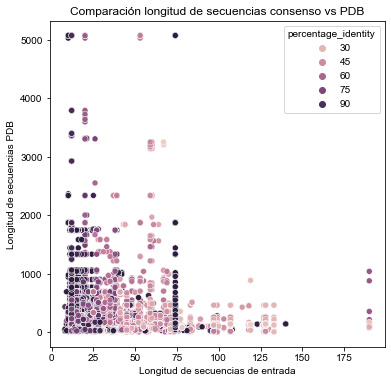

In [31]:
fig=plt.gcf()
fig.set_size_inches(6,6)
sns.scatterplot(data=df_10k, x="query_sequence_length", y="pdb_sequence_length", hue="percentage_identity")
plt.xlabel("Longitud de secuencias de entrada")
plt.ylabel("Longitud de secuencias PDB")
plt.title("Comparación longitud de secuencias consenso vs PDB")
sns.set_style("darkgrid")
plt.show()

In [35]:
sub_res_5_10k=df_10k[(df_10k["length_difference"]>=-5) & (df_10k["length_difference"]<=5)]

Text(0.5, 1.0, '')

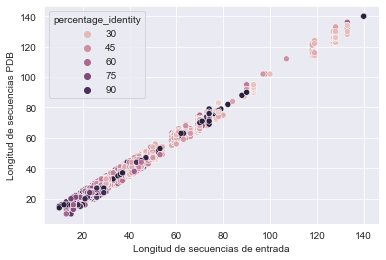

In [36]:
sns.scatterplot(data=sub_res_5_10k, x="query_sequence_length", y="pdb_sequence_length", hue="percentage_identity")
plt.xlabel("Longitud de secuencias de entrada")
plt.ylabel("Longitud de secuencias PDB")

plt.title("")

In [81]:
#%store sub_res_5

Stored 'sub_res_5' (DataFrame)


## Equal length

In [9]:
equal_length=res_df[res_df["query_sequence_length"]==res_df["pdb_sequence_length"]]

In [6]:
%store equal_length

Stored 'equal_length' (DataFrame)


In [61]:
equal_length.describe()

,query_sequence_length,pdb_sequence_length,e_value,percentage_identity
count,2351.000000,2351.000000,2.351000e+03,2351.000000
mean,32.333900,32.333900,2.369902e-03,77.979753
std,15.988731,15.988731,1.099104e-02,18.303080
min,20.000000,20.000000,1.300000e-69,32.400000
25%,23.000000,23.000000,2.200000e-13,62.500000
50%,25.000000,25.000000,1.000000e-09,82.600000
75%,38.000000,38.000000,2.300000e-06,95.200000
max,140.000000,140.000000,9.300000e-02,100.000000


In [37]:
equal_length

,query_sequences,query_sequence_length,pdb_sequence,pdb_sequence_length,pdb_id,e_value,percentage_identity,molecule_name
0,GLPRKILCAIAKKKGKCKGPLKLVCKC,27.0,GLPRKILCAIAKKKGKCKGPLKLVCKC,27.0,2mbd,1.100000e-13,100.0,[Lasiocepsin]
1,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,2lt8,5.700000e-22,100.0,[Fungal defensin eurocin]
11,FLPAIAGMAAKFLPKIFCAISKKC,24.0,FLPILASLAAKFGPKLFCLVTKKC,24.0,6g4i,6.700000e-07,62.5,[Brevinin-1BYa]
12,FLPAIAGMAAKFLPKIFCAISKKC,24.0,FLPILASLAAKFGPKLFCLVTKKC,24.0,6g4k,6.700000e-07,62.5,[Brevinin-1BYa]
13,FLPAIAGMAAKFLPKIFCAISKKC,24.0,FLPILASLAAKFGPKLFCLVTKKC,24.0,6g4u,6.700000e-07,62.5,[Brevinin-1BYa]
...,...,...,...,...,...,...,...,...
9957,RCICTTRTCRFPYRRLGTCLFQNRVYTFCC,30.0,DCYCRIPACIAGERRYGTCIYQGRLWAFCC,30.0,1dfn,3.600000e-05,44.8,[Neutrophil defensin 3]
9959,RCICTTRTCRFPYRRLGTCLFQNRVYTFCC,30.0,ACYCRIPACIAGERRAGTCIYQGRLWAFCC,30.0,3lo1,4.500000e-05,44.8,[Neutrophil defensin 1]
9960,RCICTTRTCRFPYRRLGTCLFQNRVYTFCC,30.0,ACYCRIPACIAGERRYGTCIYQGRLAAFCC,30.0,3lo9,9.200000e-05,44.8,[Neutrophil defensin 1]
9961,RCICTTRTCRFPYRRLGTCLFQNRVYTFCC,30.0,ACYCRIPACIAGERRYGTCIYQGRLAAFCC,30.0,3lo6,9.200000e-05,44.8,[Neutrophil defensin 1]


In [38]:
sec_raw=pd.Series.tolist(equal_length["query_sequences"])
sec=[]
[sec.append(x) for x in sec_raw if x not in sec]
len(sec)

702

## Results vs sequence length

In [37]:
num_results={}
for k,v in dict_10k.items():
    num_results[k]=len(v)

In [38]:
results_vs_len_df=pd.DataFrame(num_results.items())

In [39]:
results_vs_len_df.rename(columns={0:"sequence",1:"num_of_results"},inplace=True)

In [40]:
#Creamos una lista con las secuencias del DF para poder trabajarla en modlAMP 
sec_lng=pd.Series.tolist(results_vs_len_df["sequence"])
#Calcular la longitud de las secuencias
globaldesc=GlobalDescriptor(sec_lng)
globaldesc.length()
lng=globaldesc.descriptor
results_vs_len_df["sequence_length"]=lng

In [47]:
Counter(results_vs_len_df['num_of_results']>400)

Counter({False: 2065, True: 78})

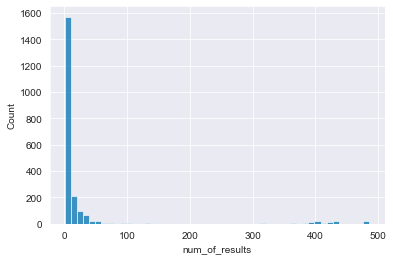

In [43]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette(palette="colorblind")
sns.histplot(data=results_vs_len_df, x="num_of_results", bins=50, cbar=True);

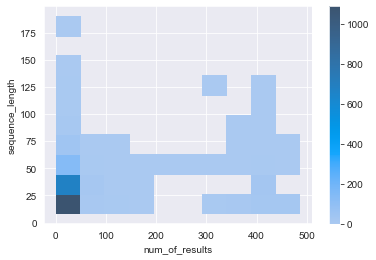

In [44]:
sns.histplot(data=results_vs_len_df, y="sequence_length", x="num_of_results", bins=10, cbar=True);